# Predicting Chronic Kidney Disease (Machine Learning)

## Exploratory Data Analysis

### Cleaning

In [1]:
# import neccesary libraries

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
#import math
#import warnings
#warnings.filterwarnings(action='ignore')
from pprint import pprint

from scipy.stats import shapiro

# import mice for numerical features
from impyute.imputation.cs import mice

# import OrdinalEncoder and SimpleImputer for use with categorical variables
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

# import style from matplotlib for visualization
import matplotlib.style as style

In [2]:
# read in the dataset
ckd = pd.read_csv('C:/Users/medma/Documents/MS/Capstone/data/Chronic Kidney Disease Dataset/kidney_disease.csv')

In [3]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sg              353 non-null    float64
 1   al              354 non-null    float64
 2   sc              383 non-null    float64
 3   hemo            348 non-null    float64
 4   pcv             330 non-null    object 
 5   wc              295 non-null    object 
 6   rc              270 non-null    object 
 7   htn             398 non-null    object 
 8   classification  400 non-null    object 
dtypes: float64(4), object(5)
memory usage: 28.2+ KB


In [4]:
#inspect the first five rows of data
ckd.head()

sg   al   sc  hemo pcv    wc   rc  htn classification
0  1.020  1.0  1.2  15.4  44  7800  5.2  yes            ckd
1  1.020  4.0  0.8  11.3  38  6000  NaN   no            ckd
2  1.010  2.0  1.8   9.6  31  7500  NaN   no            ckd
3  1.005  4.0  3.8  11.2  32  6700  3.9  yes            ckd
4  1.010  2.0  1.4  11.6  35  7300  4.6   no            ckd

In [5]:
# drop the ID column and all columns for features that will not be used
ckd = ckd[['sg','al','sc','hemo','pcv','wc','rc','htn','classification']]
ckd.head()

sg   al   sc  hemo pcv    wc   rc  htn classification
0  1.020  1.0  1.2  15.4  44  7800  5.2  yes            ckd
1  1.020  4.0  0.8  11.3  38  6000  NaN   no            ckd
2  1.010  2.0  1.8   9.6  31  7500  NaN   no            ckd
3  1.005  4.0  3.8  11.2  32  6700  3.9  yes            ckd
4  1.010  2.0  1.4  11.6  35  7300  4.6   no            ckd

In [6]:
# edit column names
cols_names={"sg":"specific_gravity",
          "al":"albumin",
          "sc":"serum_creatinine",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension"}

ckd.rename(columns=cols_names, inplace=True)
ckd.head()

specific_gravity  albumin  serum_creatinine  haemoglobin  \
0             1.020      1.0               1.2         15.4   
1             1.020      4.0               0.8         11.3   
2             1.010      2.0               1.8          9.6   
3             1.005      4.0               3.8         11.2   
4             1.010      2.0               1.4         11.6   

  packed_cell_volume white_blood_cell_count red_blood_cell_count hypertension  \
0                 44                   7800                  5.2          yes   
1                 38                   6000                  NaN           no   
2                 31                   7500                  NaN           no   
3                 32                   6700                  3.9          yes   
4                 35                   7300                  4.6           no   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4            ckd

In [7]:
for i in ckd.columns:
    print('unique values in "{}":\n'.format(i),ckd[i].unique())

unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "serum_creatinine":
 [ 1.2   0.8   1.8   3.8   1.4   1.1  24.    1.9   7.2   4.    2.7   2.1
  4.6   4.1   9.6   2.2   5.2   1.3   1.6   3.9  76.    7.7    nan  2.4
  7.3   1.5   2.5   2.    3.4   0.7   1.   10.8   6.3   5.9   0.9   3.
  3.25  9.7   6.4   3.2  32.    0.6   6.1   3.3   6.7   8.5   2.8  15.
  2.9   1.7   3.6   5.6   6.5   4.4  10.2  11.5   0.5  12.2   5.3   9.2
 13.8  16.9   6.    7.1  18.    2.3  13.   48.1  14.2  16.4   2.6   7.5
  4.3  18.1  11.8   9.3   6.8  13.5  12.8  11.9  12.   13.4  15.2  13.3
  0.4 ]
unique values in "haemoglobin":
 [15.4 11.3  9.6 11.2 11.6 12.2 12.4 10.8  9.5  9.4  9.7  9.8  5.6  7.6
 12.6 12.1 12.7 10.3  7.7 10.9  nan 11.1  9.9 12.5 12.9 10.1 12.  13.
  7.9  9.3 15.  10.   8.6 13.6 10.2 10.5  6.6 11.   7.5 15.6 15.2  4.8
  9.1  8.1 11.9 13.5  8.3  7.1 16.1 10.4  9.2  6.2 13.9 14.1  6.  11.8
 

In [8]:
pcv_count = ckd["packed_cell_volume"].value_counts().to_frame()
pcv_count

packed_cell_volume
41                    21
52                    21
44                    19
48                    19
40                    16
43                    14
42                    13
45                    13
32                    12
36                    12
33                    12
50                    12
28                    12
34                    11
37                    11
30                     9
29                     9
35                     9
46                     9
31                     8
24                     7
39                     7
26                     6
38                     5
53                     4
51                     4
49                     4
47                     4
54                     4
25                     3
27                     3
22                     3
19                     2
23                     2
15                     1
21                     1
17                     1
20                     1
\t43                   1
18                     1
9                      1
14                     1
\t?                    1
16                     1

In [9]:
wbcc_count = ckd["white_blood_cell_count"].value_counts().to_frame()
wbcc_count.tail(50)

white_blood_cell_count
8200                         2
12800                        2
15200                        2
12400                        2
8800                         2
5700                         2
9300                         2
9000                         2
6600                         2
5300                         2
8500                         2
11400                        2
13200                        2
7100                         2
3800                         2
14600                        2
4900                         1
12000                        1
15700                        1
4100                         1
11500                        1
13600                        1
12200                        1
18900                        1
9900                         1
5200                         1
5900                         1
12100                        1
9700                         1
5100                         1
10800                        1
16700                        1
26400                        1
2600                         1
11900                        1
12500                        1
16300                        1
11800                        1
\t8400                       1
\t6200                       1
10900                        1
11300                        1
2200                         1
21600                        1
11200                        1
19100                        1
\t?                          1
12300                        1
14900                        1
12700                        1

In [10]:
rbcc_count = ckd["red_blood_cell_count"].value_counts().to_frame()
rbcc_count.head(50)

red_blood_cell_count
5.2                    18
4.5                    16
4.9                    14
4.7                    11
5                      10
3.9                    10
4.8                    10
4.6                     9
3.4                     9
5.9                     8
3.7                     8
6.1                     8
5.5                     8
5.4                     7
5.3                     7
5.8                     7
3.8                     7
4.2                     6
4.3                     6
4                       6
5.6                     6
5.1                     5
6.2                     5
6.4                     5
5.7                     5
6.5                     5
4.1                     5
4.4                     5
3.2                     5
6                       4
3.6                     4
6.3                     4
3.3                     3
3                       3
3.5                     3
2.9                     2
2.6                     2
2.8                     2
3.1                     2
2.5                     2
2.7                     2
2.1                     2
\t?                     1
2.3                     1
2.4                     1
8                       1

In [11]:
c_count = ckd["classification"].value_counts().to_frame()
c_count.head()

classification
ckd                248
notckd             150
ckd\t                2

In [12]:
# clean up typos and change classification values
for i in range(ckd.shape[0]):
    if ckd.iloc[i,4]=='\t?':
        ckd.iloc[i,4]=np.nan
    if ckd.iloc[i,4]=='\t43':
        ckd.iloc[i,4]='43'
    if ckd.iloc[i,5]=='\t?':
        ckd.iloc[i,5]=np.nan
    if ckd.iloc[i,5]=='\t6200':
        ckd.iloc[i,5]= '6200'
    if ckd.iloc[i,5]=='\t8400':
        ckd.iloc[i,5]= '6200'
    if ckd.iloc[i,6]=='\t?':
        ckd.iloc[i,6]=np.nan
    if ckd.iloc[i,8]=='ckd':
        ckd.iloc[i,8]='yes'
    if ckd.iloc[i,8]=='notckd':
        ckd.iloc[i,8]='no'
    if ckd.iloc[i,8]=='ckd\t':
        ckd.iloc[i,8]='yes'

In [13]:
# check for unique values 
for i in ckd.columns:
    print(f'{i} : {ckd[i].nunique()} values')

specific_gravity : 5 values
albumin : 6 values
serum_creatinine : 84 values
haemoglobin : 115 values
packed_cell_volume : 42 values
white_blood_cell_count : 89 values
red_blood_cell_count : 45 values
hypertension : 2 values
classification : 2 values


In [14]:
# separate numerical from categorical features using a loop to isolate features with unique values greater than 7
numerical_features = []
categorical_features = []

for i in ckd.columns:
    if ckd[i].nunique()>6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [15]:
# take a look at numerical and categorical features
print('Numerical features: ', numerical_features)
print('\nCategorical features: ', categorical_features)

Numerical features:  ['serum_creatinine', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

Categorical features:  ['specific_gravity', 'albumin', 'hypertension', 'classification']


In [16]:
# check the number of null values in categorical features columns
ckd.loc[:,categorical_features].isnull().sum().sort_values(ascending=False)

specific_gravity    47
albumin             46
hypertension         2
classification       0
dtype: int64

In [17]:
# check the number of null values in numerical features columns
ckd.loc[:,numerical_features].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
packed_cell_volume         71
haemoglobin                52
serum_creatinine           17
dtype: int64

In [18]:
#encode categorical features with object type using OrdinalEncoder
to_encode = [feat for feat in categorical_features if ckd[feat].dtype=='object']
to_encode

['hypertension', 'classification']

In [19]:
ode = OrdinalEncoder(dtype = int)

In [20]:
# create an encode function
def encode(ckd):
    '''function to encode non-nan data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(ckd.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode data
    impute_ordinal = ode.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    ckd.loc[ckd.notnull()] = np.squeeze(impute_ordinal)
    return ckd

#create a for loop to iterate through each column in the data
for columns in to_encode:
    encode(ckd[columns])

C:\Users\medma\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\medma\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
# check the hypertension and classification columns for binary values
ckd.loc[:, categorical_features].head(20)

specific_gravity  albumin hypertension classification
0              1.020      1.0            1              1
1              1.020      4.0            0              1
2              1.010      2.0            0              1
3              1.005      4.0            1              1
4              1.010      2.0            0              1
5              1.015      3.0            1              1
6              1.010      0.0            0              1
7              1.015      2.0            0              1
8              1.015      3.0            1              1
9              1.020      2.0            1              1
10             1.010      2.0            1              1
11             1.010      3.0            1              1
12             1.015      3.0            1              1
13               NaN      NaN            1              1
14             1.010      3.0            1              1
15             1.015      3.0            1              1
16             1.015      2.0            0              1
17               NaN      NaN            1              1
18             1.025      0.0            1              1
19             1.015      1.0            1              1

In [22]:
ckd.dtypes

specific_gravity          float64
albumin                   float64
serum_creatinine          float64
haemoglobin               float64
packed_cell_volume         object
white_blood_cell_count     object
red_blood_cell_count       object
hypertension               object
classification             object
dtype: object

In [23]:
#convert categorical values
ckd.loc[:,categorical_features] = ckd.loc[:,categorical_features].astype('category')
# must use float values with MICE
ckd.loc[:,numerical_features] = ckd.loc[:,numerical_features].astype('float64')

In [24]:
ckd.dtypes

specific_gravity          category
albumin                   category
serum_creatinine           float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension              category
classification            category
dtype: object

### Imputation

In [25]:
ckd_copy1 = ckd.copy()

In [26]:
ckd_copy1.head()

specific_gravity albumin  serum_creatinine  haemoglobin  packed_cell_volume  \
0            1.020     1.0               1.2         15.4                44.0   
1            1.020     4.0               0.8         11.3                38.0   
2            1.010     2.0               1.8          9.6                31.0   
3            1.005     4.0               3.8         11.2                32.0   
4            1.010     2.0               1.4         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count hypertension classification  
0                  7800.0                   5.2            1              1  
1                  6000.0                   NaN            0              1  
2                  7500.0                   NaN            0              1  
3                  6700.0                   3.9            1              1  
4                  7300.0                   4.6            0              1

In [27]:
# separate numerical from categorical features for copy 1 using a loop to isolate features with unique values greater than 7
numerical_features = []
categorical_features = []

for i in ckd_copy1.columns:
    if ckd_copy1[i].nunique()>6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

#### Numerical Variables using MICE

In [28]:
ckd_copy1_numerical = ckd_copy1.loc[:,numerical_features]

# pass the numpy arrays to mice
ckd_copy1_numerical_imputed = mice(ckd_copy1_numerical.values, min=0.00)

In [29]:
# look at the sum of numerical NA values
ckd_copy1.loc[:,numerical_features].isna().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
packed_cell_volume         71
haemoglobin                52
serum_creatinine           17
dtype: int64

In [30]:
#convert the NA values into imputed values
ckd_copy1.loc[:,numerical_features] = ckd_copy1_numerical_imputed

In [31]:
# check to see if any NA values still exist
ckd_copy1.loc[:,numerical_features].isna().sum().sort_values(ascending=False)

serum_creatinine          0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [32]:
ckd_copy1.head(20)

specific_gravity albumin  serum_creatinine  haemoglobin  \
0             1.020     1.0               1.2         15.4   
1             1.020     4.0               0.8         11.3   
2             1.010     2.0               1.8          9.6   
3             1.005     4.0               3.8         11.2   
4             1.010     2.0               1.4         11.6   
5             1.015     3.0               1.1         12.2   
6             1.010     0.0              24.0         12.4   
7             1.015     2.0               1.1         12.4   
8             1.015     3.0               1.9         10.8   
9             1.020     2.0               7.2          9.5   
10            1.010     2.0               4.0          9.4   
11            1.010     3.0               2.7         10.8   
12            1.015     3.0               2.1          9.7   
13              NaN     NaN               4.6          9.8   
14            1.010     3.0               4.1          5.6   
15            1.015     3.0               9.6          7.6   
16            1.015     2.0               2.2         12.6   
17              NaN     NaN               5.2         12.1   
18            1.025     0.0               1.3         12.7   
19            1.015     1.0               1.6         10.3   

    packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0            44.000000             7800.000000              5.200000   
1            38.000000             6000.000000              4.361720   
2            31.000000             7500.000000              3.783314   
3            32.000000             6700.000000              3.900000   
4            35.000000             7300.000000              4.600000   
5            39.000000             7800.000000              4.400000   
6            36.000000             7450.290521              4.242333   
7            44.000000             6900.000000              5.000000   
8            33.000000             9600.000000              4.000000   
9            29.000000            12100.000000              3.700000   
10           28.000000             9159.326037              3.604443   
11           32.000000             4500.000000              3.800000   
12           28.000000            12200.000000              3.400000   
13           31.521092             8921.667022              3.816303   
14           16.000000            11000.000000              2.600000   
15           24.000000             3800.000000              2.800000   
16           38.677492             8489.742368              4.587584   
17           37.173363             8438.819519              4.416742   
18           37.000000            11400.000000              4.300000   
19           30.000000             5300.000000              3.700000   

   hypertension classification  
0             1              1  
1             0              1  
2             0              1  
3             1              1  
4             0              1  
5             1              1  
6             0              1  
7             0              1  
8             1              1  
9             1              1  
10            1              1  
11            1              1  
12            1              1  
13            1              1  
14            1              1  
15            1              1  
16            0              1  
17            1              1  
18            1              1  
19            1              1

#### Nominal Variables using KNN

In [33]:
ckd_copy1.loc[:,categorical_features].dtypes

specific_gravity    category
albumin             category
hypertension        category
classification      category
dtype: object

In [34]:
ckd_copy1.loc[:,categorical_features].isna().sum().sort_values(ascending=False)

specific_gravity    47
albumin             46
hypertension         2
classification       0
dtype: int64

In [35]:
knn_imputer = KNNImputer(n_neighbors=1)
ckd_copy1 = pd.DataFrame(knn_imputer.fit_transform(ckd_copy1), columns = ckd_copy1.columns)

In [36]:
ckd_copy1.loc[:,categorical_features].isna().sum().sort_values(ascending=False)

specific_gravity    0
albumin             0
hypertension        0
classification      0
dtype: int64

In [37]:
ckd_copy1.head(20)

specific_gravity  albumin  serum_creatinine  haemoglobin  \
0              1.020      1.0               1.2         15.4   
1              1.020      4.0               0.8         11.3   
2              1.010      2.0               1.8          9.6   
3              1.005      4.0               3.8         11.2   
4              1.010      2.0               1.4         11.6   
5              1.015      3.0               1.1         12.2   
6              1.010      0.0              24.0         12.4   
7              1.015      2.0               1.1         12.4   
8              1.015      3.0               1.9         10.8   
9              1.020      2.0               7.2          9.5   
10             1.010      2.0               4.0          9.4   
11             1.010      3.0               2.7         10.8   
12             1.015      3.0               2.1          9.7   
13             1.015      3.0               4.6          9.8   
14             1.010      3.0               4.1          5.6   
15             1.015      3.0               9.6          7.6   
16             1.015      2.0               2.2         12.6   
17             1.015      2.0               5.2         12.1   
18             1.025      0.0               1.3         12.7   
19             1.015      1.0               1.6         10.3   

    packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0            44.000000             7800.000000              5.200000   
1            38.000000             6000.000000              4.361720   
2            31.000000             7500.000000              3.783314   
3            32.000000             6700.000000              3.900000   
4            35.000000             7300.000000              4.600000   
5            39.000000             7800.000000              4.400000   
6            36.000000             7450.290521              4.242333   
7            44.000000             6900.000000              5.000000   
8            33.000000             9600.000000              4.000000   
9            29.000000            12100.000000              3.700000   
10           28.000000             9159.326037              3.604443   
11           32.000000             4500.000000              3.800000   
12           28.000000            12200.000000              3.400000   
13           31.521092             8921.667022              3.816303   
14           16.000000            11000.000000              2.600000   
15           24.000000             3800.000000              2.800000   
16           38.677492             8489.742368              4.587584   
17           37.173363             8438.819519              4.416742   
18           37.000000            11400.000000              4.300000   
19           30.000000             5300.000000              3.700000   

    hypertension  classification  
0            1.0             1.0  
1            0.0             1.0  
2            0.0             1.0  
3            1.0             1.0  
4            0.0             1.0  
5            1.0             1.0  
6            0.0             1.0  
7            0.0             1.0  
8            1.0             1.0  
9            1.0             1.0  
10           1.0             1.0  
11           1.0             1.0  
12           1.0             1.0  
13           1.0             1.0  
14           1.0             1.0  
15           1.0             1.0  
16           0.0             1.0  
17           1.0             1.0  
18           1.0             1.0  
19           1.0             1.0

In [38]:
#convert categorical values again
ckd_copy1[['specific_gravity','albumin','hypertension','classification']] = ckd_copy1[['specific_gravity','albumin','hypertension','classification']].astype('category')

### Descriptive Statistics

#### Measures of Central Tendency (Numerical)

In [39]:
print(ckd[["serum_creatinine", "haemoglobin", "packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count"]].mean())
print()
print(ckd_copy1[["serum_creatinine", "haemoglobin", "packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count"]].mean())

serum_creatinine             3.072454
haemoglobin                 12.526437
packed_cell_volume          38.884498
white_blood_cell_count    8398.639456
red_blood_cell_count         4.707435
dtype: float64

serum_creatinine             3.063611
haemoglobin                 12.529858
packed_cell_volume          38.438364
white_blood_cell_count    8459.132022
red_blood_cell_count         4.558588
dtype: float64


In [40]:
print(ckd[["serum_creatinine", "haemoglobin", "packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count"]].median())
print()
print(ckd_copy1[["serum_creatinine", "haemoglobin", "packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count"]].median())

serum_creatinine             1.30
haemoglobin                 12.65
packed_cell_volume          40.00
white_blood_cell_count    8000.00
red_blood_cell_count         4.80
dtype: float64

serum_creatinine             1.350000
haemoglobin                 12.624568
packed_cell_volume          38.769550
white_blood_cell_count    8497.150112
red_blood_cell_count         4.589373
dtype: float64


In [41]:
print(ckd[["serum_creatinine", "haemoglobin", "packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count"]].mode())
print()
print(ckd_copy1[["serum_creatinine", "haemoglobin", "packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count"]].mode())

   serum_creatinine  haemoglobin  packed_cell_volume  white_blood_cell_count  \
0               1.2         15.0                41.0                  9800.0   
1               NaN          NaN                52.0                     NaN   

   red_blood_cell_count  
0                   5.2  
1                   NaN  

   serum_creatinine  haemoglobin  packed_cell_volume  white_blood_cell_count  \
0               1.2         15.0                41.0                  9800.0   
1               NaN          NaN                52.0                     NaN   

   red_blood_cell_count  
0                   5.2  
1                   NaN  


<function matplotlib.pyplot.show(close=None, block=None)>

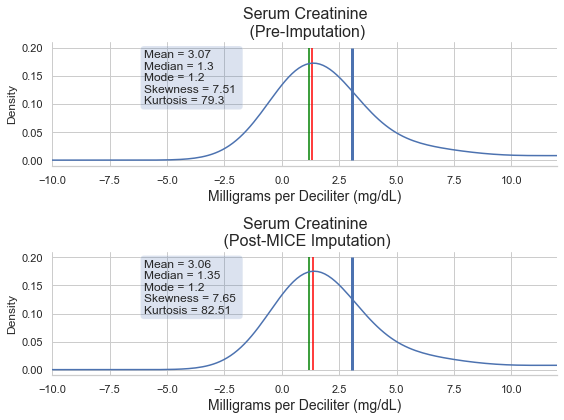

In [42]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title("Serum Creatinine\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["serum_creatinine"].plot(kind="density")
plt.vlines(ckd["serum_creatinine"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd["serum_creatinine"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["serum_creatinine"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-10, 12)
plt.xlabel("Milligrams per Deciliter (mg/dL)", fontsize=14);

plt.subplot(2,1,2)
plt.title("Serum Creatinine\n (Post-MICE Imputation)", fontsize=16)
g2 = ax2 = ckd_copy1['serum_creatinine'].plot(kind="density")
plt.vlines(ckd_copy1["serum_creatinine"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy1["serum_creatinine"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy1["serum_creatinine"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-10, 12)
plt.xlabel("Milligrams per Deciliter (mg/dL)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["serum_creatinine"].mean(), 2)
median = np.round(ckd["serum_creatinine"].median(), 2)
m = mode = np.round(ckd["serum_creatinine"].mode(), 2)
m2 = m.iloc[0]
skew = np.round(ckd["serum_creatinine"].skew(), 2)
kurt = np.round(ckd["serum_creatinine"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {m2} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-6, .10, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean2 = np.round(ckd_copy1["serum_creatinine"].mean(), 2)
median2 = np.round(ckd_copy1["serum_creatinine"].median(), 2)
m3 = mode = np.round(ckd_copy1["serum_creatinine"].mode(), 2)
m4 = m.iloc[0]
skew2 = np.round(ckd_copy1["serum_creatinine"].skew(), 2)
kurt2 = np.round(ckd_copy1["serum_creatinine"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {m4} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(-6, .10, textstr2, fontsize=12, bbox=props2)

plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

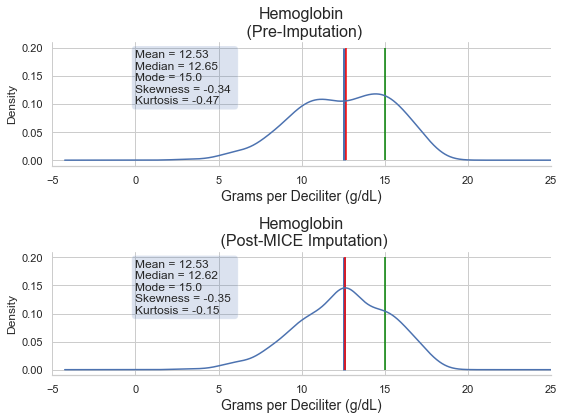

In [43]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title("Hemoglobin\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["haemoglobin"].plot(kind="density")
plt.vlines(ckd["haemoglobin"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd["haemoglobin"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["haemoglobin"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-5, 25)
plt.xlabel("Grams per Deciliter (g/dL)", fontsize=14);

plt.subplot(2,1,2)
plt.title("Hemoglobin\n (Post-MICE Imputation)", fontsize=16)
g2 = ax2 = ckd_copy1["haemoglobin"].plot(kind="density")
plt.vlines(ckd_copy1["haemoglobin"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy1["haemoglobin"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy1["haemoglobin"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-5, 25)
plt.xlabel("Grams per Deciliter (g/dL)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["haemoglobin"].mean(), 2)
median = np.round(ckd["haemoglobin"].median(), 2)
m = mode = np.round(ckd["haemoglobin"].mode(), 2)
m2 = m.iloc[0]
skew = np.round(ckd["haemoglobin"].skew(), 2)
kurt = np.round(ckd["haemoglobin"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {m2} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(0, .10, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean2 = np.round(ckd_copy1["haemoglobin"].mean(), 2)
median2 = np.round(ckd_copy1["haemoglobin"].median(), 2)
m3 = mode = np.round(ckd_copy1["haemoglobin"].mode(), 2)
m4 = m.iloc[0]
skew2 = np.round(ckd_copy1["haemoglobin"].skew(), 2)
kurt2 = np.round(ckd_copy1["haemoglobin"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {m4} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(0, .10, textstr2, fontsize=12, bbox=props2)

plt.tight_layout()
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

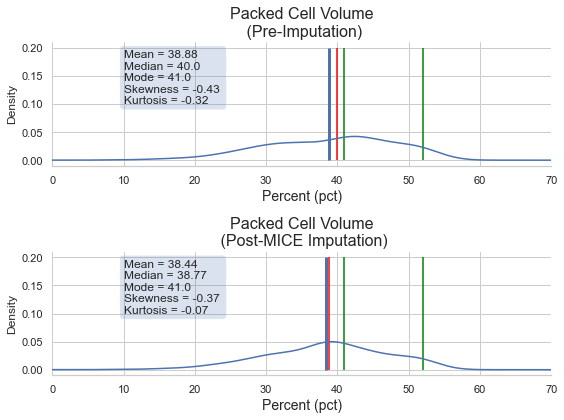

In [44]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title("Packed Cell Volume\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["packed_cell_volume"].plot(kind="density")
plt.vlines(ckd["packed_cell_volume"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd["packed_cell_volume"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["packed_cell_volume"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(0, 70)
plt.xlabel("Percent (pct)", fontsize=14);

plt.subplot(2,1,2)
plt.title("Packed Cell Volume\n (Post-MICE Imputation)", fontsize=16)
g2 = ax2 = ckd_copy1["packed_cell_volume"].plot(kind="density")
plt.vlines(ckd_copy1["packed_cell_volume"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy1["packed_cell_volume"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy1["packed_cell_volume"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(0, 70)
plt.xlabel("Percent (pct)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["packed_cell_volume"].mean(), 2)
median = np.round(ckd["packed_cell_volume"].median(), 2)
m = mode = np.round(ckd["packed_cell_volume"].mode(), 2)
m2 = m.iloc[0]
skew = np.round(ckd["packed_cell_volume"].skew(), 2)
kurt = np.round(ckd["packed_cell_volume"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {m2} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(10, .10, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean2 = np.round(ckd_copy1["packed_cell_volume"].mean(), 2)
median2 = np.round(ckd_copy1["packed_cell_volume"].median(), 2)
m3 = mode = np.round(ckd_copy1["packed_cell_volume"].mode(), 2)
m4 = m.iloc[0]
skew2 = np.round(ckd_copy1["packed_cell_volume"].skew(), 2)
kurt2 = np.round(ckd_copy1["packed_cell_volume"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {m4} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(10, .10, textstr2, fontsize=12, bbox=props2)

plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

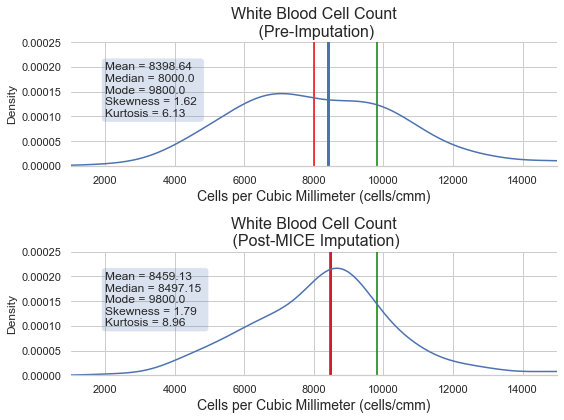

In [45]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title("White Blood Cell Count\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["white_blood_cell_count"].plot(kind="density")
plt.vlines(ckd["white_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd["white_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["white_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(1000, 15000)
plt.ylim(0,0.000250)
plt.xlabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14);

plt.subplot(2,1,2)
plt.title("White Blood Cell Count\n (Post-MICE Imputation)", fontsize=16)
g2 = ax2 = ckd_copy1["white_blood_cell_count"].plot(kind="density")
plt.vlines(ckd_copy1["white_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy1["white_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy1["white_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(1000, 15000)
plt.ylim(0,0.000250)
plt.xlabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["white_blood_cell_count"].mean(), 2)
median = np.round(ckd["white_blood_cell_count"].median(), 2)
m = mode = np.round(ckd["white_blood_cell_count"].mode(), 2)
m2 = m.iloc[0]
skew = np.round(ckd["white_blood_cell_count"].skew(), 2)
kurt = np.round(ckd["white_blood_cell_count"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {m2} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(2000, .00010, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean2 = np.round(ckd_copy1["white_blood_cell_count"].mean(), 2)
median2 = np.round(ckd_copy1["white_blood_cell_count"].median(), 2)
m3 = mode = np.round(ckd_copy1["white_blood_cell_count"].mode(), 2)
m4 = m.iloc[0]
skew2 = np.round(ckd_copy1["white_blood_cell_count"].skew(), 2)
kurt2 = np.round(ckd_copy1["white_blood_cell_count"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {m4} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(2000, .00010, textstr2, fontsize=12, bbox=props2)

plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

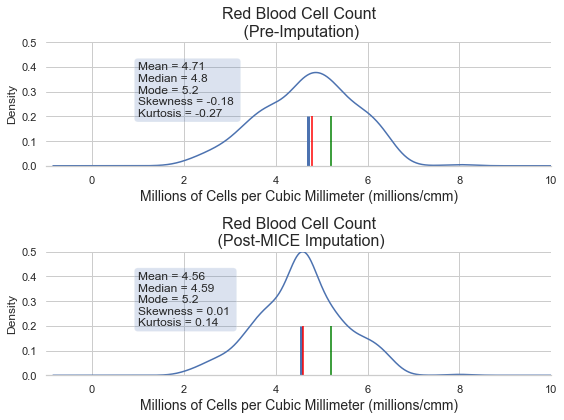

In [46]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title("Red Blood Cell Count\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["red_blood_cell_count"].plot(kind="density")
plt.vlines(ckd["red_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd["red_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["red_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-1, 10)
plt.ylim(0,0.5)
plt.xlabel("Millions of Cells per Cubic Millimeter (millions/cmm)", fontsize=14);

plt.subplot(2,1,2)
plt.title("Red Blood Cell Count\n (Post-MICE Imputation)", fontsize=16)
g2 = ax2 = ckd_copy1["red_blood_cell_count"].plot(kind="density")
plt.vlines(ckd_copy1["red_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy1["red_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy1["red_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-1, 10)
plt.ylim(0,0.5)
plt.xlabel("Millions of Cells per Cubic Millimeter (millions/cmm)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["red_blood_cell_count"].mean(), 2)
median = np.round(ckd["red_blood_cell_count"].median(), 2)
m = mode = np.round(ckd["red_blood_cell_count"].mode(), 2)
m2 = m.iloc[0]
skew = np.round(ckd["red_blood_cell_count"].skew(), 2)
kurt = np.round(ckd["red_blood_cell_count"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {m2} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(1, .2, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean2 = np.round(ckd_copy1["red_blood_cell_count"].mean(), 2)
median2 = np.round(ckd_copy1["red_blood_cell_count"].median(), 2)
m3 = mode = np.round(ckd_copy1["red_blood_cell_count"].mode(), 2)
m4 = m.iloc[0]
skew2 = np.round(ckd_copy1["red_blood_cell_count"].skew(), 2)
kurt2 = np.round(ckd_copy1["red_blood_cell_count"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {m4} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(1, .2, textstr2, fontsize=12, bbox=props2)

plt.tight_layout()
plt.show


In [47]:
ckd_copy2 = ckd.copy()

In [48]:
ckd_copy2.loc[:].isna().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
packed_cell_volume         71
haemoglobin                52
specific_gravity           47
albumin                    46
serum_creatinine           17
hypertension                2
classification              0
dtype: int64

In [49]:
knn_imputer = KNNImputer(n_neighbors=1)
ckd_copy2 = pd.DataFrame(knn_imputer.fit_transform(ckd_copy2), columns = ckd_copy2.columns)

In [50]:
ckd_copy2.loc[:].isna().sum().sort_values(ascending=False)

specific_gravity          0
albumin                   0
serum_creatinine          0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
hypertension              0
classification            0
dtype: int64

In [51]:
ckd_copy2.head(20)

specific_gravity  albumin  serum_creatinine  haemoglobin  \
0              1.020      1.0               1.2         15.4   
1              1.020      4.0               0.8         11.3   
2              1.010      2.0               1.8          9.6   
3              1.005      4.0               3.8         11.2   
4              1.010      2.0               1.4         11.6   
5              1.015      3.0               1.1         12.2   
6              1.010      0.0              24.0         12.4   
7              1.015      2.0               1.1         12.4   
8              1.015      3.0               1.9         10.8   
9              1.020      2.0               7.2          9.5   
10             1.010      2.0               4.0          9.4   
11             1.010      3.0               2.7         10.8   
12             1.015      3.0               2.1          9.7   
13             1.010      3.0               4.6          9.8   
14             1.010      3.0               4.1          5.6   
15             1.015      3.0               9.6          7.6   
16             1.015      2.0               2.2         12.6   
17             1.015      4.0               5.2         12.1   
18             1.025      0.0               1.3         12.7   
19             1.015      1.0               1.6         10.3   

    packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                 44.0                  7800.0                   5.2   
1                 38.0                  6000.0                   6.5   
2                 31.0                  7500.0                   3.4   
3                 32.0                  6700.0                   3.9   
4                 35.0                  7300.0                   4.6   
5                 39.0                  7800.0                   4.4   
6                 36.0                  9800.0                   5.5   
7                 44.0                  6900.0                   5.0   
8                 33.0                  9600.0                   4.0   
9                 29.0                 12100.0                   3.7   
10                28.0                  6900.0                   2.5   
11                32.0                  4500.0                   3.8   
12                28.0                 12200.0                   3.4   
13                32.0                  9000.0                   3.9   
14                16.0                 11000.0                   2.6   
15                24.0                  3800.0                   2.8   
16                38.0                  9600.0                   5.0   
17                37.0                  6200.0                   8.0   
18                37.0                 11400.0                   4.3   
19                30.0                  5300.0                   3.7   

    hypertension  classification  
0            1.0             1.0  
1            0.0             1.0  
2            0.0             1.0  
3            1.0             1.0  
4            0.0             1.0  
5            1.0             1.0  
6            0.0             1.0  
7            0.0             1.0  
8            1.0             1.0  
9            1.0             1.0  
10           1.0             1.0  
11           1.0             1.0  
12           1.0             1.0  
13           1.0             1.0  
14           1.0             1.0  
15           1.0             1.0  
16           0.0             1.0  
17           1.0             1.0  
18           1.0             1.0  
19           1.0             1.0

In [52]:
#convert categorical values again
ckd_copy2[['specific_gravity','albumin','hypertension','classification']] = ckd_copy2[['specific_gravity','albumin','hypertension','classification']].astype('category')

<function matplotlib.pyplot.show(close=None, block=None)>

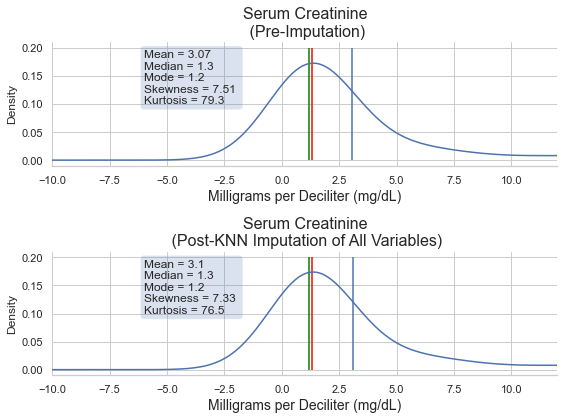

In [53]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title("Serum Creatinine\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["serum_creatinine"].plot(kind="density")
plt.vlines(ckd["serum_creatinine"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd["serum_creatinine"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["serum_creatinine"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-10, 12)
plt.xlabel("Milligrams per Deciliter (mg/dL)", fontsize=14);

plt.subplot(2,1,2)
plt.title("Serum Creatinine\n (Post-KNN Imputation of All Variables)", fontsize=16)
g2 = ax2 = ckd_copy2['serum_creatinine'].plot(kind="density")
plt.vlines(ckd_copy2["serum_creatinine"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy2["serum_creatinine"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy2["serum_creatinine"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-10, 12)
plt.xlabel("Milligrams per Deciliter (mg/dL)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["serum_creatinine"].mean(), 2)
median = np.round(ckd["serum_creatinine"].median(), 2)
m = mode = np.round(ckd["serum_creatinine"].mode(), 2)
m2 = m.iloc[0]
skew = np.round(ckd["serum_creatinine"].skew(), 2)
kurt = np.round(ckd["serum_creatinine"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {m2} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-6, .10, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean2 = np.round(ckd_copy2["serum_creatinine"].mean(), 2)
median2 = np.round(ckd_copy2["serum_creatinine"].median(), 2)
m3 = mode = np.round(ckd_copy2["serum_creatinine"].mode(), 2)
m4 = m.iloc[0]
skew2 = np.round(ckd_copy2["serum_creatinine"].skew(), 2)
kurt2 = np.round(ckd_copy2["serum_creatinine"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {m4} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(-6, .10, textstr2, fontsize=12, bbox=props2)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

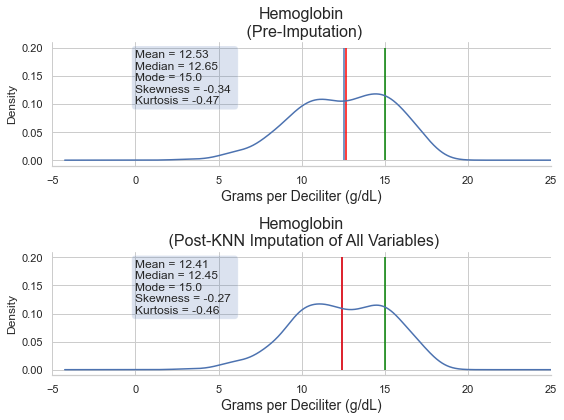

In [54]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title("Hemoglobin\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["haemoglobin"].plot(kind="density")
plt.vlines(ckd["haemoglobin"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd["haemoglobin"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["haemoglobin"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-5, 25)
plt.xlabel("Grams per Deciliter (g/dL)", fontsize=14);

plt.subplot(2,1,2)
plt.title("Hemoglobin\n (Post-KNN Imputation of All Variables)", fontsize=16)
g2 = ax2 = ckd_copy2["haemoglobin"].plot(kind="density")
plt.vlines(ckd_copy2["haemoglobin"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy2["haemoglobin"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy2["haemoglobin"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-5, 25)
plt.xlabel("Grams per Deciliter (g/dL)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["haemoglobin"].mean(), 2)
median = np.round(ckd["haemoglobin"].median(), 2)
m = mode = np.round(ckd["haemoglobin"].mode(), 2)
m2 = m.iloc[0]
skew = np.round(ckd["haemoglobin"].skew(), 2)
kurt = np.round(ckd["haemoglobin"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {m2} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(0, .10, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean2 = np.round(ckd_copy2["haemoglobin"].mean(), 2)
median2 = np.round(ckd_copy2["haemoglobin"].median(), 2)
m3 = mode = np.round(ckd_copy2["haemoglobin"].mode(), 2)
m4 = m.iloc[0]
skew2 = np.round(ckd_copy2["haemoglobin"].skew(), 2)
kurt2 = np.round(ckd_copy2["haemoglobin"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {m4} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(0, .10, textstr2, fontsize=12, bbox=props2)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

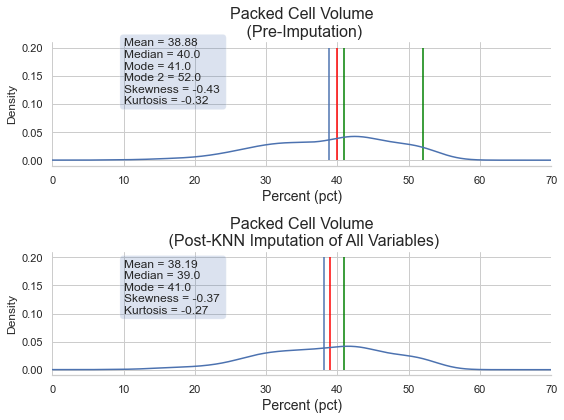

In [55]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title("Packed Cell Volume\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["packed_cell_volume"].plot(kind="density")
plt.vlines(ckd["packed_cell_volume"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd["packed_cell_volume"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["packed_cell_volume"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(0, 70)
plt.xlabel("Percent (pct)", fontsize=14);

plt.subplot(2,1,2)
plt.title("Packed Cell Volume\n (Post-KNN Imputation of All Variables)", fontsize=16)
g2 = ax2 = ckd_copy2["packed_cell_volume"].plot(kind="density")
plt.vlines(ckd_copy2["packed_cell_volume"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy2["packed_cell_volume"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy2["packed_cell_volume"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(0, 70)
plt.xlabel("Percent (pct)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["packed_cell_volume"].mean(), 2)
median = np.round(ckd["packed_cell_volume"].median(), 2)
m = mode = np.round(ckd["packed_cell_volume"].mode(), 2)
m1 = m.iloc[0]
m2 = m.iloc[1]
skew = np.round(ckd["packed_cell_volume"].skew(), 2)
kurt = np.round(ckd["packed_cell_volume"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {m1} \nMode 2 = {m2} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(10, .10, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean2 = np.round(ckd_copy2["packed_cell_volume"].mean(), 2)
median2 = np.round(ckd_copy2["packed_cell_volume"].median(), 2)
m3 = mode = np.round(ckd_copy2["packed_cell_volume"].mode(), 2)
m4 = m.iloc[0]
skew2 = np.round(ckd_copy2["packed_cell_volume"].skew(), 2)
kurt2 = np.round(ckd_copy2["packed_cell_volume"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {m4} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(10, .10, textstr2, fontsize=12, bbox=props2)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

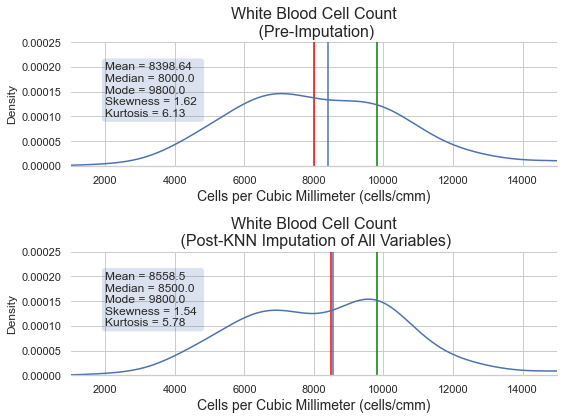

In [56]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title("White Blood Cell Count\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["white_blood_cell_count"].plot(kind="density")
plt.vlines(ckd["white_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd["white_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["white_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(1000, 15000)
plt.ylim(0,0.000250)
plt.xlabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14);

plt.subplot(2,1,2)
plt.title("White Blood Cell Count\n (Post-KNN Imputation of All Variables)", fontsize=16)
g2 = ax2 = ckd_copy2["white_blood_cell_count"].plot(kind="density")
plt.vlines(ckd_copy2["white_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy2["white_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy2["white_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(1000, 15000)
plt.ylim(0,0.000250)
plt.xlabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["white_blood_cell_count"].mean(), 2)
median = np.round(ckd["white_blood_cell_count"].median(), 2)
m = mode = np.round(ckd["white_blood_cell_count"].mode(), 2)
m2 = m.iloc[0]
skew = np.round(ckd["white_blood_cell_count"].skew(), 2)
kurt = np.round(ckd["white_blood_cell_count"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {m2} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(2000, .00010, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean2 = np.round(ckd_copy2["white_blood_cell_count"].mean(), 2)
median2 = np.round(ckd_copy2["white_blood_cell_count"].median(), 2)
m3 = mode = np.round(ckd_copy2["white_blood_cell_count"].mode(), 2)
m4 = m.iloc[0]
skew2 = np.round(ckd_copy2["white_blood_cell_count"].skew(), 2)
kurt2 = np.round(ckd_copy2["white_blood_cell_count"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {m4} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(2000, .00010, textstr2, fontsize=12, bbox=props2)

plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

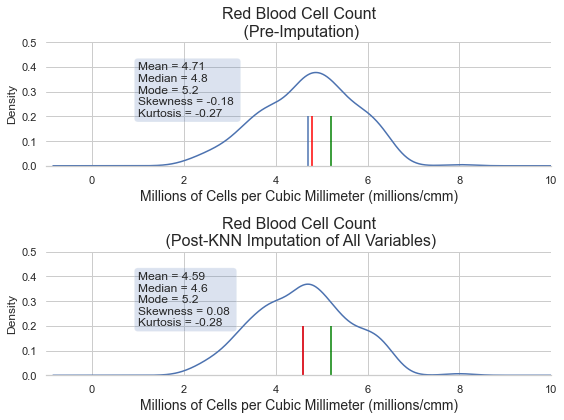

In [57]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title("Red Blood Cell Count\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["red_blood_cell_count"].plot(kind="density")
plt.vlines(ckd["red_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd["red_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["red_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-1, 10)
plt.ylim(0,0.5)
plt.xlabel("Millions of Cells per Cubic Millimeter (millions/cmm)", fontsize=14);

plt.subplot(2,1,2)
plt.title("Red Blood Cell Count\n (Post-KNN Imputation of All Variables)", fontsize=16)
g2 = ax2 = ckd_copy2["red_blood_cell_count"].plot(kind="density")
plt.vlines(ckd_copy2["red_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy2["red_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy2["red_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-1, 10)
plt.ylim(0,0.5)
plt.xlabel("Millions of Cells per Cubic Millimeter (millions/cmm)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["red_blood_cell_count"].mean(), 2)
median = np.round(ckd["red_blood_cell_count"].median(), 2)
m = mode = np.round(ckd["red_blood_cell_count"].mode(), 2)
m2 = m.iloc[0]
skew = np.round(ckd["red_blood_cell_count"].skew(), 2)
kurt = np.round(ckd["red_blood_cell_count"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {m2} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(1, .2, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean2 = np.round(ckd_copy2["red_blood_cell_count"].mean(), 2)
median2 = np.round(ckd_copy2["red_blood_cell_count"].median(), 2)
m3 = mode = np.round(ckd_copy2["red_blood_cell_count"].mode(), 2)
m4 = m.iloc[0]
skew2 = np.round(ckd_copy2["red_blood_cell_count"].skew(), 2)
kurt2 = np.round(ckd_copy2["red_blood_cell_count"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {m4} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(1, .2, textstr2, fontsize=12, bbox=props2)

plt.tight_layout()
plt.show


#### Measures of Dispersion (Numerical)

<function matplotlib.pyplot.show(close=None, block=None)>

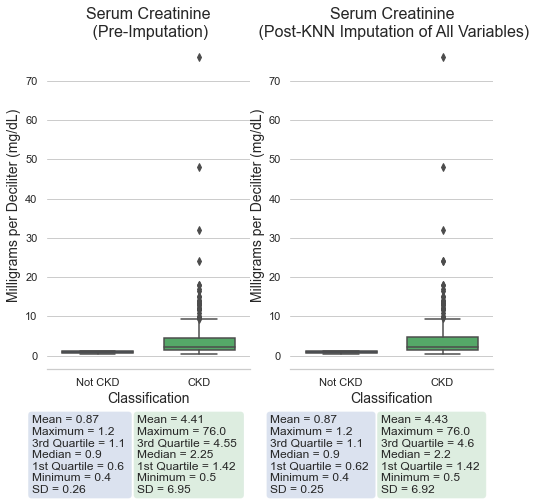

In [58]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno1 = ckd_copy2[ckd_copy2['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Pre-Imputation)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['serum_creatinine'].mean(), 2)
maximum1 = np.round(ckdno['serum_creatinine'].max(), 2)
u_quan1 = np.round(ckdno['serum_creatinine'].quantile(0.75), 2)
median1 = np.round(ckdno['serum_creatinine'].median(), 2)
l_quan1 = np.round(ckdno['serum_creatinine'].quantile(0.25), 2)
minimum1 = np.round(ckdno['serum_creatinine'].min(), 2)
std1 = np.round(ckdno['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.65, -35, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['serum_creatinine'].mean(), 2)
maximum2 = np.round(ckdyes['serum_creatinine'].max(), 2)
u_quan2 = np.round(ckdyes['serum_creatinine'].quantile(0.75), 2)
median2 = np.round(ckdyes['serum_creatinine'].median(), 2)
l_quan2 = np.round(ckdyes['serum_creatinine'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['serum_creatinine'].min(), 2)
std2 = np.round(ckdyes['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.39, -35, textstr, fontsize=12, bbox=props)


plt.subplot(1,2,2)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd_copy2, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Post-KNN Imputation of All Variables)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['serum_creatinine'].mean(), 2)
maximum3 = np.round(ckdno1['serum_creatinine'].max(), 2)
u_quan3 = np.round(ckdno1['serum_creatinine'].quantile(0.75), 2)
median3 = np.round(ckdno1['serum_creatinine'].median(), 2)
l_quan3 = np.round(ckdno1['serum_creatinine'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['serum_creatinine'].min(), 2)
std3 = np.round(ckdno1['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.70, -35, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['serum_creatinine'].mean(), 2)
maximum4 = np.round(ckdyes1['serum_creatinine'].max(), 2)
u_quan4 = np.round(ckdyes1['serum_creatinine'].quantile(0.75), 2)
median4 = np.round(ckdyes1['serum_creatinine'].median(), 2)
l_quan4 = np.round(ckdyes1['serum_creatinine'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['serum_creatinine'].min(), 2)
std4 = np.round(ckdyes1['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.39, -35, textstr, fontsize=12, bbox=props)


#plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

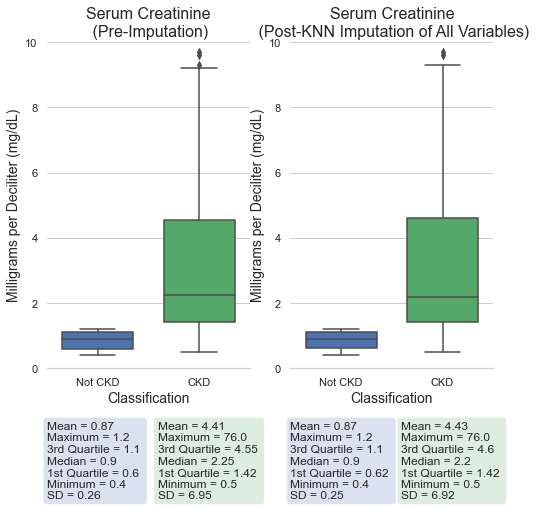

In [59]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno1 = ckd_copy2[ckd_copy2['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Pre-Imputation)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)
plt.ylim(0,10)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['serum_creatinine'].mean(), 2)
maximum1 = np.round(ckdno['serum_creatinine'].max(), 2)
u_quan1 = np.round(ckdno['serum_creatinine'].quantile(0.75), 2)
median1 = np.round(ckdno['serum_creatinine'].median(), 2)
l_quan1 = np.round(ckdno['serum_creatinine'].quantile(0.25), 2)
minimum1 = np.round(ckdno['serum_creatinine'].min(), 2)
std1 = np.round(ckdno['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.50, -4, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['serum_creatinine'].mean(), 2)
maximum2 = np.round(ckdyes['serum_creatinine'].max(), 2)
u_quan2 = np.round(ckdyes['serum_creatinine'].quantile(0.75), 2)
median2 = np.round(ckdyes['serum_creatinine'].median(), 2)
l_quan2 = np.round(ckdyes['serum_creatinine'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['serum_creatinine'].min(), 2)
std2 = np.round(ckdyes['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.59, -4, textstr, fontsize=12, bbox=props)


plt.subplot(1,2,2)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd_copy2, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Post-KNN Imputation of All Variables)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)
plt.ylim(0,10)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['serum_creatinine'].mean(), 2)
maximum3 = np.round(ckdno1['serum_creatinine'].max(), 2)
u_quan3 = np.round(ckdno1['serum_creatinine'].quantile(0.75), 2)
median3 = np.round(ckdno1['serum_creatinine'].median(), 2)
l_quan3 = np.round(ckdno1['serum_creatinine'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['serum_creatinine'].min(), 2)
std3 = np.round(ckdno1['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.50, -4, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['serum_creatinine'].mean(), 2)
maximum4 = np.round(ckdyes1['serum_creatinine'].max(), 2)
u_quan4 = np.round(ckdyes1['serum_creatinine'].quantile(0.75), 2)
median4 = np.round(ckdyes1['serum_creatinine'].median(), 2)
l_quan4 = np.round(ckdyes1['serum_creatinine'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['serum_creatinine'].min(), 2)
std4 = np.round(ckdyes1['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.59, -4, textstr, fontsize=12, bbox=props)


#plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

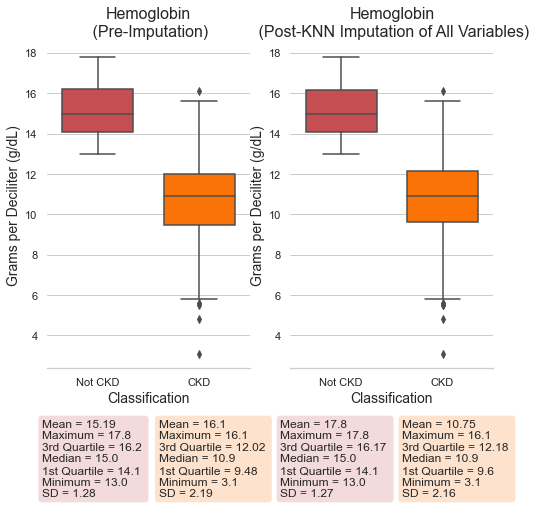

In [60]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno1 = ckd_copy2[ckd_copy2['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
g = sns.boxplot(x='classification', y='haemoglobin', data=ckd, width=0.7)

#title and labels
plt.title("Hemoglobin\n (Pre-Imputation)", fontsize=16)
plt.ylabel("Grams per Deciliter (g/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['r','xkcd:orange']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['haemoglobin'].mean(), 2)
maximum1 = np.round(ckdno['haemoglobin'].max(), 2)
u_quan1 = np.round(ckdno['haemoglobin'].quantile(0.75), 2)
median1 = np.round(ckdno['haemoglobin'].median(), 2)
l_quan1 = np.round(ckdno['haemoglobin'].quantile(0.25), 2)
minimum1 = np.round(ckdno['haemoglobin'].min(), 2)
std1 = np.round(ckdno['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='r', alpha=0.2)
g.text(-0.55, -4, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['haemoglobin'].max(), 2)
maximum2 = np.round(ckdyes['haemoglobin'].max(), 2)
u_quan2 = np.round(ckdyes['haemoglobin'].quantile(0.75), 2)
median2 = np.round(ckdyes['haemoglobin'].median(), 2)
l_quan2 = np.round(ckdyes['haemoglobin'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['haemoglobin'].min(), 2)
std2 = np.round(ckdyes['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='xkcd:orange', alpha=0.2)
g.text(.60, -4, textstr, fontsize=12, bbox=props)


plt.subplot(1,2,2)
g = sns.boxplot(x='classification', y='haemoglobin', data=ckd_copy2, width=0.7)

#title and labels
plt.title("Hemoglobin\n (Post-KNN Imputation of All Variables)", fontsize=16)
plt.ylabel("Grams per Deciliter (g/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['r','xkcd:orange']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['haemoglobin'].max(), 2)
maximum3 = np.round(ckdno1['haemoglobin'].max(), 2)
u_quan3 = np.round(ckdno1['haemoglobin'].quantile(0.75), 2)
median3 = np.round(ckdno1['haemoglobin'].median(), 2)
l_quan3 = np.round(ckdno1['haemoglobin'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['haemoglobin'].min(), 2)
std3 = np.round(ckdno1['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='r', alpha=0.2)
g.text(-0.60, -4, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['haemoglobin'].mean(), 2)
maximum4 = np.round(ckdyes1['haemoglobin'].max(), 2)
u_quan4 = np.round(ckdyes1['haemoglobin'].quantile(0.75), 2)
median4 = np.round(ckdyes1['haemoglobin'].median(), 2)
l_quan4 = np.round(ckdyes1['haemoglobin'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['haemoglobin'].min(), 2)
std4 = np.round(ckdyes1['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='xkcd:orange', alpha=0.2)
g.text(.60, -4, textstr, fontsize=12, bbox=props)


#plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

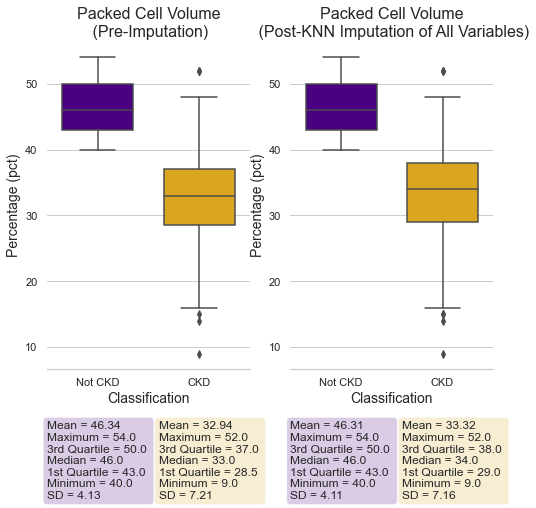

In [61]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno1 = ckd_copy2[ckd_copy2['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
g = sns.boxplot(x='classification', y='packed_cell_volume', data=ckd, width=0.7)

#title and labels
plt.title("Packed Cell Volume\n (Pre-Imputation)", fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['indigo','goldenrod']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['packed_cell_volume'].mean(), 2)
maximum1 = np.round(ckdno['packed_cell_volume'].max(), 2)
u_quan1 = np.round(ckdno['packed_cell_volume'].quantile(0.75), 2)
median1 = np.round(ckdno['packed_cell_volume'].median(), 2)
l_quan1 = np.round(ckdno['packed_cell_volume'].quantile(0.25), 2)
minimum1 = np.round(ckdno['packed_cell_volume'].min(), 2)
std1 = np.round(ckdno['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='indigo', alpha=0.2)
g.text(-0.50, -13, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['packed_cell_volume'].mean(), 2)
maximum2 = np.round(ckdyes['packed_cell_volume'].max(), 2)
u_quan2 = np.round(ckdyes['packed_cell_volume'].quantile(0.75), 2)
median2 = np.round(ckdyes['packed_cell_volume'].median(), 2)
l_quan2 = np.round(ckdyes['packed_cell_volume'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['packed_cell_volume'].min(), 2)
std2 = np.round(ckdyes['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='goldenrod', alpha=0.2)
g.text(.60, -13, textstr, fontsize=12, bbox=props)


plt.subplot(1,2,2)
g = sns.boxplot(x='classification', y='packed_cell_volume', data=ckd_copy2, width=0.7)

#title and labels
plt.title("Packed Cell Volume\n (Post-KNN Imputation of All Variables)", fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['indigo','goldenrod']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['packed_cell_volume'].mean(), 2)
maximum3 = np.round(ckdno1['packed_cell_volume'].max(), 2)
u_quan3 = np.round(ckdno1['packed_cell_volume'].quantile(0.75), 2)
median3 = np.round(ckdno1['packed_cell_volume'].median(), 2)
l_quan3 = np.round(ckdno1['packed_cell_volume'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['packed_cell_volume'].min(), 2)
std3 = np.round(ckdno1['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='indigo', alpha=0.2)
g.text(-0.50, -13, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['packed_cell_volume'].mean(), 2)
maximum4 = np.round(ckdyes1['packed_cell_volume'].max(), 2)
u_quan4 = np.round(ckdyes1['packed_cell_volume'].quantile(0.75), 2)
median4 = np.round(ckdyes1['packed_cell_volume'].median(), 2)
l_quan4 = np.round(ckdyes1['packed_cell_volume'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['packed_cell_volume'].min(), 2)
std4 = np.round(ckdyes1['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='goldenrod', alpha=0.2)
g.text(.60, -13, textstr, fontsize=12, bbox=props)


#plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

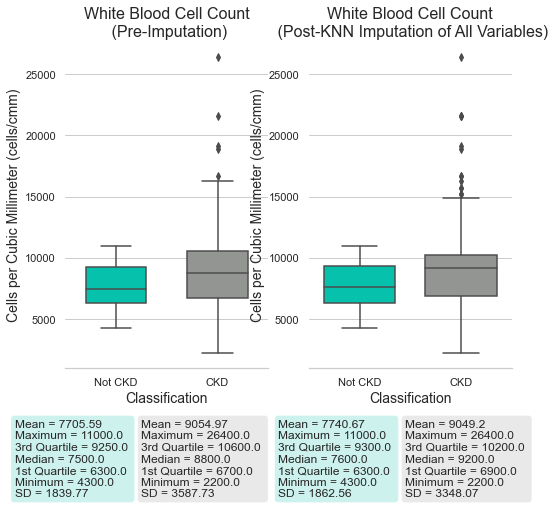

In [62]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno1 = ckd_copy2[ckd_copy2['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
g = sns.boxplot(x='classification', y='white_blood_cell_count', data=ckd, width=0.6)

#title and labels
plt.title("White Blood Cell Count\n (Pre-Imputation)", fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:turquoise','xkcd:grey']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['white_blood_cell_count'].mean(), 2)
maximum1 = np.round(ckdno['white_blood_cell_count'].max(), 2)
u_quan1 = np.round(ckdno['white_blood_cell_count'].quantile(0.75), 2)
median1 = np.round(ckdno['white_blood_cell_count'].median(), 2)
l_quan1 = np.round(ckdno['white_blood_cell_count'].quantile(0.25), 2)
minimum1 = np.round(ckdno['white_blood_cell_count'].min(), 2)
std1 = np.round(ckdno['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='xkcd:turquoise', alpha=0.2)
g.text(-1, -9500, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['white_blood_cell_count'].mean(), 2)
maximum2 = np.round(ckdyes['white_blood_cell_count'].max(), 2)
u_quan2 = np.round(ckdyes['white_blood_cell_count'].quantile(0.75), 2)
median2 = np.round(ckdyes['white_blood_cell_count'].median(), 2)
l_quan2 = np.round(ckdyes['white_blood_cell_count'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['white_blood_cell_count'].min(), 2)
std2 = np.round(ckdyes['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='xkcd:grey', alpha=0.2)
g.text(.25, -9500, textstr, fontsize=12, bbox=props)


plt.subplot(1,2,2)
g = sns.boxplot(x='classification', y='white_blood_cell_count', data=ckd_copy2, width=0.7)

#title and labels
plt.title("White Blood Cell Count\n (Post-KNN Imputation of All Variables)", fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:turquoise','xkcd:grey']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['white_blood_cell_count'].mean(), 2)
maximum3 = np.round(ckdno1['white_blood_cell_count'].max(), 2)
u_quan3 = np.round(ckdno1['white_blood_cell_count'].quantile(0.75), 2)
median3 = np.round(ckdno1['white_blood_cell_count'].median(), 2)
l_quan3 = np.round(ckdno1['white_blood_cell_count'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['white_blood_cell_count'].min(), 2)
std3 = np.round(ckdno1['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='xkcd:turquoise', alpha=0.2)
g.text(-.8, -9500, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['white_blood_cell_count'].mean(), 2)
maximum4 = np.round(ckdyes1['white_blood_cell_count'].max(), 2)
u_quan4 = np.round(ckdyes1['white_blood_cell_count'].quantile(0.75), 2)
median4 = np.round(ckdyes1['white_blood_cell_count'].median(), 2)
l_quan4 = np.round(ckdyes1['white_blood_cell_count'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['white_blood_cell_count'].min(), 2)
std4 = np.round(ckdyes1['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='xkcd:grey', alpha=0.2)
g.text(.45, -9500, textstr, fontsize=12, bbox=props)


#plt.tight_layout(pad=1.0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

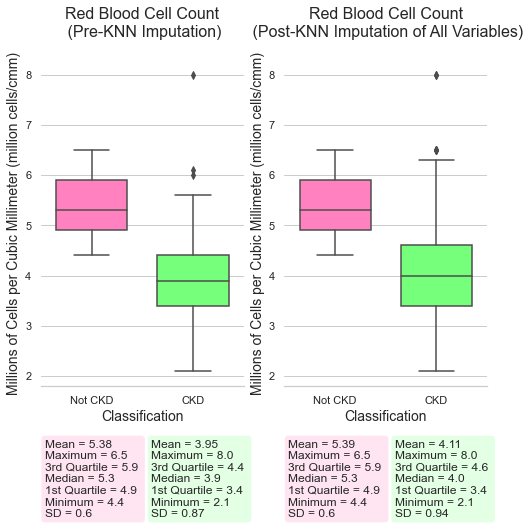

In [63]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno1 = ckd_copy2[ckd_copy2['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
g = sns.boxplot(x='classification', y='red_blood_cell_count', data=ckd, width=0.7)

#title and labels
plt.title("Red Blood Cell Count\n (Pre-KNN Imputation)\n", fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:pink','xkcd:lightgreen']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['red_blood_cell_count'].mean(), 2)
maximum1 = np.round(ckdno['red_blood_cell_count'].max(), 2)
u_quan1 = np.round(ckdno['red_blood_cell_count'].quantile(0.75), 2)
median1 = np.round(ckdno['red_blood_cell_count'].median(), 2)
l_quan1 = np.round(ckdno['red_blood_cell_count'].quantile(0.25), 2)
minimum1 = np.round(ckdno['red_blood_cell_count'].min(), 2)
std1 = np.round(ckdno['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='xkcd:pink', alpha=0.2)
g.text(-0.46, -.8, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['red_blood_cell_count'].mean(), 2)
maximum2 = np.round(ckdyes['red_blood_cell_count'].max(), 2)
u_quan2 = np.round(ckdyes['red_blood_cell_count'].quantile(0.75), 2)
median2 = np.round(ckdyes['red_blood_cell_count'].median(), 2)
l_quan2 = np.round(ckdyes['red_blood_cell_count'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['red_blood_cell_count'].min(), 2)
std2 = np.round(ckdyes['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='xkcd:lightgreen', alpha=0.2)
g.text(.59, -.8, textstr, fontsize=12, bbox=props)


plt.subplot(1,2,2)
g = sns.boxplot(x='classification', y='red_blood_cell_count', data=ckd_copy2, width=0.7)

#title and labels
plt.title("Red Blood Cell Count\n (Post-KNN Imputation of All Variables)\n", fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:pink','xkcd:lightgreen']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['red_blood_cell_count'].mean(), 2)
maximum3 = np.round(ckdno1['red_blood_cell_count'].max(), 2)
u_quan3 = np.round(ckdno1['red_blood_cell_count'].quantile(0.75), 2)
median3 = np.round(ckdno1['red_blood_cell_count'].median(), 2)
l_quan3 = np.round(ckdno1['red_blood_cell_count'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['red_blood_cell_count'].min(), 2)
std3 = np.round(ckdno1['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='xkcd:pink', alpha=0.2)
g.text(-0.46, -.8, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['red_blood_cell_count'].mean(), 2)
maximum4 = np.round(ckdyes1['red_blood_cell_count'].max(), 2)
u_quan4 = np.round(ckdyes1['red_blood_cell_count'].quantile(0.75), 2)
median4 = np.round(ckdyes1['red_blood_cell_count'].median(), 2)
l_quan4 = np.round(ckdyes1['red_blood_cell_count'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['red_blood_cell_count'].min(), 2)
std4 = np.round(ckdyes1['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='xkcd:lightgreen', alpha=0.2)
g.text(.59, -.8, textstr, fontsize=12, bbox=props)


#plt.tight_layout()
plt.show

#### Measures of Dispersion (Categorical)

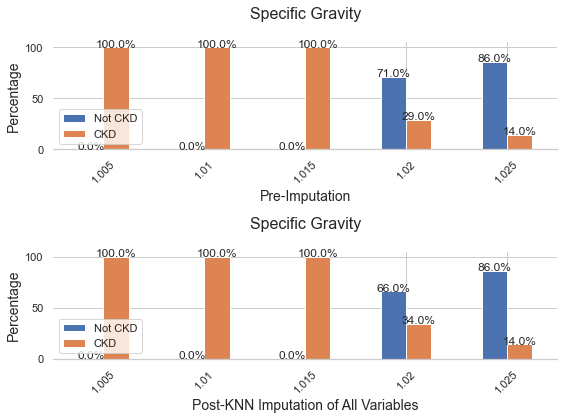

In [64]:
df_plot = ckd.groupby(['classification', 'specific_gravity']).size().reset_index().pivot(columns='classification', index='specific_gravity', values=0)
df_plot2 = ckd_copy2.groupby(['classification', 'specific_gravity']).size().reset_index().pivot(columns='classification', index='specific_gravity', values=0)

df_plot_p = np.round(df_plot.div(df_plot.sum(axis=1), axis=0)*100)
df_plot2_p = np.round(df_plot2.div(df_plot2.sum(axis=1), axis=0)*100)

classification = ['Not CKD', 'CKD']

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

ax = plt.subplot(2,1,1)
df_plot_p.plot(kind='bar', stacked=False, ax=ax)
plt.title("Specific Gravity\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Pre-Imputation", fontsize=14)
plt.xticks(rotation = 45)

for p in ax.patches:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')

ax2 = plt.subplot(2,1,2)
df_plot2_p.plot(kind='bar', stacked=False, ax=ax2)
plt.title("Specific Gravity\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-KNN Imputation of All Variables", fontsize=14)
plt.xticks(rotation = 45)

for p in ax2.patches:
   height = p.get_height()
   ax2.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()



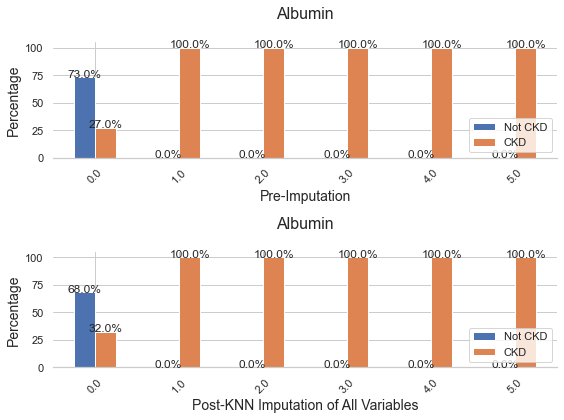

In [65]:
df_plot = ckd.groupby(['classification', 'albumin']).size().reset_index().pivot(columns='classification', index='albumin', values=0)
df_plot2 = ckd_copy2.groupby(['classification', 'albumin']).size().reset_index().pivot(columns='classification', index='albumin', values=0)

df_plot_p = np.round(df_plot.div(df_plot.sum(axis=1), axis=0)*100)
df_plot2_p = np.round(df_plot2.div(df_plot2.sum(axis=1), axis=0)*100)

classification = ['Not CKD', 'CKD']

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

ax = plt.subplot(2,1,1)
df_plot_p.plot(kind='bar', stacked=False, ax=ax)
plt.title("Albumin\n", fontsize=16)
plt.legend(classification,loc=4)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Pre-Imputation", fontsize=14)
plt.xticks(rotation = 45)


for p in ax.patches:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
ax2 = plt.subplot(2,1,2)
df_plot2_p.plot(kind='bar', stacked=False, ax=ax2)
plt.title("Albumin\n", fontsize=16)
plt.legend(classification,loc=4)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-KNN Imputation of All Variables", fontsize=14)
plt.xticks(rotation = 45)

for p in ax2.patches:
   height = p.get_height()
   ax2.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()




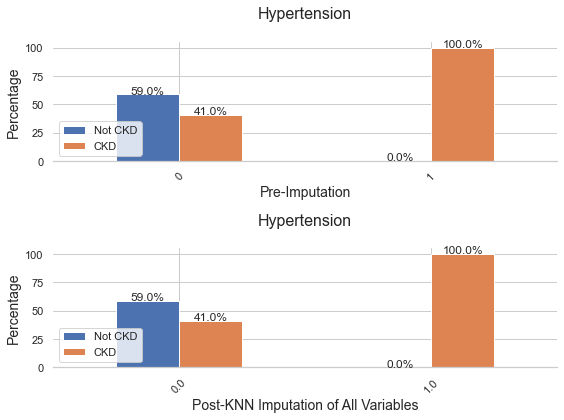

In [66]:
df_plot = ckd.groupby(['classification', 'hypertension']).size().reset_index().pivot(columns='classification', index='hypertension', values=0)
df_plot2 = ckd_copy2.groupby(['classification', 'hypertension']).size().reset_index().pivot(columns='classification', index='hypertension', values=0)

df_plot_p = np.round(df_plot.div(df_plot.sum(axis=1), axis=0)*100)
df_plot2_p = np.round(df_plot2.div(df_plot2.sum(axis=1), axis=0)*100)

classification = ['Not CKD', 'CKD']

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,6))

ax = plt.subplot(2,1,1)
df_plot_p.plot(kind='bar', stacked=False, ax=ax)
plt.title("Hypertension\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Pre-Imputation", fontsize=14)
plt.xticks(rotation = 45)

for p in ax.patches:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')

ax2 = plt.subplot(2,1,2)
df_plot2_p.plot(kind='bar', stacked=False, ax=ax2)
plt.title("Hypertension\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-KNN Imputation of All Variables", fontsize=14)
plt.xticks(rotation = 45)


for p in ax2.patches:
   height = p.get_height()
   ax2.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()




In [67]:
ckd_copy3 = ckd.copy()
ckd_copy3 = ckd_copy3.dropna()
ckd_copy3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   specific_gravity        238 non-null    category
 1   albumin                 238 non-null    category
 2   serum_creatinine        238 non-null    float64 
 3   haemoglobin             238 non-null    float64 
 4   packed_cell_volume      238 non-null    float64 
 5   white_blood_cell_count  238 non-null    float64 
 6   red_blood_cell_count    238 non-null    float64 
 7   hypertension            238 non-null    category
 8   classification          238 non-null    category
dtypes: category(4), float64(5)
memory usage: 12.8 KB


In [68]:
ckd_copy3.head()

specific_gravity albumin  serum_creatinine  haemoglobin  packed_cell_volume  \
0            1.020     1.0               1.2         15.4                44.0   
3            1.005     4.0               3.8         11.2                32.0   
4            1.010     2.0               1.4         11.6                35.0   
5            1.015     3.0               1.1         12.2                39.0   
7            1.015     2.0               1.1         12.4                44.0   

   white_blood_cell_count  red_blood_cell_count hypertension classification  
0                  7800.0                   5.2            1              1  
3                  6700.0                   3.9            1              1  
4                  7300.0                   4.6            0              1  
5                  7800.0                   4.4            1              1  
7                  6900.0                   5.0            0              1

In [69]:
ckd_copy3['serum_creatinine'].mode()

0    1.2
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

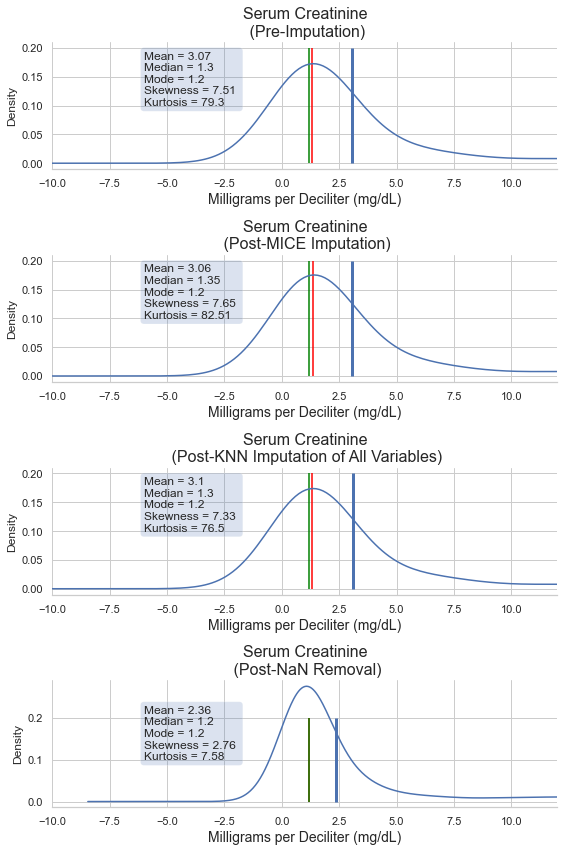

In [70]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,12))

plt.subplot(4,1,1)
plt.title("Serum Creatinine\n (Pre-Imputation)", fontsize=16)
g = ax = ckd["serum_creatinine"].plot(kind="density")
plt.vlines(ckd["serum_creatinine"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd["serum_creatinine"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["serum_creatinine"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-10, 12)
plt.xlabel("Milligrams per Deciliter (mg/dL)", fontsize=14);


plt.subplot(4,1,2)
plt.title("Serum Creatinine\n (Post-MICE Imputation)", fontsize=16)
g1 = ax1 = ckd_copy1['serum_creatinine'].plot(kind="density")
plt.vlines(ckd_copy1["serum_creatinine"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy1["serum_creatinine"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy1["serum_creatinine"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-10, 12)
plt.xlabel("Milligrams per Deciliter (mg/dL)", fontsize=14);


plt.subplot(4,1,3)
plt.title("Serum Creatinine\n (Post-KNN Imputation of All Variables)", fontsize=16)
g2 = ax2 = ckd_copy2['serum_creatinine'].plot(kind="density")
plt.vlines(ckd_copy2["serum_creatinine"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy2["serum_creatinine"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy2["serum_creatinine"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-10, 12)
plt.xlabel("Milligrams per Deciliter (mg/dL)", fontsize=14);



plt.subplot(4,1,4)
plt.title("Serum Creatinine\n (Post-NaN Removal)", fontsize=16)
g3 = ax3 = ckd_copy3['serum_creatinine'].plot(kind="density")
plt.vlines(ckd_copy3["serum_creatinine"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy3["serum_creatinine"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy3["serum_creatinine"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-10, 12)
plt.xlabel("Milligrams per Deciliter (mg/dL)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["serum_creatinine"].mean(), 2)
median = np.round(ckd["serum_creatinine"].median(), 2)
m = mode = np.round(ckd["serum_creatinine"].mode(), 2)
mm = m.iloc[0]
skew = np.round(ckd["serum_creatinine"].skew(), 2)
kurt = np.round(ckd["serum_creatinine"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {mm} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-6, .10, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean1 = np.round(ckd_copy1["serum_creatinine"].mean(), 2)
median1 = np.round(ckd_copy1["serum_creatinine"].median(), 2)
m1 = mode = np.round(ckd_copy1["serum_creatinine"].mode(), 2)
mm1 = m1.iloc[0]
skew1 = np.round(ckd_copy1["serum_creatinine"].skew(), 2)
kurt1 = np.round(ckd_copy1["serum_creatinine"].kurt(), 2)

textstr1 = "Mean" + f" = {mean1} \nMedian = {median1} \nMode = {mm1} \nSkewness = {skew1} \nKurtosis = {kurt1}"
props1 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g1.text(-6, .10, textstr1, fontsize=12, bbox=props1)

#ckd_copy2
mean2 = np.round(ckd_copy2["serum_creatinine"].mean(), 2)
median2 = np.round(ckd_copy2["serum_creatinine"].median(), 2)
m2 = mode = np.round(ckd_copy2["serum_creatinine"].mode(), 2)
mm2 = m2.iloc[0]
skew2 = np.round(ckd_copy2["serum_creatinine"].skew(), 2)
kurt2 = np.round(ckd_copy2["serum_creatinine"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {mm2} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(-6, .10, textstr2, fontsize=12, bbox=props2)

#ckd_copy3
mean3 = np.round(ckd_copy3["serum_creatinine"].mean(), 2)
median3 = np.round(ckd_copy3["serum_creatinine"].median(), 2)
m3 = mode = np.round(ckd_copy3["serum_creatinine"].mode(), 2)
mm3 = m3.iloc[0]
skew3 = np.round(ckd_copy3["serum_creatinine"].skew(), 2)
kurt3 = np.round(ckd_copy3["serum_creatinine"].kurt(), 2)

textstr3 = "Mean" + f" = {mean3} \nMedian = {median3} \nMode = {mm3} \nSkewness = {skew3} \nKurtosis = {kurt3}"
props3 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g3.text(-6, .10, textstr3, fontsize=12, bbox=props3)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

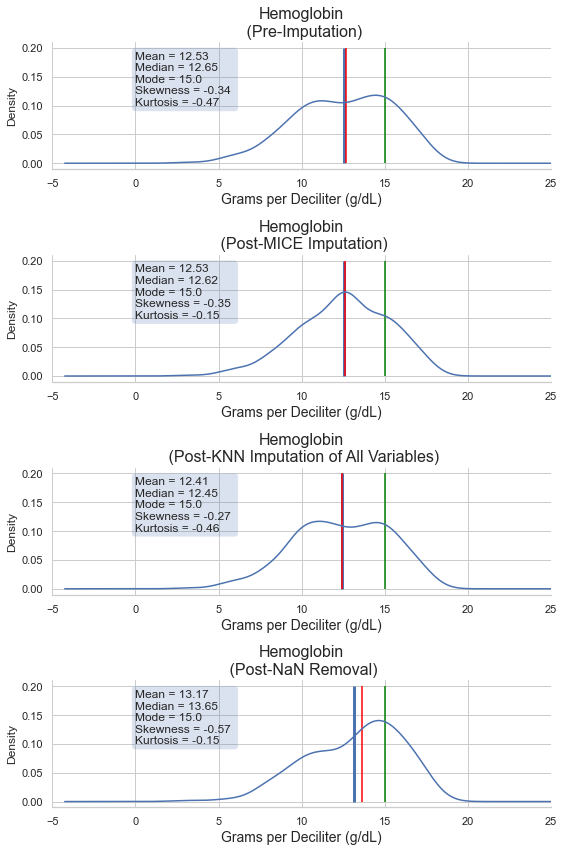

In [71]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,12))

plt.subplot(4,1,1)
plt.title("Hemoglobin\n (Pre-Imputation)", fontsize=16)
g = ax1 = ckd["haemoglobin"].plot(kind="density")
plt.vlines(ckd["haemoglobin"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd["haemoglobin"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["haemoglobin"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-5, 25)
plt.xlabel("Grams per Deciliter (g/dL)", fontsize=14);


plt.subplot(4,1,2)
plt.title("Hemoglobin\n (Post-MICE Imputation)", fontsize=16)
g1 = ax1 = ckd_copy1["haemoglobin"].plot(kind="density")
plt.vlines(ckd_copy1["haemoglobin"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy1["haemoglobin"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy1["haemoglobin"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-5, 25)
plt.xlabel("Grams per Deciliter (g/dL)", fontsize=14);

plt.subplot(4,1,3)
plt.title("Hemoglobin\n (Post-KNN Imputation of All Variables)", fontsize=16)
g2 = ax2 = ckd_copy2["haemoglobin"].plot(kind="density")
plt.vlines(ckd_copy2["haemoglobin"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy2["haemoglobin"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy2["haemoglobin"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-5, 25)
plt.xlabel("Grams per Deciliter (g/dL)", fontsize=14);


plt.subplot(4,1,4)
plt.title("Hemoglobin\n (Post-NaN Removal)", fontsize=16)
g3 = ax3 = ckd_copy3["haemoglobin"].plot(kind="density")
plt.vlines(ckd_copy3["haemoglobin"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=3.0);

plt.vlines(ckd_copy3["haemoglobin"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy3["haemoglobin"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-5, 25)
plt.xlabel("Grams per Deciliter (g/dL)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["haemoglobin"].mean(), 2)
median = np.round(ckd["haemoglobin"].median(), 2)
m = mode = np.round(ckd["haemoglobin"].mode(), 2)
mm = m.iloc[0]
skew = np.round(ckd["haemoglobin"].skew(), 2)
kurt = np.round(ckd["haemoglobin"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {mm} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(0, .10, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean1 = np.round(ckd_copy1["haemoglobin"].mean(), 2)
median1 = np.round(ckd_copy1["haemoglobin"].median(), 2)
m1 = mode = np.round(ckd_copy1["haemoglobin"].mode(), 2)
mm1 = m1.iloc[0]
skew1 = np.round(ckd_copy1["haemoglobin"].skew(), 2)
kurt1 = np.round(ckd_copy1["haemoglobin"].kurt(), 2)

textstr1 = "Mean" + f" = {mean1} \nMedian = {median1} \nMode = {mm1} \nSkewness = {skew1} \nKurtosis = {kurt1}"
props1 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g1.text(0, .10, textstr1, fontsize=12, bbox=props1)

#ckd_copy2
mean2 = np.round(ckd_copy2["haemoglobin"].mean(), 2)
median2 = np.round(ckd_copy2["haemoglobin"].median(), 2)
m2 = mode = np.round(ckd_copy2["haemoglobin"].mode(), 2)
mm2 = m2.iloc[0]
skew2 = np.round(ckd_copy2["haemoglobin"].skew(), 2)
kurt2 = np.round(ckd_copy2["haemoglobin"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {mm2} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(0, .10, textstr2, fontsize=12, bbox=props2)

#ckd_copy3
mean3 = np.round(ckd_copy3["haemoglobin"].mean(), 2)
median3 = np.round(ckd_copy3["haemoglobin"].median(), 2)
m3 = mode = np.round(ckd_copy3["haemoglobin"].mode(), 2)
mm3 = m3.iloc[0]
skew3 = np.round(ckd_copy3["haemoglobin"].skew(), 2)
kurt3 = np.round(ckd_copy3["haemoglobin"].kurt(), 2)

textstr3 = "Mean" + f" = {mean3} \nMedian = {median3} \nMode = {mm3} \nSkewness = {skew3} \nKurtosis = {kurt3}"
props3 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g3.text(0, .10, textstr3, fontsize=12, bbox=props3)

plt.tight_layout()
plt.show



In [72]:
ckd_copy3['packed_cell_volume'].mode()

0    44.0
1    52.0
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

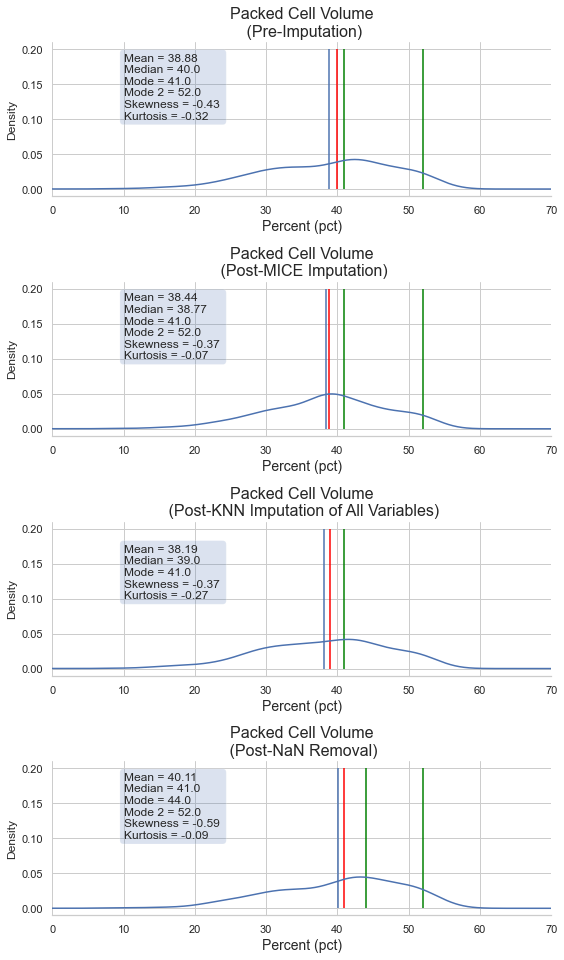

In [73]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,13.5))

plt.subplot(4,1,1)
plt.title("Packed Cell Volume\n (Pre-Imputation)", fontsize=16)
g = ax = ckd["packed_cell_volume"].plot(kind="density")
plt.vlines(ckd["packed_cell_volume"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd["packed_cell_volume"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["packed_cell_volume"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(0, 70)
plt.xlabel("Percent (pct)", fontsize=14);


plt.subplot(4,1,2)
plt.title("Packed Cell Volume\n (Post-MICE Imputation)", fontsize=16)
g1 = ax1 = ckd_copy1["packed_cell_volume"].plot(kind="density")
plt.vlines(ckd_copy1["packed_cell_volume"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy1["packed_cell_volume"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy1["packed_cell_volume"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(0, 70)
plt.xlabel("Percent (pct)", fontsize=14);


plt.subplot(4,1,3)
plt.title("Packed Cell Volume\n (Post-KNN Imputation of All Variables)", fontsize=16)
g2 = ax2 = ckd_copy2["packed_cell_volume"].plot(kind="density")
plt.vlines(ckd_copy2["packed_cell_volume"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy2["packed_cell_volume"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy2["packed_cell_volume"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(0, 70)
plt.xlabel("Percent (pct)", fontsize=14);


plt.subplot(4,1,4)
plt.title("Packed Cell Volume\n (Post-NaN Removal)", fontsize=16)
g3 = ax3 = ckd_copy3["packed_cell_volume"].plot(kind="density")
plt.vlines(ckd_copy3["packed_cell_volume"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy3["packed_cell_volume"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy3["packed_cell_volume"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(0, 70)
plt.xlabel("Percent (pct)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["packed_cell_volume"].mean(), 2)
median = np.round(ckd["packed_cell_volume"].median(), 2)
m = mode = np.round(ckd["packed_cell_volume"].mode(), 2)
mm = m.iloc[0]
mmm = m.iloc[1]
skew = np.round(ckd["packed_cell_volume"].skew(), 2)
kurt = np.round(ckd["packed_cell_volume"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {mm} \nMode 2 = {mmm} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(10, .10, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean1 = np.round(ckd_copy1["packed_cell_volume"].mean(), 2)
median1 = np.round(ckd_copy1["packed_cell_volume"].median(), 2)
m1 = mode = np.round(ckd_copy1["packed_cell_volume"].mode(), 2)
mm1 = m1.iloc[0]
mmm1 = m1.iloc[1]
skew1 = np.round(ckd_copy1["packed_cell_volume"].skew(), 2)
kurt1 = np.round(ckd_copy1["packed_cell_volume"].kurt(), 2)

textstr1 = "Mean" + f" = {mean1} \nMedian = {median1} \nMode = {mm1} \nMode 2 = {mmm1} \nSkewness = {skew1} \nKurtosis = {kurt1}"
props1 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g1.text(10, .10, textstr1, fontsize=12, bbox=props1)

#ckd_copy2
mean2 = np.round(ckd_copy2["packed_cell_volume"].mean(), 2)
median2 = np.round(ckd_copy2["packed_cell_volume"].median(), 2)
m2 = mode = np.round(ckd_copy2["packed_cell_volume"].mode(), 2)
mm2 = m2.iloc[0]
skew2 = np.round(ckd_copy2["packed_cell_volume"].skew(), 2)
kurt2 = np.round(ckd_copy2["packed_cell_volume"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {mm2} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(10, .10, textstr2, fontsize=12, bbox=props2)

#ckd_copy3
mean3 = np.round(ckd_copy3["packed_cell_volume"].mean(), 2)
median3 = np.round(ckd_copy3["packed_cell_volume"].median(), 2)
m3 = mode = np.round(ckd_copy3["packed_cell_volume"].mode(), 2)
mm3 = m3.iloc[0]
mmm3 = m3.iloc[1]
skew3 = np.round(ckd_copy3["packed_cell_volume"].skew(), 2)
kurt3 = np.round(ckd_copy3["packed_cell_volume"].kurt(), 2)

textstr3 = "Mean" + f" = {mean3} \nMedian = {median3} \nMode = {mm3} \nMode 2 = {mmm3} \nSkewness = {skew3} \nKurtosis = {kurt3}"
props3 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g3.text(10, .10, textstr3, fontsize=12, bbox=props3)


plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

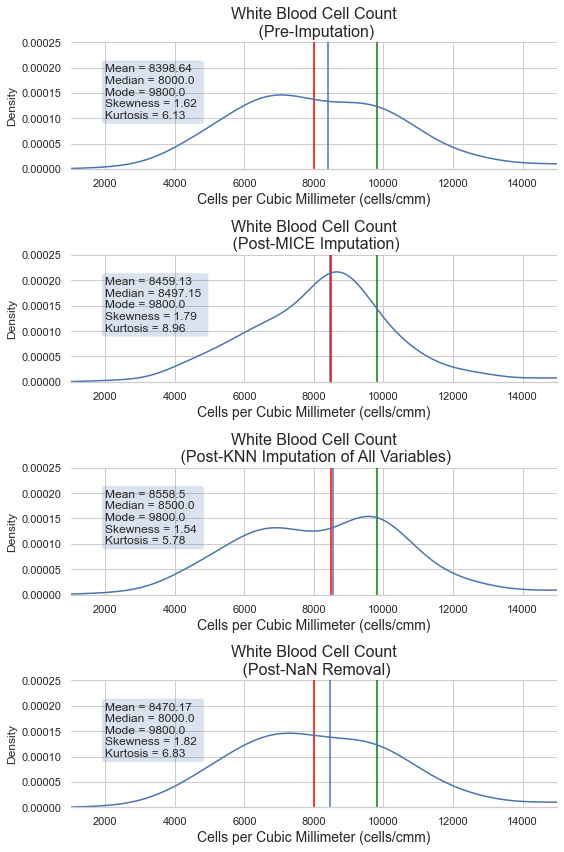

In [74]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,12))

plt.subplot(4,1,1)
plt.title("White Blood Cell Count\n (Pre-Imputation)", fontsize=16)
g = ax = ckd["white_blood_cell_count"].plot(kind="density")
plt.vlines(ckd["white_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd["white_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["white_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(1000, 15000)
plt.ylim(0,0.000250)
plt.xlabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14);


plt.subplot(4,1,2)
plt.title("White Blood Cell Count\n (Post-MICE Imputation)", fontsize=16)
g1 = ax1 = ckd_copy1["white_blood_cell_count"].plot(kind="density")
plt.vlines(ckd_copy1["white_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy1["white_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy1["white_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(1000, 15000)
plt.ylim(0,0.000250)
plt.xlabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14);


plt.subplot(4,1,3)
plt.title("White Blood Cell Count\n (Post-KNN Imputation of All Variables)", fontsize=16)
g2 = ax2 = ckd_copy2["white_blood_cell_count"].plot(kind="density")
plt.vlines(ckd_copy2["white_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy2["white_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy2["white_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(1000, 15000)
plt.ylim(0,0.000250)
plt.xlabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14);


plt.subplot(4,1,4)
plt.title("White Blood Cell Count\n (Post-NaN Removal)", fontsize=16)
g3 = ax3 = ckd_copy3["white_blood_cell_count"].plot(kind="density")
plt.vlines(ckd_copy3["white_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy3["white_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy3["white_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(1000, 15000)
plt.ylim(0,0.000250)
plt.xlabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["white_blood_cell_count"].mean(), 2)
median = np.round(ckd["white_blood_cell_count"].median(), 2)
m = mode = np.round(ckd["white_blood_cell_count"].mode(), 2)
mm = m.iloc[0]
skew = np.round(ckd["white_blood_cell_count"].skew(), 2)
kurt = np.round(ckd["white_blood_cell_count"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {mm} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(2000, .00010, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean1 = np.round(ckd_copy1["white_blood_cell_count"].mean(), 2)
median1 = np.round(ckd_copy1["white_blood_cell_count"].median(), 2)
m1 = mode = np.round(ckd_copy1["white_blood_cell_count"].mode(), 2)
mm1 = m1.iloc[0]
skew1 = np.round(ckd_copy1["white_blood_cell_count"].skew(), 2)
kurt1 = np.round(ckd_copy1["white_blood_cell_count"].kurt(), 2)

textstr1 = "Mean" + f" = {mean1} \nMedian = {median1} \nMode = {mm1} \nSkewness = {skew1} \nKurtosis = {kurt1}"
props1 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g1.text(2000, .00010, textstr1, fontsize=12, bbox=props1)

#ckd_copy2
mean2 = np.round(ckd_copy2["white_blood_cell_count"].mean(), 2)
median2 = np.round(ckd_copy2["white_blood_cell_count"].median(), 2)
m2 = mode = np.round(ckd_copy2["white_blood_cell_count"].mode(), 2)
mm2 = m2.iloc[0]
skew2 = np.round(ckd_copy2["white_blood_cell_count"].skew(), 2)
kurt2 = np.round(ckd_copy2["white_blood_cell_count"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {mm2} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(2000, .00010, textstr2, fontsize=12, bbox=props2)

#ckd_copy3
mean3 = np.round(ckd_copy3["white_blood_cell_count"].mean(), 2)
median3 = np.round(ckd_copy3["white_blood_cell_count"].median(), 2)
m3 = mode = np.round(ckd_copy3["white_blood_cell_count"].mode(), 2)
mm3 = m3.iloc[0]
skew3 = np.round(ckd_copy3["white_blood_cell_count"].skew(), 2)
kurt3 = np.round(ckd_copy3["white_blood_cell_count"].kurt(), 2)

textstr3 = "Mean" + f" = {mean3} \nMedian = {median3} \nMode = {mm3} \nSkewness = {skew3} \nKurtosis = {kurt3}"
props3 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g3.text(2000, .00010, textstr3, fontsize=12, bbox=props3)

plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

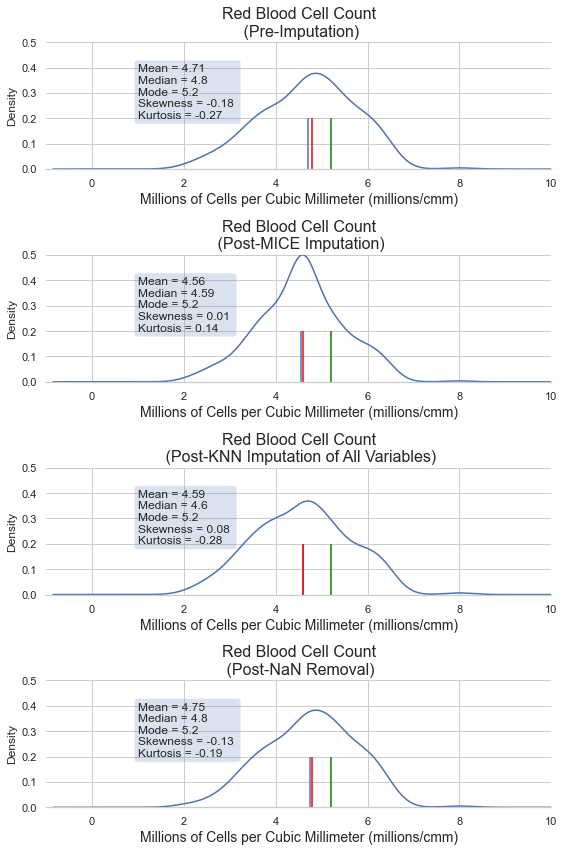

In [75]:
#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,12))

plt.subplot(4,1,1)
plt.title("Red Blood Cell Count\n (Pre-Imputation)", fontsize=16)
g = ax = ckd["red_blood_cell_count"].plot(kind="density")
plt.vlines(ckd["red_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd["red_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd["red_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-1, 10)
plt.ylim(0,0.5)
plt.xlabel("Millions of Cells per Cubic Millimeter (millions/cmm)", fontsize=14);


plt.subplot(4,1,2)
plt.title("Red Blood Cell Count\n (Post-MICE Imputation)", fontsize=16)
g1 = ax1 = ckd_copy1["red_blood_cell_count"].plot(kind="density")
plt.vlines(ckd_copy1["red_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy1["red_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy1["red_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-1, 10)
plt.ylim(0,0.5)
plt.xlabel("Millions of Cells per Cubic Millimeter (millions/cmm)", fontsize=14);


plt.subplot(4,1,3)
plt.title("Red Blood Cell Count\n (Post-KNN Imputation of All Variables)", fontsize=16)
g2 = ax2 = ckd_copy2["red_blood_cell_count"].plot(kind="density")
plt.vlines(ckd_copy2["red_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy2["red_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy2["red_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-1, 10)
plt.ylim(0,0.5)
plt.xlabel("Millions of Cells per Cubic Millimeter (millions/cmm)", fontsize=14);


plt.subplot(4,1,4)
plt.title("Red Blood Cell Count\n (Post-NaN Removal)", fontsize=16)
g3 = ax3 = ckd_copy3["red_blood_cell_count"].plot(kind="density")
plt.vlines(ckd_copy3["red_blood_cell_count"].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.5);

plt.vlines(ckd_copy3["red_blood_cell_count"].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="red");

plt.vlines(ckd_copy3["red_blood_cell_count"].mode(),   # Plot green line at mode
           ymin=0, 
           ymax=0.2,
           linewidth=1.5,
           color="green")

plt.xlim(-1, 10)
plt.ylim(0,0.5)
plt.xlabel("Millions of Cells per Cubic Millimeter (millions/cmm)", fontsize=14);

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#ckd
mean = np.round(ckd["red_blood_cell_count"].mean(), 2)
median = np.round(ckd["red_blood_cell_count"].median(), 2)
m = mode = np.round(ckd["red_blood_cell_count"].mode(), 2)
mm = m.iloc[0]
skew = np.round(ckd["red_blood_cell_count"].skew(), 2)
kurt = np.round(ckd["red_blood_cell_count"].kurt(), 2)

textstr = "Mean" + f" = {mean} \nMedian = {median} \nMode = {mm} \nSkewness = {skew} \nKurtosis = {kurt}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(1, .2, textstr, fontsize=12, bbox=props)

#ckd_copy1
mean1 = np.round(ckd_copy1["red_blood_cell_count"].mean(), 2)
median1 = np.round(ckd_copy1["red_blood_cell_count"].median(), 2)
m1 = mode = np.round(ckd_copy1["red_blood_cell_count"].mode(), 2)
mm1 = m1.iloc[0]
skew1 = np.round(ckd_copy1["red_blood_cell_count"].skew(), 2)
kurt1 = np.round(ckd_copy1["red_blood_cell_count"].kurt(), 2)

textstr1 = "Mean" + f" = {mean1} \nMedian = {median1} \nMode = {mm1} \nSkewness = {skew1} \nKurtosis = {kurt1}"
props1 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g1.text(1, .2, textstr1, fontsize=12, bbox=props1)

#ckd_copy2
mean2 = np.round(ckd_copy2["red_blood_cell_count"].mean(), 2)
median2 = np.round(ckd_copy2["red_blood_cell_count"].median(), 2)
m2 = mode = np.round(ckd_copy2["red_blood_cell_count"].mode(), 2)
mm2 = m2.iloc[0]
skew2 = np.round(ckd_copy2["red_blood_cell_count"].skew(), 2)
kurt2 = np.round(ckd_copy2["red_blood_cell_count"].kurt(), 2)

textstr2 = "Mean" + f" = {mean2} \nMedian = {median2} \nMode = {mm2} \nSkewness = {skew2} \nKurtosis = {kurt2}"
props2 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g2.text(1, .2, textstr2, fontsize=12, bbox=props2)

#ckd_copy3
mean3 = np.round(ckd_copy3["red_blood_cell_count"].mean(), 2)
median3 = np.round(ckd_copy3["red_blood_cell_count"].median(), 2)
m3 = mode = np.round(ckd_copy3["red_blood_cell_count"].mode(), 2)
mm3 = m3.iloc[0]
skew3 = np.round(ckd_copy3["red_blood_cell_count"].skew(), 2)
kurt3 = np.round(ckd_copy3["red_blood_cell_count"].kurt(), 2)

textstr3 = "Mean" + f" = {mean3} \nMedian = {median3} \nMode = {mm3} \nSkewness = {skew3} \nKurtosis = {kurt3}"
props3 = dict(boxstyle='round', facecolor='b', alpha=0.2)
g3.text(1, .2, textstr3, fontsize=12, bbox=props3)

plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

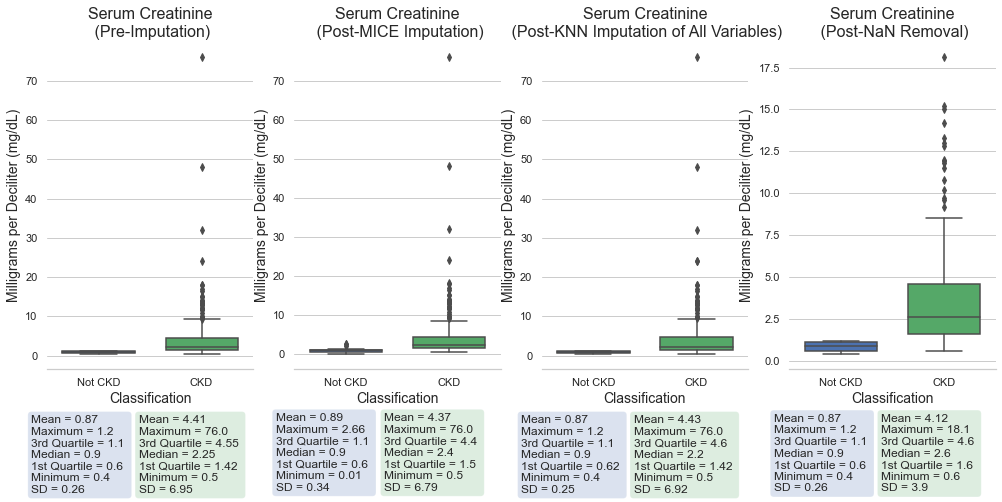

In [76]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy1[ckd_copy2['classification'] == 1]
ckdno1 = ckd_copy1[ckd_copy2['classification'] == 0]
ckdyes2 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno2 = ckd_copy2[ckd_copy2['classification'] == 0]
ckdyes3 = ckd_copy3[ckd_copy3['classification'] == 1]
ckdno3 = ckd_copy3[ckd_copy3['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(17,6))

plt.subplot(1,4,1)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Pre-Imputation)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['serum_creatinine'].mean(), 2)
maximum1 = np.round(ckdno['serum_creatinine'].max(), 2)
u_quan1 = np.round(ckdno['serum_creatinine'].quantile(0.75), 2)
median1 = np.round(ckdno['serum_creatinine'].median(), 2)
l_quan1 = np.round(ckdno['serum_creatinine'].quantile(0.25), 2)
minimum1 = np.round(ckdno['serum_creatinine'].min(), 2)
std1 = np.round(ckdno['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.65, -35, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['serum_creatinine'].mean(), 2)
maximum2 = np.round(ckdyes['serum_creatinine'].max(), 2)
u_quan2 = np.round(ckdyes['serum_creatinine'].quantile(0.75), 2)
median2 = np.round(ckdyes['serum_creatinine'].median(), 2)
l_quan2 = np.round(ckdyes['serum_creatinine'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['serum_creatinine'].min(), 2)
std2 = np.round(ckdyes['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.39, -35, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,2)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd_copy1, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Post-MICE Imputation)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['serum_creatinine'].mean(), 2)
maximum3 = np.round(ckdno1['serum_creatinine'].max(), 2)
u_quan3 = np.round(ckdno1['serum_creatinine'].quantile(0.75), 2)
median3 = np.round(ckdno1['serum_creatinine'].median(), 2)
l_quan3 = np.round(ckdno1['serum_creatinine'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['serum_creatinine'].min(), 2)
std3 = np.round(ckdno1['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.68, -35, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['serum_creatinine'].mean(), 2)
maximum4 = np.round(ckdyes1['serum_creatinine'].max(), 2)
u_quan4 = np.round(ckdyes1['serum_creatinine'].quantile(0.75), 2)
median4 = np.round(ckdyes1['serum_creatinine'].median(), 2)
l_quan4 = np.round(ckdyes1['serum_creatinine'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['serum_creatinine'].min(), 2)
std4 = np.round(ckdyes1['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.37, -35, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,3)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd_copy2, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Post-KNN Imputation of All Variables)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno2
mean5 = np.round(ckdno2['serum_creatinine'].mean(), 2)
maximum5 = np.round(ckdno2['serum_creatinine'].max(), 2)
u_quan5 = np.round(ckdno2['serum_creatinine'].quantile(0.75), 2)
median5 = np.round(ckdno2['serum_creatinine'].median(), 2)
l_quan5 = np.round(ckdno2['serum_creatinine'].quantile(0.25), 2)
minimum5 = np.round(ckdno2['serum_creatinine'].min(), 2)
std5 = np.round(ckdno2['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean5} \nMaximum = {maximum5} \n3rd Quartile = {u_quan5} \nMedian = {median5} \n1st Quartile = {l_quan5} \nMinimum = {minimum5} \nSD = {std5}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.70, -35, textstr, fontsize=12, bbox=props)

#ckdyes2
mean6 = np.round(ckdyes2['serum_creatinine'].mean(), 2)
maximum6 = np.round(ckdyes2['serum_creatinine'].max(), 2)
u_quan6 = np.round(ckdyes2['serum_creatinine'].quantile(0.75), 2)
median6 = np.round(ckdyes2['serum_creatinine'].median(), 2)
l_quan6 = np.round(ckdyes2['serum_creatinine'].quantile(0.25), 2)
minimum6 = np.round(ckdyes2['serum_creatinine'].min(), 2)
std6 = np.round(ckdyes2['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean6} \nMaximum = {maximum6} \n3rd Quartile = {u_quan6} \nMedian = {median6} \n1st Quartile = {l_quan6} \nMinimum = {minimum6} \nSD = {std6}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.39, -35, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,4)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd_copy3, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Post-NaN Removal)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno3
mean7 = np.round(ckdno3['serum_creatinine'].mean(), 2)
maximum7 = np.round(ckdno3['serum_creatinine'].max(), 2)
u_quan7 = np.round(ckdno3['serum_creatinine'].quantile(0.75), 2)
median7 = np.round(ckdno3['serum_creatinine'].median(), 2)
l_quan7 = np.round(ckdno3['serum_creatinine'].quantile(0.25), 2)
minimum7 = np.round(ckdno3['serum_creatinine'].min(), 2)
std7 = np.round(ckdno3['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean7} \nMaximum = {maximum7} \n3rd Quartile = {u_quan7} \nMedian = {median7} \n1st Quartile = {l_quan7} \nMinimum = {minimum7} \nSD = {std7}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.65, -7.8, textstr, fontsize=12, bbox=props)

#ckdyes3
mean8 = np.round(ckdyes3['serum_creatinine'].mean(), 2)
maximum8 = np.round(ckdyes3['serum_creatinine'].max(), 2)
u_quan8 = np.round(ckdyes3['serum_creatinine'].quantile(0.75), 2)
median8 = np.round(ckdyes3['serum_creatinine'].median(), 2)
l_quan8 = np.round(ckdyes3['serum_creatinine'].quantile(0.25), 2)
minimum8 = np.round(ckdyes3['serum_creatinine'].min(), 2)
std8 = np.round(ckdyes3['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean8} \nMaximum = {maximum8} \n3rd Quartile = {u_quan8} \nMedian = {median8} \n1st Quartile = {l_quan8} \nMinimum = {minimum8} \nSD = {std8}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.39, -7.8, textstr, fontsize=12, bbox=props)

#plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

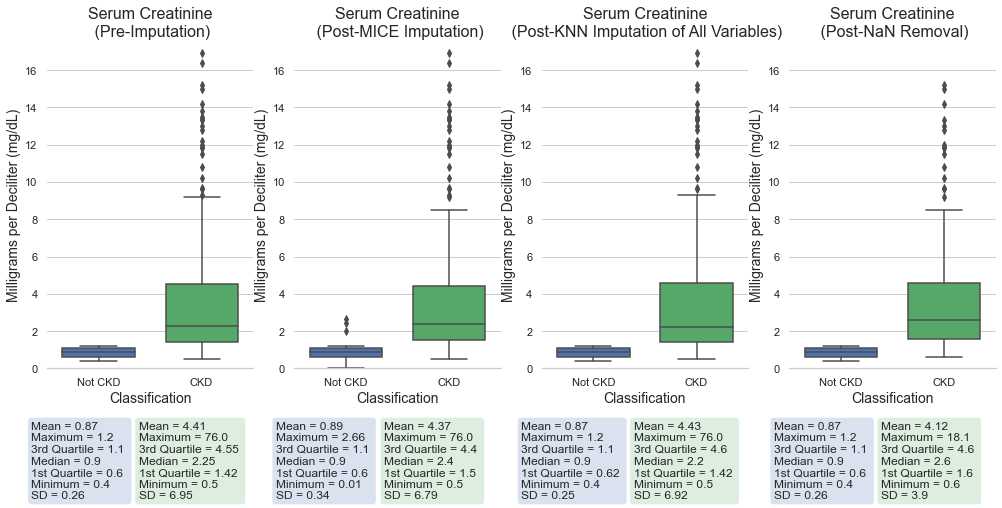

In [77]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy1[ckd_copy2['classification'] == 1]
ckdno1 = ckd_copy1[ckd_copy2['classification'] == 0]
ckdyes2 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno2 = ckd_copy2[ckd_copy2['classification'] == 0]
ckdyes3 = ckd_copy3[ckd_copy3['classification'] == 1]
ckdno3 = ckd_copy3[ckd_copy3['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(17,6))

plt.subplot(1,4,1)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Pre-Imputation)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)
plt.ylim(0,17.5)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['serum_creatinine'].mean(), 2)
maximum1 = np.round(ckdno['serum_creatinine'].max(), 2)
u_quan1 = np.round(ckdno['serum_creatinine'].quantile(0.75), 2)
median1 = np.round(ckdno['serum_creatinine'].median(), 2)
l_quan1 = np.round(ckdno['serum_creatinine'].quantile(0.25), 2)
minimum1 = np.round(ckdno['serum_creatinine'].min(), 2)
std1 = np.round(ckdno['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.65, -7, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['serum_creatinine'].mean(), 2)
maximum2 = np.round(ckdyes['serum_creatinine'].max(), 2)
u_quan2 = np.round(ckdyes['serum_creatinine'].quantile(0.75), 2)
median2 = np.round(ckdyes['serum_creatinine'].median(), 2)
l_quan2 = np.round(ckdyes['serum_creatinine'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['serum_creatinine'].min(), 2)
std2 = np.round(ckdyes['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.39, -7, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,2)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd_copy1, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Post-MICE Imputation)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)
plt.ylim(0,17.5)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['serum_creatinine'].mean(), 2)
maximum3 = np.round(ckdno1['serum_creatinine'].max(), 2)
u_quan3 = np.round(ckdno1['serum_creatinine'].quantile(0.75), 2)
median3 = np.round(ckdno1['serum_creatinine'].median(), 2)
l_quan3 = np.round(ckdno1['serum_creatinine'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['serum_creatinine'].min(), 2)
std3 = np.round(ckdno1['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.68, -7, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['serum_creatinine'].mean(), 2)
maximum4 = np.round(ckdyes1['serum_creatinine'].max(), 2)
u_quan4 = np.round(ckdyes1['serum_creatinine'].quantile(0.75), 2)
median4 = np.round(ckdyes1['serum_creatinine'].median(), 2)
l_quan4 = np.round(ckdyes1['serum_creatinine'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['serum_creatinine'].min(), 2)
std4 = np.round(ckdyes1['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.37, -7, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,3)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd_copy2, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Post-KNN Imputation of All Variables)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)
plt.ylim(0,17.5)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno2
mean5 = np.round(ckdno2['serum_creatinine'].mean(), 2)
maximum5 = np.round(ckdno2['serum_creatinine'].max(), 2)
u_quan5 = np.round(ckdno2['serum_creatinine'].quantile(0.75), 2)
median5 = np.round(ckdno2['serum_creatinine'].median(), 2)
l_quan5 = np.round(ckdno2['serum_creatinine'].quantile(0.25), 2)
minimum5 = np.round(ckdno2['serum_creatinine'].min(), 2)
std5 = np.round(ckdno2['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean5} \nMaximum = {maximum5} \n3rd Quartile = {u_quan5} \nMedian = {median5} \n1st Quartile = {l_quan5} \nMinimum = {minimum5} \nSD = {std5}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.70, -7, textstr, fontsize=12, bbox=props)

#ckdyes2
mean6 = np.round(ckdyes2['serum_creatinine'].mean(), 2)
maximum6 = np.round(ckdyes2['serum_creatinine'].max(), 2)
u_quan6 = np.round(ckdyes2['serum_creatinine'].quantile(0.75), 2)
median6 = np.round(ckdyes2['serum_creatinine'].median(), 2)
l_quan6 = np.round(ckdyes2['serum_creatinine'].quantile(0.25), 2)
minimum6 = np.round(ckdyes2['serum_creatinine'].min(), 2)
std6 = np.round(ckdyes2['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean6} \nMaximum = {maximum6} \n3rd Quartile = {u_quan6} \nMedian = {median6} \n1st Quartile = {l_quan6} \nMinimum = {minimum6} \nSD = {std6}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.39, -7, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,4)
g = sns.boxplot(x='classification', y='serum_creatinine', data=ckd_copy3, width=0.7)

#title and labels
plt.title("Serum Creatinine\n (Post-NaN Removal)", fontsize=16)
plt.ylabel("Milligrams per Deciliter (mg/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)
plt.ylim(0,17.5)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['b','g']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno3
mean7 = np.round(ckdno3['serum_creatinine'].mean(), 2)
maximum7 = np.round(ckdno3['serum_creatinine'].max(), 2)
u_quan7 = np.round(ckdno3['serum_creatinine'].quantile(0.75), 2)
median7 = np.round(ckdno3['serum_creatinine'].median(), 2)
l_quan7 = np.round(ckdno3['serum_creatinine'].quantile(0.25), 2)
minimum7 = np.round(ckdno3['serum_creatinine'].min(), 2)
std7 = np.round(ckdno3['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean7} \nMaximum = {maximum7} \n3rd Quartile = {u_quan7} \nMedian = {median7} \n1st Quartile = {l_quan7} \nMinimum = {minimum7} \nSD = {std7}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(-0.65, -7, textstr, fontsize=12, bbox=props)

#ckdyes3
mean8 = np.round(ckdyes3['serum_creatinine'].mean(), 2)
maximum8 = np.round(ckdyes3['serum_creatinine'].max(), 2)
u_quan8 = np.round(ckdyes3['serum_creatinine'].quantile(0.75), 2)
median8 = np.round(ckdyes3['serum_creatinine'].median(), 2)
l_quan8 = np.round(ckdyes3['serum_creatinine'].quantile(0.25), 2)
minimum8 = np.round(ckdyes3['serum_creatinine'].min(), 2)
std8 = np.round(ckdyes3['serum_creatinine'].std(), 2)
textstr = "Mean" + f" = {mean8} \nMaximum = {maximum8} \n3rd Quartile = {u_quan8} \nMedian = {median8} \n1st Quartile = {l_quan8} \nMinimum = {minimum8} \nSD = {std8}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.39, -7, textstr, fontsize=12, bbox=props)

#plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

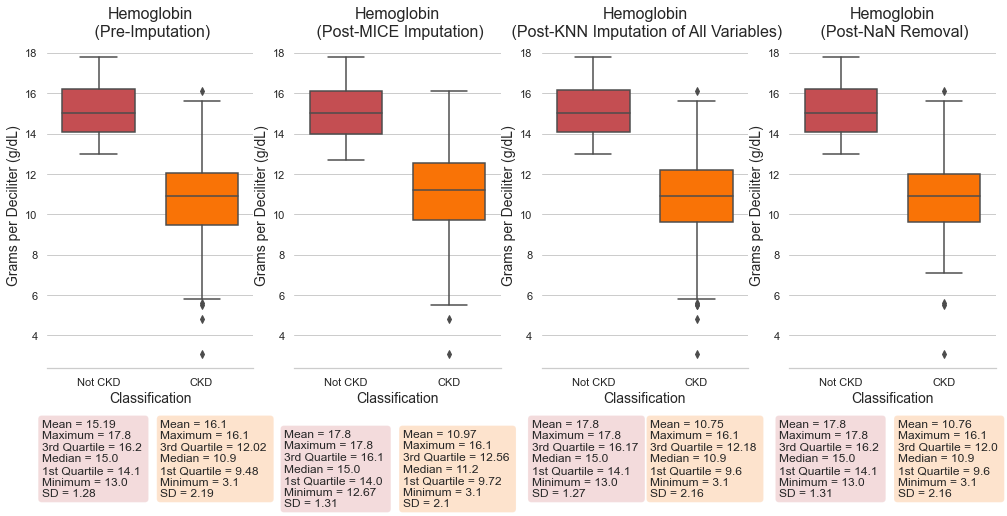

In [78]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy1[ckd_copy1['classification'] == 1]
ckdno1 = ckd_copy1[ckd_copy1['classification'] == 0]
ckdyes2 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno2 = ckd_copy2[ckd_copy2['classification'] == 0]
ckdyes3 = ckd_copy3[ckd_copy3['classification'] == 1]
ckdno3 = ckd_copy3[ckd_copy3['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(17,6))

plt.subplot(1,4,1)
g = sns.boxplot(x='classification', y='haemoglobin', data=ckd, width=0.7)

#title and labels
plt.title("Hemoglobin\n (Pre-Imputation)", fontsize=16)
plt.ylabel("Grams per Deciliter (g/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['r','xkcd:orange']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['haemoglobin'].mean(), 2)
maximum1 = np.round(ckdno['haemoglobin'].max(), 2)
u_quan1 = np.round(ckdno['haemoglobin'].quantile(0.75), 2)
median1 = np.round(ckdno['haemoglobin'].median(), 2)
l_quan1 = np.round(ckdno['haemoglobin'].quantile(0.25), 2)
minimum1 = np.round(ckdno['haemoglobin'].min(), 2)
std1 = np.round(ckdno['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='r', alpha=0.2)
g.text(-0.55, -4, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['haemoglobin'].max(), 2)
maximum2 = np.round(ckdyes['haemoglobin'].max(), 2)
u_quan2 = np.round(ckdyes['haemoglobin'].quantile(0.75), 2)
median2 = np.round(ckdyes['haemoglobin'].median(), 2)
l_quan2 = np.round(ckdyes['haemoglobin'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['haemoglobin'].min(), 2)
std2 = np.round(ckdyes['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='xkcd:orange', alpha=0.2)
g.text(.60, -4, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,2)
g = sns.boxplot(x='classification', y='haemoglobin', data=ckd_copy1, width=0.7)

#title and labels
plt.title("Hemoglobin\n (Post-MICE Imputation)", fontsize=16)
plt.ylabel("Grams per Deciliter (g/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['r','xkcd:orange']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['haemoglobin'].max(), 2)
maximum3 = np.round(ckdno1['haemoglobin'].max(), 2)
u_quan3 = np.round(ckdno1['haemoglobin'].quantile(0.75), 2)
median3 = np.round(ckdno1['haemoglobin'].median(), 2)
l_quan3 = np.round(ckdno1['haemoglobin'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['haemoglobin'].min(), 2)
std3 = np.round(ckdno1['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='r', alpha=0.2)
g.text(-0.60, -4.5, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['haemoglobin'].mean(), 2)
maximum4 = np.round(ckdyes1['haemoglobin'].max(), 2)
u_quan4 = np.round(ckdyes1['haemoglobin'].quantile(0.75), 2)
median4 = np.round(ckdyes1['haemoglobin'].median(), 2)
l_quan4 = np.round(ckdyes1['haemoglobin'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['haemoglobin'].min(), 2)
std4 = np.round(ckdyes1['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='xkcd:orange', alpha=0.2)
g.text(.55, -4.5, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,3)
g = sns.boxplot(x='classification', y='haemoglobin', data=ckd_copy2, width=0.7)

#title and labels
plt.title("Hemoglobin\n (Post-KNN Imputation of All Variables)", fontsize=16)
plt.ylabel("Grams per Deciliter (g/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['r','xkcd:orange']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno2
mean5 = np.round(ckdno2['haemoglobin'].max(), 2)
maximum5 = np.round(ckdno2['haemoglobin'].max(), 2)
u_quan5 = np.round(ckdno2['haemoglobin'].quantile(0.75), 2)
median5 = np.round(ckdno2['haemoglobin'].median(), 2)
l_quan5 = np.round(ckdno2['haemoglobin'].quantile(0.25), 2)
minimum5 = np.round(ckdno2['haemoglobin'].min(), 2)
std5 = np.round(ckdno2['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean5} \nMaximum = {maximum5} \n3rd Quartile = {u_quan5} \nMedian = {median5} \n1st Quartile = {l_quan5} \nMinimum = {minimum5} \nSD = {std5}"
props = dict(boxstyle='round', facecolor='r', alpha=0.2)
g.text(-0.60, -4, textstr, fontsize=12, bbox=props)

#ckdyes2
mean6 = np.round(ckdyes2['haemoglobin'].mean(), 2)
maximum6 = np.round(ckdyes2['haemoglobin'].max(), 2)
u_quan6 = np.round(ckdyes2['haemoglobin'].quantile(0.75), 2)
median6 = np.round(ckdyes2['haemoglobin'].median(), 2)
l_quan6 = np.round(ckdyes2['haemoglobin'].quantile(0.25), 2)
minimum6 = np.round(ckdyes2['haemoglobin'].min(), 2)
std6 = np.round(ckdyes2['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean6} \nMaximum = {maximum6} \n3rd Quartile = {u_quan6} \nMedian = {median6} \n1st Quartile = {l_quan6} \nMinimum = {minimum6} \nSD = {std6}"
props = dict(boxstyle='round', facecolor='xkcd:orange', alpha=0.2)
g.text(.55, -4, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,4)
g = sns.boxplot(x='classification', y='haemoglobin', data=ckd_copy3, width=0.7)

#title and labels
plt.title("Hemoglobin\n (Post-NaN Removal)", fontsize=16)
plt.ylabel("Grams per Deciliter (g/dL)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['r','xkcd:orange']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno3
mean7 = np.round(ckdno3['haemoglobin'].max(), 2)
maximum7 = np.round(ckdno3['haemoglobin'].max(), 2)
u_quan7 = np.round(ckdno3['haemoglobin'].quantile(0.75), 2)
median7 = np.round(ckdno3['haemoglobin'].median(), 2)
l_quan7 = np.round(ckdno3['haemoglobin'].quantile(0.25), 2)
minimum7 = np.round(ckdno3['haemoglobin'].min(), 2)
std7 = np.round(ckdno3['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean7} \nMaximum = {maximum7} \n3rd Quartile = {u_quan7} \nMedian = {median7} \n1st Quartile = {l_quan7} \nMinimum = {minimum7} \nSD = {std7}"
props = dict(boxstyle='round', facecolor='r', alpha=0.2)
g.text(-0.60, -4, textstr, fontsize=12, bbox=props)

#ckdyes3
mean8 = np.round(ckdyes3['haemoglobin'].mean(), 2)
maximum8 = np.round(ckdyes3['haemoglobin'].max(), 2)
u_quan8 = np.round(ckdyes3['haemoglobin'].quantile(0.75), 2)
median8 = np.round(ckdyes3['haemoglobin'].median(), 2)
l_quan8 = np.round(ckdyes3['haemoglobin'].quantile(0.25), 2)
minimum8 = np.round(ckdyes3['haemoglobin'].min(), 2)
std8 = np.round(ckdyes3['haemoglobin'].std(), 2)
textstr = "Mean" + f" = {mean8} \nMaximum = {maximum8} \n3rd Quartile = {u_quan8} \nMedian = {median8} \n1st Quartile = {l_quan8} \nMinimum = {minimum8} \nSD = {std8}"
props = dict(boxstyle='round', facecolor='xkcd:orange', alpha=0.2)
g.text(.55, -4, textstr, fontsize=12, bbox=props)

#plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

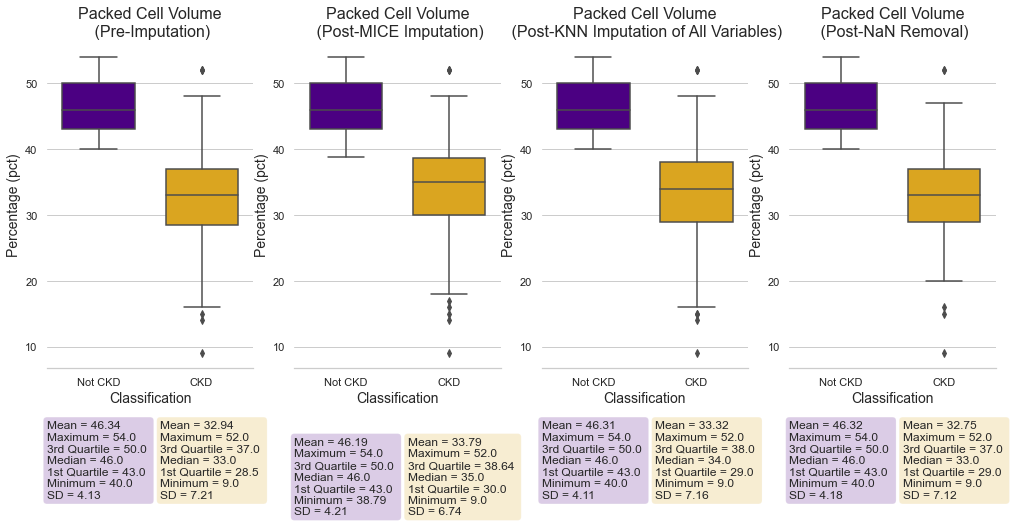

In [79]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy1[ckd_copy1['classification'] == 1]
ckdno1 = ckd_copy1[ckd_copy1['classification'] == 0]
ckdyes2 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno2 = ckd_copy2[ckd_copy2['classification'] == 0]
ckdyes3 = ckd_copy3[ckd_copy3['classification'] == 1]
ckdno3 = ckd_copy3[ckd_copy3['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(17,6))

plt.subplot(1,4,1)
g = sns.boxplot(x='classification', y='packed_cell_volume', data=ckd, width=0.7)

#title and labels
plt.title("Packed Cell Volume\n (Pre-Imputation)", fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['indigo','goldenrod']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['packed_cell_volume'].mean(), 2)
maximum1 = np.round(ckdno['packed_cell_volume'].max(), 2)
u_quan1 = np.round(ckdno['packed_cell_volume'].quantile(0.75), 2)
median1 = np.round(ckdno['packed_cell_volume'].median(), 2)
l_quan1 = np.round(ckdno['packed_cell_volume'].quantile(0.25), 2)
minimum1 = np.round(ckdno['packed_cell_volume'].min(), 2)
std1 = np.round(ckdno['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='indigo', alpha=0.2)
g.text(-0.50, -13, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['packed_cell_volume'].mean(), 2)
maximum2 = np.round(ckdyes['packed_cell_volume'].max(), 2)
u_quan2 = np.round(ckdyes['packed_cell_volume'].quantile(0.75), 2)
median2 = np.round(ckdyes['packed_cell_volume'].median(), 2)
l_quan2 = np.round(ckdyes['packed_cell_volume'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['packed_cell_volume'].min(), 2)
std2 = np.round(ckdyes['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='goldenrod', alpha=0.2)
g.text(.60, -13, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,2)
g = sns.boxplot(x='classification', y='packed_cell_volume', data=ckd_copy1, width=0.7)

#title and labels
plt.title("Packed Cell Volume\n (Post-MICE Imputation)", fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['indigo','goldenrod']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['packed_cell_volume'].mean(), 2)
maximum3 = np.round(ckdno1['packed_cell_volume'].max(), 2)
u_quan3 = np.round(ckdno1['packed_cell_volume'].quantile(0.75), 2)
median3 = np.round(ckdno1['packed_cell_volume'].median(), 2)
l_quan3 = np.round(ckdno1['packed_cell_volume'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['packed_cell_volume'].min(), 2)
std3 = np.round(ckdno1['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='indigo', alpha=0.2)
g.text(-0.50, -15.5, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['packed_cell_volume'].mean(), 2)
maximum4 = np.round(ckdyes1['packed_cell_volume'].max(), 2)
u_quan4 = np.round(ckdyes1['packed_cell_volume'].quantile(0.75), 2)
median4 = np.round(ckdyes1['packed_cell_volume'].median(), 2)
l_quan4 = np.round(ckdyes1['packed_cell_volume'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['packed_cell_volume'].min(), 2)
std4 = np.round(ckdyes1['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='goldenrod', alpha=0.2)
g.text(.60, -15.5, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,3)
g = sns.boxplot(x='classification', y='packed_cell_volume', data=ckd_copy2, width=0.7)

#title and labels
plt.title("Packed Cell Volume\n (Post-KNN Imputation of All Variables)", fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['indigo','goldenrod']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno2
mean5 = np.round(ckdno2['packed_cell_volume'].mean(), 2)
maximum5 = np.round(ckdno2['packed_cell_volume'].max(), 2)
u_quan5 = np.round(ckdno2['packed_cell_volume'].quantile(0.75), 2)
median5 = np.round(ckdno2['packed_cell_volume'].median(), 2)
l_quan5 = np.round(ckdno2['packed_cell_volume'].quantile(0.25), 2)
minimum5 = np.round(ckdno2['packed_cell_volume'].min(), 2)
std5 = np.round(ckdno2['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean5} \nMaximum = {maximum5} \n3rd Quartile = {u_quan5} \nMedian = {median5} \n1st Quartile = {l_quan5} \nMinimum = {minimum5} \nSD = {std5}"
props = dict(boxstyle='round', facecolor='indigo', alpha=0.2)
g.text(-0.50, -13, textstr, fontsize=12, bbox=props)

#ckdyes2
mean6 = np.round(ckdyes2['packed_cell_volume'].mean(), 2)
maximum6 = np.round(ckdyes2['packed_cell_volume'].max(), 2)
u_quan6 = np.round(ckdyes2['packed_cell_volume'].quantile(0.75), 2)
median6 = np.round(ckdyes2['packed_cell_volume'].median(), 2)
l_quan6 = np.round(ckdyes2['packed_cell_volume'].quantile(0.25), 2)
minimum6 = np.round(ckdyes2['packed_cell_volume'].min(), 2)
std6 = np.round(ckdyes2['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean6} \nMaximum = {maximum6} \n3rd Quartile = {u_quan6} \nMedian = {median6} \n1st Quartile = {l_quan6} \nMinimum = {minimum6} \nSD = {std6}"
props = dict(boxstyle='round', facecolor='goldenrod', alpha=0.2)
g.text(.60, -13, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,4)
g = sns.boxplot(x='classification', y='packed_cell_volume', data=ckd_copy3, width=0.7)

#title and labels
plt.title("Packed Cell Volume\n (Post-NaN Removal)", fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['indigo','goldenrod']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean7 = np.round(ckdno3['packed_cell_volume'].mean(), 2)
maximum7 = np.round(ckdno3['packed_cell_volume'].max(), 2)
u_quan7 = np.round(ckdno3['packed_cell_volume'].quantile(0.75), 2)
median7 = np.round(ckdno3['packed_cell_volume'].median(), 2)
l_quan7 = np.round(ckdno3['packed_cell_volume'].quantile(0.25), 2)
minimum7 = np.round(ckdno3['packed_cell_volume'].min(), 2)
std7 = np.round(ckdno3['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean7} \nMaximum = {maximum7} \n3rd Quartile = {u_quan7} \nMedian = {median7} \n1st Quartile = {l_quan7} \nMinimum = {minimum7} \nSD = {std7}"
props = dict(boxstyle='round', facecolor='indigo', alpha=0.2)
g.text(-0.50, -13, textstr, fontsize=12, bbox=props)

#ckdyes1
mean8 = np.round(ckdyes3['packed_cell_volume'].mean(), 2)
maximum8 = np.round(ckdyes3['packed_cell_volume'].max(), 2)
u_quan8 = np.round(ckdyes3['packed_cell_volume'].quantile(0.75), 2)
median8 = np.round(ckdyes3['packed_cell_volume'].median(), 2)
l_quan8 = np.round(ckdyes3['packed_cell_volume'].quantile(0.25), 2)
minimum8 = np.round(ckdyes3['packed_cell_volume'].min(), 2)
std8 = np.round(ckdyes3['packed_cell_volume'].std(), 2)
textstr = "Mean" + f" = {mean8} \nMaximum = {maximum8} \n3rd Quartile = {u_quan8} \nMedian = {median8} \n1st Quartile = {l_quan8} \nMinimum = {minimum8} \nSD = {std8}"
props = dict(boxstyle='round', facecolor='goldenrod', alpha=0.2)
g.text(.60, -13, textstr, fontsize=12, bbox=props)

#plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

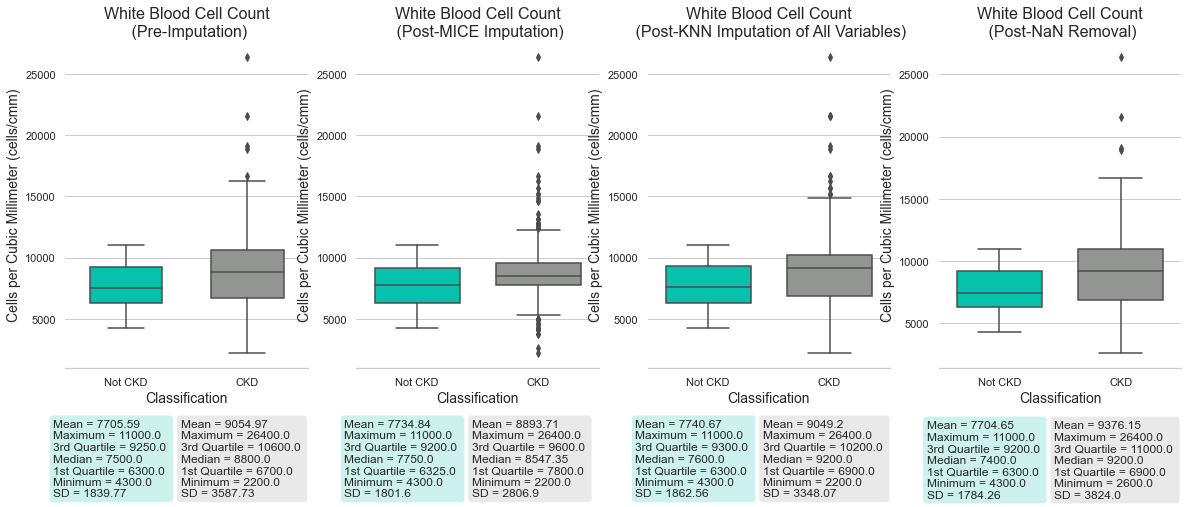

In [80]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy1[ckd_copy1['classification'] == 1]
ckdno1 = ckd_copy1[ckd_copy1['classification'] == 0]
ckdyes2 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno2 = ckd_copy2[ckd_copy2['classification'] == 0]
ckdyes3 = ckd_copy3[ckd_copy3['classification'] == 1]
ckdno3 = ckd_copy3[ckd_copy3['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
g = sns.boxplot(x='classification', y='white_blood_cell_count', data=ckd, width=0.6)

#title and labels
plt.title("White Blood Cell Count\n (Pre-Imputation)", fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:turquoise','xkcd:grey']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['white_blood_cell_count'].mean(), 2)
maximum1 = np.round(ckdno['white_blood_cell_count'].max(), 2)
u_quan1 = np.round(ckdno['white_blood_cell_count'].quantile(0.75), 2)
median1 = np.round(ckdno['white_blood_cell_count'].median(), 2)
l_quan1 = np.round(ckdno['white_blood_cell_count'].quantile(0.25), 2)
minimum1 = np.round(ckdno['white_blood_cell_count'].min(), 2)
std1 = np.round(ckdno['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='xkcd:turquoise', alpha=0.2)
g.text(-.6, -9500, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['white_blood_cell_count'].mean(), 2)
maximum2 = np.round(ckdyes['white_blood_cell_count'].max(), 2)
u_quan2 = np.round(ckdyes['white_blood_cell_count'].quantile(0.75), 2)
median2 = np.round(ckdyes['white_blood_cell_count'].median(), 2)
l_quan2 = np.round(ckdyes['white_blood_cell_count'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['white_blood_cell_count'].min(), 2)
std2 = np.round(ckdyes['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='xkcd:grey', alpha=0.2)
g.text(.45, -9500, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,2)
g = sns.boxplot(x='classification', y='white_blood_cell_count', data=ckd_copy1, width=0.7)

#title and labels
plt.title("White Blood Cell Count\n (Post-MICE Imputation)", fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:turquoise','xkcd:grey']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['white_blood_cell_count'].mean(), 2)
maximum3 = np.round(ckdno1['white_blood_cell_count'].max(), 2)
u_quan3 = np.round(ckdno1['white_blood_cell_count'].quantile(0.75), 2)
median3 = np.round(ckdno1['white_blood_cell_count'].median(), 2)
l_quan3 = np.round(ckdno1['white_blood_cell_count'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['white_blood_cell_count'].min(), 2)
std3 = np.round(ckdno1['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='xkcd:turquoise', alpha=0.2)
g.text(-.6, -9500, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['white_blood_cell_count'].mean(), 2)
maximum4 = np.round(ckdyes1['white_blood_cell_count'].max(), 2)
u_quan4 = np.round(ckdyes1['white_blood_cell_count'].quantile(0.75), 2)
median4 = np.round(ckdyes1['white_blood_cell_count'].median(), 2)
l_quan4 = np.round(ckdyes1['white_blood_cell_count'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['white_blood_cell_count'].min(), 2)
std4 = np.round(ckdyes1['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='xkcd:grey', alpha=0.2)
g.text(.45, -9500, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,3)
g = sns.boxplot(x='classification', y='white_blood_cell_count', data=ckd_copy2, width=0.7)

#title and labels
plt.title("White Blood Cell Count\n (Post-KNN Imputation of All Variables)", fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:turquoise','xkcd:grey']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno2
mean5 = np.round(ckdno2['white_blood_cell_count'].mean(), 2)
maximum5 = np.round(ckdno2['white_blood_cell_count'].max(), 2)
u_quan5 = np.round(ckdno2['white_blood_cell_count'].quantile(0.75), 2)
median5 = np.round(ckdno2['white_blood_cell_count'].median(), 2)
l_quan5 = np.round(ckdno2['white_blood_cell_count'].quantile(0.25), 2)
minimum5 = np.round(ckdno2['white_blood_cell_count'].min(), 2)
std5 = np.round(ckdno2['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean5} \nMaximum = {maximum5} \n3rd Quartile = {u_quan5} \nMedian = {median5} \n1st Quartile = {l_quan5} \nMinimum = {minimum5} \nSD = {std5}"
props = dict(boxstyle='round', facecolor='xkcd:turquoise', alpha=0.2)
g.text(-.6, -9500, textstr, fontsize=12, bbox=props)

#ckdyes2
mean6 = np.round(ckdyes2['white_blood_cell_count'].mean(), 2)
maximum6 = np.round(ckdyes2['white_blood_cell_count'].max(), 2)
u_quan6 = np.round(ckdyes2['white_blood_cell_count'].quantile(0.75), 2)
median6 = np.round(ckdyes2['white_blood_cell_count'].median(), 2)
l_quan6 = np.round(ckdyes2['white_blood_cell_count'].quantile(0.25), 2)
minimum6 = np.round(ckdyes2['white_blood_cell_count'].min(), 2)
std6 = np.round(ckdyes2['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean6} \nMaximum = {maximum6} \n3rd Quartile = {u_quan6} \nMedian = {median6} \n1st Quartile = {l_quan6} \nMinimum = {minimum6} \nSD = {std6}"
props = dict(boxstyle='round', facecolor='xkcd:grey', alpha=0.2)
g.text(.45, -9500, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,4)
g = sns.boxplot(x='classification', y='white_blood_cell_count', data=ckd_copy3, width=0.7)

#title and labels
plt.title("White Blood Cell Count\n (Post-NaN Removal)", fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:turquoise','xkcd:grey']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno3
mean7 = np.round(ckdno3['white_blood_cell_count'].mean(), 2)
maximum7 = np.round(ckdno3['white_blood_cell_count'].max(), 2)
u_quan7 = np.round(ckdno3['white_blood_cell_count'].quantile(0.75), 2)
median7 = np.round(ckdno3['white_blood_cell_count'].median(), 2)
l_quan7 = np.round(ckdno3['white_blood_cell_count'].quantile(0.25), 2)
minimum7 = np.round(ckdno3['white_blood_cell_count'].min(), 2)
std7 = np.round(ckdno3['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean7} \nMaximum = {maximum7} \n3rd Quartile = {u_quan7} \nMedian = {median7} \n1st Quartile = {l_quan7} \nMinimum = {minimum7} \nSD = {std7}"
props = dict(boxstyle='round', facecolor='xkcd:turquoise', alpha=0.2)
g.text(-.6, -9000, textstr, fontsize=12, bbox=props)

#ckdyes3
mean8 = np.round(ckdyes3['white_blood_cell_count'].mean(), 2)
maximum8 = np.round(ckdyes3['white_blood_cell_count'].max(), 2)
u_quan8 = np.round(ckdyes3['white_blood_cell_count'].quantile(0.75), 2)
median8 = np.round(ckdyes3['white_blood_cell_count'].median(), 2)
l_quan8 = np.round(ckdyes3['white_blood_cell_count'].quantile(0.25), 2)
minimum8 = np.round(ckdyes3['white_blood_cell_count'].min(), 2)
std8 = np.round(ckdyes3['white_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean8} \nMaximum = {maximum8} \n3rd Quartile = {u_quan8} \nMedian = {median8} \n1st Quartile = {l_quan8} \nMinimum = {minimum8} \nSD = {std8}"
props = dict(boxstyle='round', facecolor='xkcd:grey', alpha=0.2)
g.text(.45, -9000, textstr, fontsize=12, bbox=props)

#plt.tight_layout(pad=1.0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

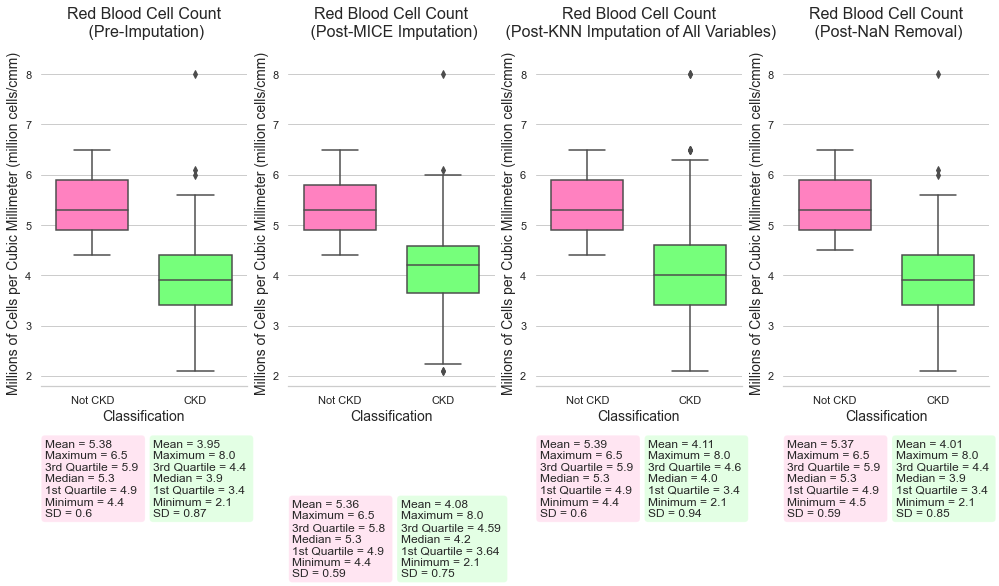

In [81]:
ckdyes = ckd.loc[ckd['classification'] == 1]
ckdno = ckd.loc[ckd['classification'] == 0]
ckdyes1 = ckd_copy1[ckd_copy1['classification'] == 1]
ckdno1 = ckd_copy1[ckd_copy1['classification'] == 0]
ckdyes2 = ckd_copy2[ckd_copy2['classification'] == 1]
ckdno2 = ckd_copy2[ckd_copy2['classification'] == 0]
ckdyes3 = ckd_copy3[ckd_copy3['classification'] == 1]
ckdno3 = ckd_copy3[ckd_copy3['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(17,6))

plt.subplot(1,4,1)
g = sns.boxplot(x='classification', y='red_blood_cell_count', data=ckd, width=0.7)

#title and labels
plt.title("Red Blood Cell Count\n (Pre-Imputation)\n", fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:pink','xkcd:lightgreen']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno
mean1 = np.round(ckdno['red_blood_cell_count'].mean(), 2)
maximum1 = np.round(ckdno['red_blood_cell_count'].max(), 2)
u_quan1 = np.round(ckdno['red_blood_cell_count'].quantile(0.75), 2)
median1 = np.round(ckdno['red_blood_cell_count'].median(), 2)
l_quan1 = np.round(ckdno['red_blood_cell_count'].quantile(0.25), 2)
minimum1 = np.round(ckdno['red_blood_cell_count'].min(), 2)
std1 = np.round(ckdno['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean1} \nMaximum = {maximum1} \n3rd Quartile = {u_quan1} \nMedian = {median1} \n1st Quartile = {l_quan1} \nMinimum = {minimum1} \nSD = {std1}"
props = dict(boxstyle='round', facecolor='xkcd:pink', alpha=0.2)
g.text(-0.46, -.8, textstr, fontsize=12, bbox=props)

#ckdyes
mean2 = np.round(ckdyes['red_blood_cell_count'].mean(), 2)
maximum2 = np.round(ckdyes['red_blood_cell_count'].max(), 2)
u_quan2 = np.round(ckdyes['red_blood_cell_count'].quantile(0.75), 2)
median2 = np.round(ckdyes['red_blood_cell_count'].median(), 2)
l_quan2 = np.round(ckdyes['red_blood_cell_count'].quantile(0.25), 2)
minimum2 = np.round(ckdyes['red_blood_cell_count'].min(), 2)
std2 = np.round(ckdyes['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean2} \nMaximum = {maximum2} \n3rd Quartile = {u_quan2} \nMedian = {median2} \n1st Quartile = {l_quan2} \nMinimum = {minimum2} \nSD = {std2}"
props = dict(boxstyle='round', facecolor='xkcd:lightgreen', alpha=0.2)
g.text(.59, -.8, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,2)
g = sns.boxplot(x='classification', y='red_blood_cell_count', data=ckd_copy1, width=0.7)

#title and labels
plt.title("Red Blood Cell Count\n (Post-MICE Imputation)\n", fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:pink','xkcd:lightgreen']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno1
mean3 = np.round(ckdno1['red_blood_cell_count'].mean(), 2)
maximum3 = np.round(ckdno1['red_blood_cell_count'].max(), 2)
u_quan3 = np.round(ckdno1['red_blood_cell_count'].quantile(0.75), 2)
median3 = np.round(ckdno1['red_blood_cell_count'].median(), 2)
l_quan3 = np.round(ckdno1['red_blood_cell_count'].quantile(0.25), 2)
minimum3 = np.round(ckdno1['red_blood_cell_count'].min(), 2)
std3 = np.round(ckdno1['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean3} \nMaximum = {maximum3} \n3rd Quartile = {u_quan3} \nMedian = {median3} \n1st Quartile = {l_quan3} \nMinimum = {minimum3} \nSD = {std3}"
props = dict(boxstyle='round', facecolor='xkcd:pink', alpha=0.2)
g.text(-0.46, -2, textstr, fontsize=12, bbox=props)

#ckdyes1
mean4 = np.round(ckdyes1['red_blood_cell_count'].mean(), 2)
maximum4 = np.round(ckdyes1['red_blood_cell_count'].max(), 2)
u_quan4 = np.round(ckdyes1['red_blood_cell_count'].quantile(0.75), 2)
median4 = np.round(ckdyes1['red_blood_cell_count'].median(), 2)
l_quan4 = np.round(ckdyes1['red_blood_cell_count'].quantile(0.25), 2)
minimum4 = np.round(ckdyes1['red_blood_cell_count'].min(), 2)
std4 = np.round(ckdyes1['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean4} \nMaximum = {maximum4} \n3rd Quartile = {u_quan4} \nMedian = {median4} \n1st Quartile = {l_quan4} \nMinimum = {minimum4} \nSD = {std4}"
props = dict(boxstyle='round', facecolor='xkcd:lightgreen', alpha=0.2)
g.text(.59, -2, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,3)
g = sns.boxplot(x='classification', y='red_blood_cell_count', data=ckd_copy2, width=0.7)

#title and labels
plt.title("Red Blood Cell Count\n (Post-KNN Imputation of All Variables)\n", fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:pink','xkcd:lightgreen']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno2
mean5 = np.round(ckdno2['red_blood_cell_count'].mean(), 2)
maximum5 = np.round(ckdno2['red_blood_cell_count'].max(), 2)
u_quan5 = np.round(ckdno2['red_blood_cell_count'].quantile(0.75), 2)
median5 = np.round(ckdno2['red_blood_cell_count'].median(), 2)
l_quan5 = np.round(ckdno2['red_blood_cell_count'].quantile(0.25), 2)
minimum5 = np.round(ckdno2['red_blood_cell_count'].min(), 2)
std5 = np.round(ckdno2['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean5} \nMaximum = {maximum5} \n3rd Quartile = {u_quan5} \nMedian = {median5} \n1st Quartile = {l_quan5} \nMinimum = {minimum5} \nSD = {std5}"
props = dict(boxstyle='round', facecolor='xkcd:pink', alpha=0.2)
g.text(-0.46, -.8, textstr, fontsize=12, bbox=props)

#ckdyes2
mean6 = np.round(ckdyes2['red_blood_cell_count'].mean(), 2)
maximum6 = np.round(ckdyes2['red_blood_cell_count'].max(), 2)
u_quan6 = np.round(ckdyes2['red_blood_cell_count'].quantile(0.75), 2)
median6 = np.round(ckdyes2['red_blood_cell_count'].median(), 2)
l_quan6 = np.round(ckdyes2['red_blood_cell_count'].quantile(0.25), 2)
minimum6 = np.round(ckdyes2['red_blood_cell_count'].min(), 2)
std6 = np.round(ckdyes2['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean6} \nMaximum = {maximum6} \n3rd Quartile = {u_quan6} \nMedian = {median6} \n1st Quartile = {l_quan6} \nMinimum = {minimum6} \nSD = {std6}"
props = dict(boxstyle='round', facecolor='xkcd:lightgreen', alpha=0.2)
g.text(.59, -.8, textstr, fontsize=12, bbox=props)


plt.subplot(1,4,4)
g = sns.boxplot(x='classification', y='red_blood_cell_count', data=ckd_copy3, width=0.7)

#title and labels
plt.title("Red Blood Cell Count\n (Post-NaN Removal)\n", fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Classification", fontsize=14)

#x-tick labels
xvalues = ["Not CKD","CKD"]

# set xvalues as xtick values
plt.xticks(np.arange(2), xvalues)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

#set colors of box plots
#https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['xkcd:pink','xkcd:lightgreen']
color_dict = dict(zip(xvalues, palette))
for i in range(0,2):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

#provide the five-number summary  for each data set 
#ckdno3
mean7 = np.round(ckdno3['red_blood_cell_count'].mean(), 2)
maximum7 = np.round(ckdno3['red_blood_cell_count'].max(), 2)
u_quan7 = np.round(ckdno3['red_blood_cell_count'].quantile(0.75), 2)
median7 = np.round(ckdno3['red_blood_cell_count'].median(), 2)
l_quan7 = np.round(ckdno3['red_blood_cell_count'].quantile(0.25), 2)
minimum7 = np.round(ckdno3['red_blood_cell_count'].min(), 2)
std7 = np.round(ckdno3['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean7} \nMaximum = {maximum7} \n3rd Quartile = {u_quan7} \nMedian = {median7} \n1st Quartile = {l_quan7} \nMinimum = {minimum7} \nSD = {std7}"
props = dict(boxstyle='round', facecolor='xkcd:pink', alpha=0.2)
g.text(-0.46, -.8, textstr, fontsize=12, bbox=props)

#ckdyes3
mean8 = np.round(ckdyes3['red_blood_cell_count'].mean(), 2)
maximum8 = np.round(ckdyes3['red_blood_cell_count'].max(), 2)
u_quan8 = np.round(ckdyes3['red_blood_cell_count'].quantile(0.75), 2)
median8 = np.round(ckdyes3['red_blood_cell_count'].median(), 2)
l_quan8 = np.round(ckdyes3['red_blood_cell_count'].quantile(0.25), 2)
minimum8 = np.round(ckdyes3['red_blood_cell_count'].min(), 2)
std8 = np.round(ckdyes3['red_blood_cell_count'].std(), 2)
textstr = "Mean" + f" = {mean8} \nMaximum = {maximum8} \n3rd Quartile = {u_quan8} \nMedian = {median8} \n1st Quartile = {l_quan8} \nMinimum = {minimum8} \nSD = {std8}"
props = dict(boxstyle='round', facecolor='xkcd:lightgreen', alpha=0.2)
g.text(.59, -.8, textstr, fontsize=12, bbox=props)


#plt.tight_layout()
plt.show

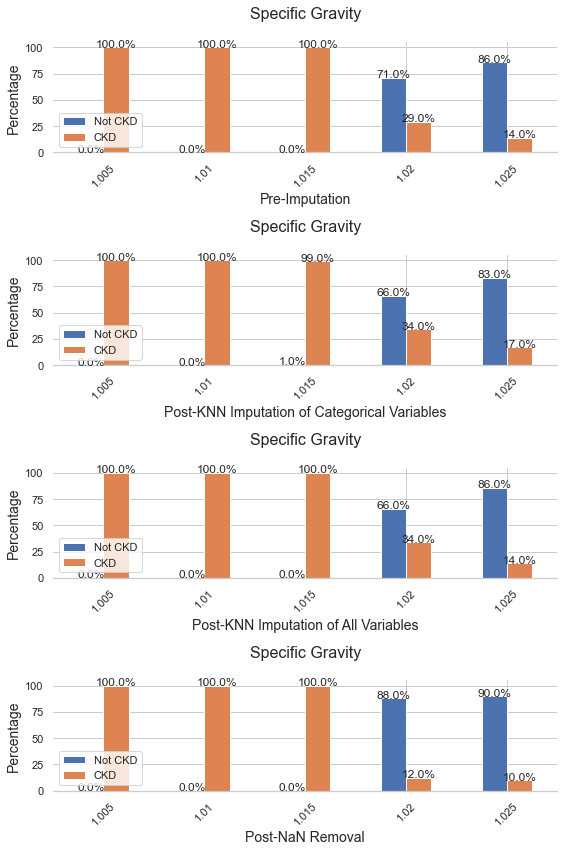

In [82]:
df_plot = ckd.groupby(['classification', 'specific_gravity']).size().reset_index().pivot(columns='classification', index='specific_gravity', values=0)
df_plot1 = ckd_copy1.groupby(['classification', 'specific_gravity']).size().reset_index().pivot(columns='classification', index='specific_gravity', values=0)
df_plot2 = ckd_copy2.groupby(['classification', 'specific_gravity']).size().reset_index().pivot(columns='classification', index='specific_gravity', values=0)
df_plot3 = ckd_copy3.groupby(['classification', 'specific_gravity']).size().reset_index().pivot(columns='classification', index='specific_gravity', values=0)

df_plot_p = np.round(df_plot.div(df_plot.sum(axis=1), axis=0)*100)
df_plot1_p = np.round(df_plot1.div(df_plot1.sum(axis=1), axis=0)*100)
df_plot2_p = np.round(df_plot2.div(df_plot2.sum(axis=1), axis=0)*100)
df_plot3_p = np.round(df_plot3.div(df_plot3.sum(axis=1), axis=0)*100)

classification = ['Not CKD', 'CKD']

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,12))

ax = plt.subplot(4,1,1)
df_plot_p.plot(kind='bar', stacked=False, ax=ax)
plt.title("Specific Gravity\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Pre-Imputation", fontsize=14)
plt.xticks(rotation = 45)

for p in ax.patches:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
ax1 = plt.subplot(4,1,2)
df_plot1_p.plot(kind='bar', stacked=False, ax=ax1)
plt.title("Specific Gravity\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-KNN Imputation of Categorical Variables", fontsize=14)
plt.xticks(rotation = 45)

for p in ax1.patches:
   height = p.get_height()
   ax1.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')    

    
ax2 = plt.subplot(4,1,3)
df_plot2_p.plot(kind='bar', stacked=False, ax=ax2)
plt.title("Specific Gravity\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-KNN Imputation of All Variables", fontsize=14)
plt.xticks(rotation = 45)

for p in ax2.patches:
   height = p.get_height()
   ax2.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')    
    
    
    
ax3 = plt.subplot(4,1,4)
df_plot3_p.plot(kind='bar', stacked=False, ax=ax3)
plt.title("Specific Gravity\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-NaN Removal", fontsize=14)
plt.xticks(rotation = 45)

for p in ax3.patches:
   height = p.get_height()
   ax3.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)



fig.tight_layout()
plt.show()


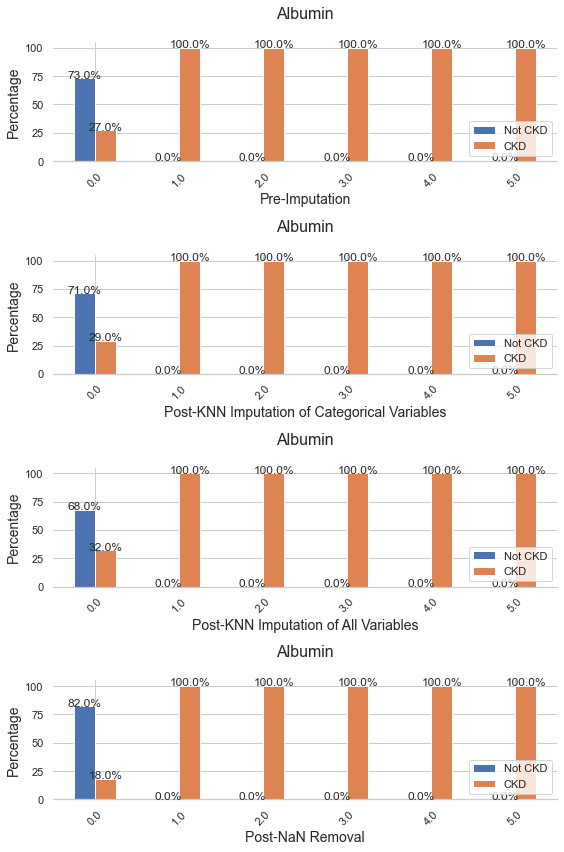

In [83]:
df_plot = ckd.groupby(['classification', 'albumin']).size().reset_index().pivot(columns='classification', index='albumin', values=0)
df_plot1 = ckd_copy1.groupby(['classification', 'albumin']).size().reset_index().pivot(columns='classification', index='albumin', values=0)
df_plot2 = ckd_copy2.groupby(['classification', 'albumin']).size().reset_index().pivot(columns='classification', index='albumin', values=0)
df_plot3 = ckd_copy3.groupby(['classification', 'albumin']).size().reset_index().pivot(columns='classification', index='albumin', values=0)

df_plot_p = np.round(df_plot.div(df_plot.sum(axis=1), axis=0)*100)
df_plot1_p = np.round(df_plot1.div(df_plot1.sum(axis=1), axis=0)*100)
df_plot2_p = np.round(df_plot2.div(df_plot2.sum(axis=1), axis=0)*100)
df_plot3_p = np.round(df_plot3.div(df_plot3.sum(axis=1), axis=0)*100)

classification = ['Not CKD', 'CKD']

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,12))

ax = plt.subplot(4,1,1)
df_plot_p.plot(kind='bar', stacked=False, ax=ax)
plt.title("Albumin\n", fontsize=16)
plt.legend(classification,loc=4)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Pre-Imputation", fontsize=14)
plt.xticks(rotation = 45)


for p in ax.patches:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
ax1 = plt.subplot(4,1,2)
df_plot1_p.plot(kind='bar', stacked=False, ax=ax1)
plt.title("Albumin\n", fontsize=16)
plt.legend(classification,loc=4)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-KNN Imputation of Categorical Variables", fontsize=14)
plt.xticks(rotation = 45)


for p in ax1.patches:
   height = p.get_height()
   ax1.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center') 
    
ax2 = plt.subplot(4,1,3)
df_plot2_p.plot(kind='bar', stacked=False, ax=ax2)
plt.title("Albumin\n", fontsize=16)
plt.legend(classification,loc=4)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-KNN Imputation of All Variables", fontsize=14)
plt.xticks(rotation = 45)

for p in ax2.patches:
   height = p.get_height()
   ax2.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
ax3 = plt.subplot(4,1,4)
df_plot3_p.plot(kind='bar', stacked=False, ax=ax3)
plt.title("Albumin\n", fontsize=16)
plt.legend(classification,loc=4)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-NaN Removal", fontsize=14)
plt.xticks(rotation = 45)

for p in ax3.patches:
   height = p.get_height()
   ax3.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()


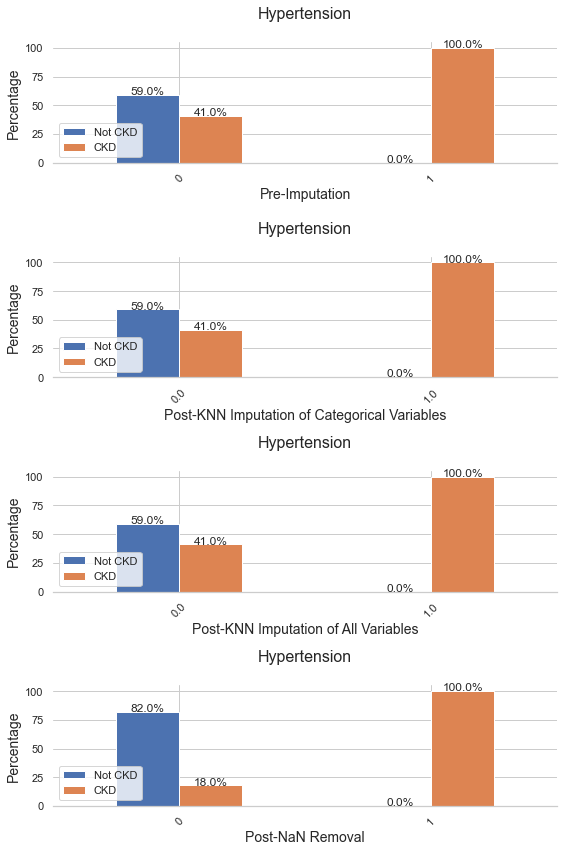

In [84]:
df_plot = ckd.groupby(['classification', 'hypertension']).size().reset_index().pivot(columns='classification', index='hypertension', values=0)
df_plot1 = ckd_copy1.groupby(['classification', 'hypertension']).size().reset_index().pivot(columns='classification', index='hypertension', values=0)
df_plot2 = ckd_copy2.groupby(['classification', 'hypertension']).size().reset_index().pivot(columns='classification', index='hypertension', values=0)
df_plot3 = ckd_copy3.groupby(['classification', 'hypertension']).size().reset_index().pivot(columns='classification', index='hypertension', values=0)

df_plot_p = np.round(df_plot.div(df_plot.sum(axis=1), axis=0)*100)
df_plot1_p = np.round(df_plot1.div(df_plot1.sum(axis=1), axis=0)*100)
df_plot2_p = np.round(df_plot2.div(df_plot2.sum(axis=1), axis=0)*100)
df_plot3_p = np.round(df_plot3.div(df_plot3.sum(axis=1), axis=0)*100)

classification = ['Not CKD', 'CKD']

#set style
sns.set(style='whitegrid')

fig = plt.figure(figsize=(8,12))

ax = plt.subplot(4,1,1)
df_plot_p.plot(kind='bar', stacked=False, ax=ax)
plt.title("Hypertension\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Pre-Imputation", fontsize=14)
plt.xticks(rotation = 45)

for p in ax.patches:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
ax1 = plt.subplot(4,1,2)
df_plot1_p.plot(kind='bar', stacked=False, ax=ax1)
plt.title("Hypertension\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-KNN Imputation of Categorical Variables", fontsize=14)
plt.xticks(rotation = 45)

for p in ax1.patches:
   height = p.get_height()
   ax1.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')


ax2 = plt.subplot(4,1,3)
df_plot2_p.plot(kind='bar', stacked=False, ax=ax2)
plt.title("Hypertension\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-KNN Imputation of All Variables", fontsize=14)
plt.xticks(rotation = 45)


for p in ax2.patches:
   height = p.get_height()
   ax2.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(4,1,4)
df_plot3_p.plot(kind='bar', stacked=False, ax=ax3)
plt.title("Hypertension\n", fontsize=16)
plt.legend(classification,loc=3)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Post-NaN Removal", fontsize=14)
plt.xticks(rotation = 45)


for p in ax3.patches:
   height = p.get_height()
   ax3.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()

In [85]:
ckd_final = ckd_copy2.copy()
print(ckd_final.head())

  specific_gravity albumin  serum_creatinine  haemoglobin  packed_cell_volume  \
0            1.020     1.0               1.2         15.4                44.0   
1            1.020     4.0               0.8         11.3                38.0   
2            1.010     2.0               1.8          9.6                31.0   
3            1.005     4.0               3.8         11.2                32.0   
4            1.010     2.0               1.4         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count hypertension classification  
0                  7800.0                   5.2          1.0            1.0  
1                  6000.0                   6.5          0.0            1.0  
2                  7500.0                   3.4          0.0            1.0  
3                  6700.0                   3.9          1.0            1.0  
4                  7300.0                   4.6          0.0            1.0  


#### Normality

In [86]:
#normality test for numerical variables
print(shapiro(ckd_final[['serum_creatinine','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']]))

ShapiroResult(statistic=0.5297821760177612, pvalue=0.0)


#### Independence

In [87]:
from scipy import stats

In [88]:
ct = pd.crosstab(ckd_final['specific_gravity'], ckd_final['classification'], margins=True)
ct

classification    0.0  1.0  All
specific_gravity               
1.005               0   10   10
1.01                0  101  101
1.015               0   86   86
1.02               80   42  122
1.025              70   11   81
All               150  250  400

In [89]:
#independence test for categorical variables
#specific gravity and classification
ct = pd.crosstab(ckd_final['specific_gravity'], ckd_final['classification'], margins=True)
obs = np.array([ct.iloc[0][0:2].values,
                ct.iloc[1][0:2].values,
                ct.iloc[2][0:2].values,
                ct.iloc[3][0:2].values,
                ct.iloc[4][0:2].values])
obs
stats.chi2_contingency(obs)[0:3]

(241.9321324967955, 3.5591307896356244e-51, 4)

In [90]:
ct = pd.crosstab(ckd_final['albumin'], ckd_final['classification'], margins=True)
ct

classification  0.0  1.0  All
albumin                      
0.0             150   70  220
1.0               0   53   53
2.0               0   48   48
3.0               0   52   52
4.0               0   26   26
5.0               0    1    1
All             150  250  400

In [91]:
#independence test for categorical variables
#albumin and classification
ct = pd.crosstab(ckd_final['albumin'], ckd_final['classification'], margins=True)
obs = np.array([ct.iloc[0][0:2].values,
                ct.iloc[1][0:2].values,
                ct.iloc[2][0:2].values,
                ct.iloc[3][0:2].values,
                ct.iloc[4][0:2].values,
                ct.iloc[5][0:2].values])
obs
stats.chi2_contingency(obs)[0:3]

(196.36363636363635, 1.7029682050818463e-40, 5)

In [92]:
ct = pd.crosstab(ckd_final['hypertension'], ckd_final['classification'], margins=True)
ct

classification  0.0  1.0  All
hypertension                 
0.0             150  103  253
1.0               0  147  147
All             150  250  400

In [93]:
#independence test for categorical variables
#hypertension and classification
ct = pd.crosstab(ckd_final['hypertension'], ckd_final['classification'], margins=True)
obs = np.array([ct.iloc[0][0:2].values,
                ct.iloc[1][0:2].values])
obs
stats.chi2_contingency(obs)[0:3]

(136.92846835703978, 1.2500814473128787e-31, 1)

#### Univariate, Bivariate, and Multivariate Enumerative Analysis

#### Numerical Variables

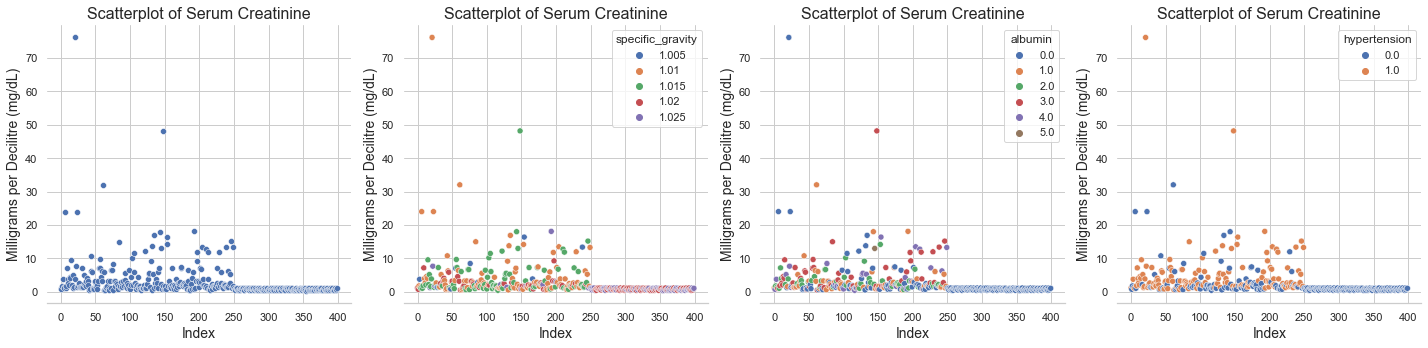

In [94]:
#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
plt.title('Scatterplot of Serum Creatinine', fontsize=16)
plt.ylabel("Milligrams per Decilitre (mg/dL)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['serum_creatinine'], ax=ax)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax1 = plt.subplot(1,4,2)
plt.title('Scatterplot of Serum Creatinine', fontsize=16)
plt.ylabel("Milligrams per Decilitre (mg/dL)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['serum_creatinine'], hue=ckd_final['specific_gravity'], ax=ax1)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax2 = plt.subplot(1,4,3)
plt.title('Scatterplot of Serum Creatinine', fontsize=16)
plt.ylabel("Milligrams per Decilitre (mg/dL)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['serum_creatinine'], hue=ckd_final['albumin'], ax=ax2)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(1,4,4)
plt.title('Scatterplot of Serum Creatinine', fontsize=16)
plt.ylabel("Milligrams per Decilitre (mg/dL)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['serum_creatinine'], hue=ckd_final['hypertension'], ax=ax3)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)



fig.tight_layout()
plt.show()

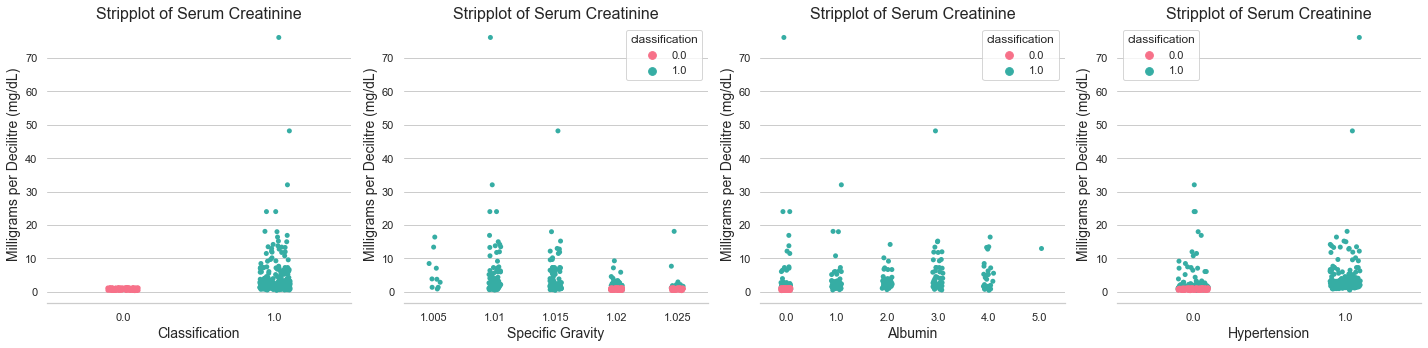

In [95]:
#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
plt.title('Stripplot of Serum Creatinine', fontsize=16)
plt.ylabel("Milligrams per Decilitre (mg/dL)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['classification'],y=ckd_final['serum_creatinine'], palette='husl', ax=ax)

ax.set(ylabel='Milligrams per Decilitre (mg/dL)')
ax.set(xlabel='Classification')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax1 = plt.subplot(1,4,2)
plt.title('Stripplot of Serum Creatinine', fontsize=16)
plt.ylabel("Milligrams per Decilitre (mg/dL)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['specific_gravity'],y=ckd_final['serum_creatinine'], hue=ckd_final['classification'], palette='husl', ax=ax1)

ax1.set(ylabel='Milligrams per Decilitre (mg/dL)')
ax1.set(xlabel='Specific Gravity')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax2 = plt.subplot(1,4,3)
plt.title('Stripplot of Serum Creatinine', fontsize=16)
plt.ylabel("Milligrams per Decilitre (mg/dL)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['albumin'],y=ckd_final['serum_creatinine'], hue=ckd_final['classification'], palette='husl', ax=ax2)

ax2.set(ylabel='Milligrams per Decilitre (mg/dL)')
ax2.set(xlabel='Albumin')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(1,4,4)
plt.title('Stripplot of Serum Creatinine', fontsize=16)
plt.ylabel("Milligrams per Decilitre (mg/dL)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['hypertension'],y=ckd_final['serum_creatinine'], hue=ckd_final['classification'], palette='husl', ax=ax3)

ax3.set(ylabel='Milligrams per Decilitre (mg/dL)')
ax3.set(xlabel='Hypertension')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)



fig.tight_layout()
plt.show()

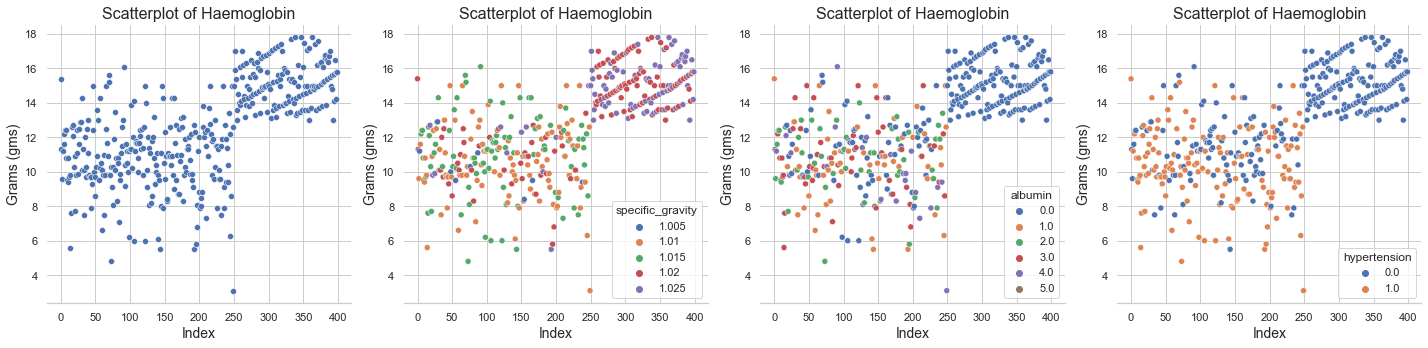

In [96]:
#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
plt.title('Scatterplot of Haemoglobin', fontsize=16)
plt.ylabel("Grams (gms)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['haemoglobin'], ax=ax)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax1 = plt.subplot(1,4,2)
plt.title('Scatterplot of Haemoglobin', fontsize=16)
plt.ylabel("Grams (gms)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['haemoglobin'], hue=ckd_final['specific_gravity'], ax=ax1)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax2 = plt.subplot(1,4,3)
plt.title('Scatterplot of Haemoglobin', fontsize=16)
plt.ylabel("Grams (gms)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['haemoglobin'], hue=ckd_final['albumin'], ax=ax2)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(1,4,4)
plt.title('Scatterplot of Haemoglobin', fontsize=16)
plt.ylabel("Grams (gms)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['haemoglobin'], hue=ckd_final['hypertension'], ax=ax3)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()

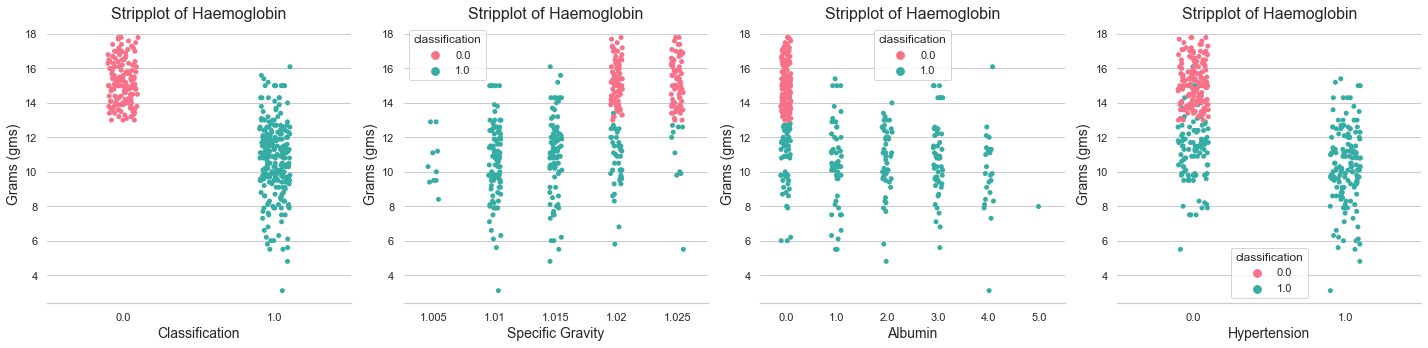

In [97]:
#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
plt.title('Stripplot of Haemoglobin', fontsize=16)
plt.ylabel("Grams (gms)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['classification'],y=ckd_final['haemoglobin'], palette='husl', ax=ax)

ax.set(ylabel='Grams (gms)')
ax.set(xlabel='Classification')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax1 = plt.subplot(1,4,2)
plt.title('Stripplot of Haemoglobin', fontsize=16)
plt.ylabel("Grams (gms)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['specific_gravity'],y=ckd_final['haemoglobin'], hue=ckd_final['classification'], palette='husl', ax=ax1)

ax1.set(ylabel='Grams (gms)')
ax1.set(xlabel='Specific Gravity')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax2 = plt.subplot(1,4,3)
plt.title('Stripplot of Haemoglobin', fontsize=16)
plt.ylabel("Grams (gms)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['albumin'],y=ckd_final['haemoglobin'], hue=ckd_final['classification'], palette='husl', ax=ax2)

ax2.set(ylabel='Grams (gms)')
ax2.set(xlabel='Albumin')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(1,4,4)
plt.title('Stripplot of Haemoglobin', fontsize=16)
plt.ylabel("Grams (gms)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['hypertension'],y=ckd_final['haemoglobin'], hue=ckd_final['classification'], palette='husl', ax=ax3)

ax3.set(ylabel='Grams (gms)')
ax3.set(xlabel='Hypertension')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()

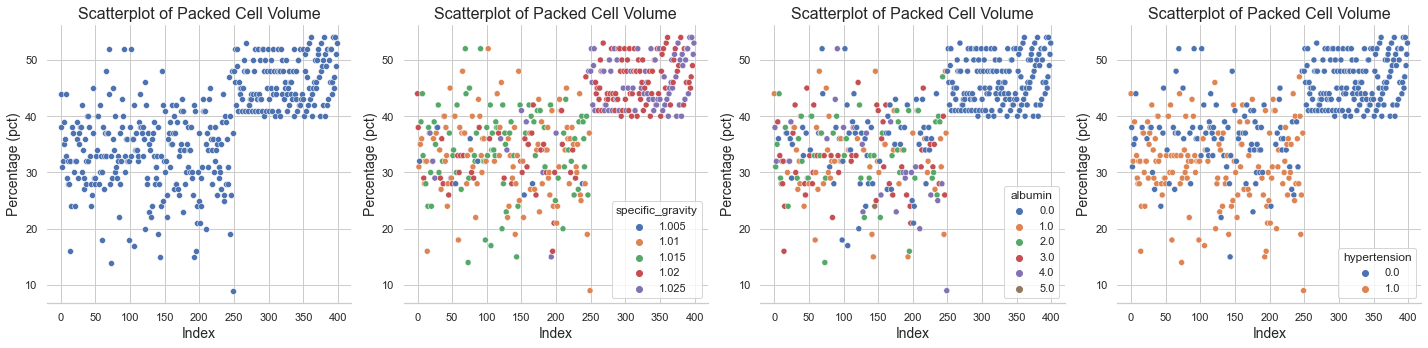

In [98]:
#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
plt.title('Scatterplot of Packed Cell Volume', fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['packed_cell_volume'], ax=ax)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax1 = plt.subplot(1,4,2)
plt.title('Scatterplot of Packed Cell Volume', fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['packed_cell_volume'], hue=ckd_final['specific_gravity'], ax=ax1)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax2 = plt.subplot(1,4,3)
plt.title('Scatterplot of Packed Cell Volume', fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['packed_cell_volume'], hue=ckd_final['albumin'], ax=ax2)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(1,4,4)
plt.title('Scatterplot of Packed Cell Volume', fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['packed_cell_volume'], hue=ckd_final['hypertension'], ax=ax3)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

fig.tight_layout()
plt.show()

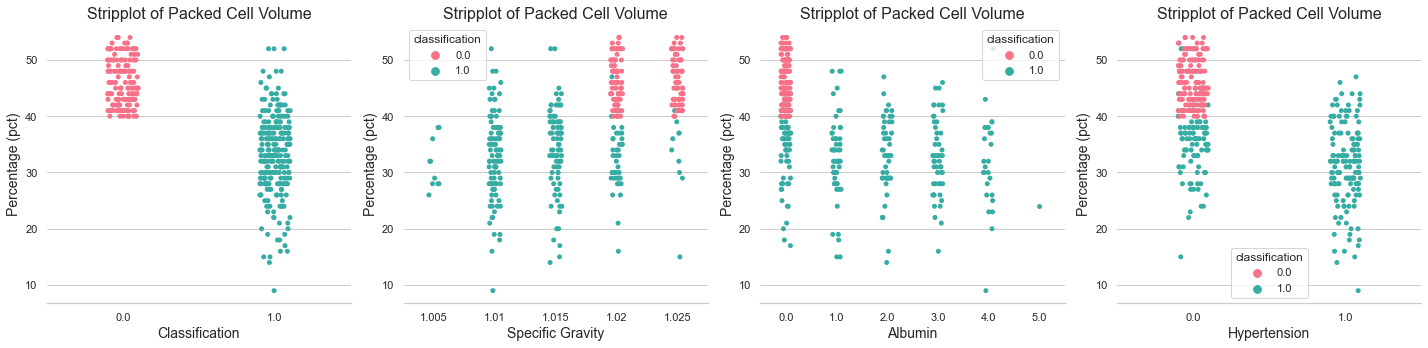

In [99]:
#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
plt.title('Stripplot of Packed Cell Volume', fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['classification'],y=ckd_final['packed_cell_volume'], palette='husl', ax=ax)

ax.set(ylabel='Percentage (pct)')
ax.set(xlabel='Classification')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax1 = plt.subplot(1,4,2)
plt.title('Stripplot of Packed Cell Volume', fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['specific_gravity'],y=ckd_final['packed_cell_volume'], hue=ckd_final['classification'], palette='husl', ax=ax1)

ax1.set(ylabel='Percentage (pct)')
ax1.set(xlabel='Specific Gravity')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax2 = plt.subplot(1,4,3)
plt.title('Stripplot of Packed Cell Volume', fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['albumin'],y=ckd_final['packed_cell_volume'], hue=ckd_final['classification'], palette='husl', ax=ax2)

ax2.set(ylabel='Percentage (pct)')
ax2.set(xlabel='Albumin')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(1,4,4)
plt.title('Stripplot of Packed Cell Volume', fontsize=16)
plt.ylabel("Percentage (pct)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['hypertension'],y=ckd_final['packed_cell_volume'], hue=ckd_final['classification'], palette='husl', ax=ax3)

ax3.set(ylabel='Percentage (pct)')
ax3.set(xlabel='Hypertension')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

fig.tight_layout()
plt.show()

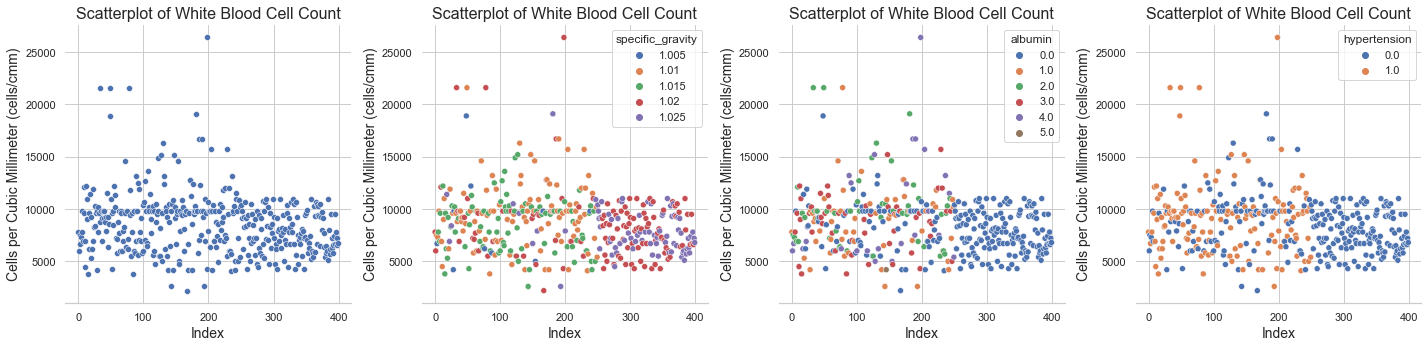

In [100]:
#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
plt.title('Scatterplot of White Blood Cell Count', fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['white_blood_cell_count'], ax=ax)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax1 = plt.subplot(1,4,2)
plt.title('Scatterplot of White Blood Cell Count', fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['white_blood_cell_count'], hue=ckd_final['specific_gravity'], ax=ax1)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax2 = plt.subplot(1,4,3)
plt.title('Scatterplot of White Blood Cell Count', fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['white_blood_cell_count'], hue=ckd_final['albumin'], ax=ax2)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(1,4,4)
plt.title('Scatterplot of White Blood Cell Count', fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['white_blood_cell_count'], hue=ckd_final['hypertension'], ax=ax3)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()

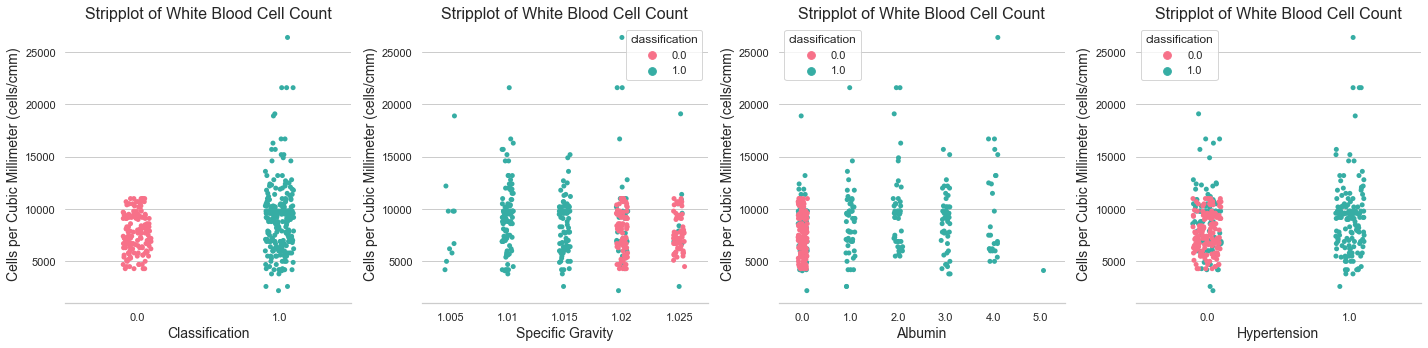

In [101]:
#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
plt.title('Stripplot of White Blood Cell Count', fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['classification'],y=ckd_final['white_blood_cell_count'], palette='husl', ax=ax)

ax.set(ylabel='Cells per Cubic Millimeter (cells/cmm)')
ax.set(xlabel='Classification')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax1 = plt.subplot(1,4,2)
plt.title('Stripplot of White Blood Cell Count', fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['specific_gravity'],y=ckd_final['white_blood_cell_count'], hue=ckd_final['classification'], palette='husl', ax=ax1)

ax1.set(ylabel='Cells per Cubic Millimeter (cells/cmm)')
ax1.set(xlabel='Specific Gravity')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax2 = plt.subplot(1,4,3)
plt.title('Stripplot of White Blood Cell Count', fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['albumin'],y=ckd_final['white_blood_cell_count'], hue=ckd_final['classification'], palette='husl', ax=ax2)

ax2.set(ylabel='Cells per Cubic Millimeter (cells/cmm)')
ax2.set(xlabel='Albumin')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(1,4,4)
plt.title('Stripplot of White Blood Cell Count', fontsize=16)
plt.ylabel("Cells per Cubic Millimeter (cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['hypertension'],y=ckd_final['white_blood_cell_count'], hue=ckd_final['classification'], palette='husl', ax=ax3)

ax3.set(ylabel='Cells per Cubic Millimeter (cells/cmm)')
ax3.set(xlabel='Hypertension')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()

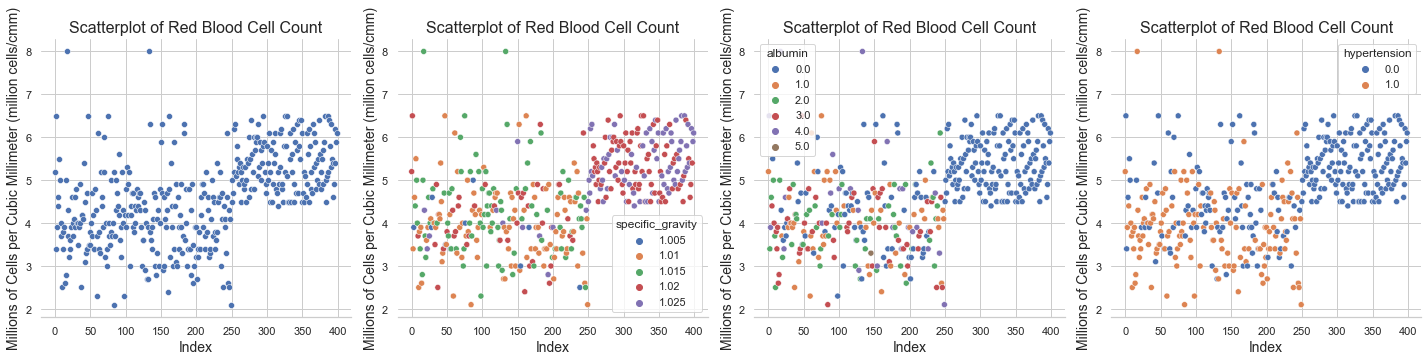

In [102]:
#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
plt.title('Scatterplot of Red Blood Cell Count', fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['red_blood_cell_count'], ax=ax)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax1 = plt.subplot(1,4,2)
plt.title('Scatterplot of Red Blood Cell Count', fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['red_blood_cell_count'], hue=ckd_final['specific_gravity'], ax=ax1)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax2 = plt.subplot(1,4,3)
plt.title('Scatterplot of Red Blood Cell Count', fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['red_blood_cell_count'], hue=ckd_final['albumin'], ax=ax2)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(1,4,4)
plt.title('Scatterplot of Red Blood Cell Count', fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.scatterplot(x=ckd_final.index,y=ckd_final['red_blood_cell_count'], hue=ckd_final['hypertension'], ax=ax3)

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()

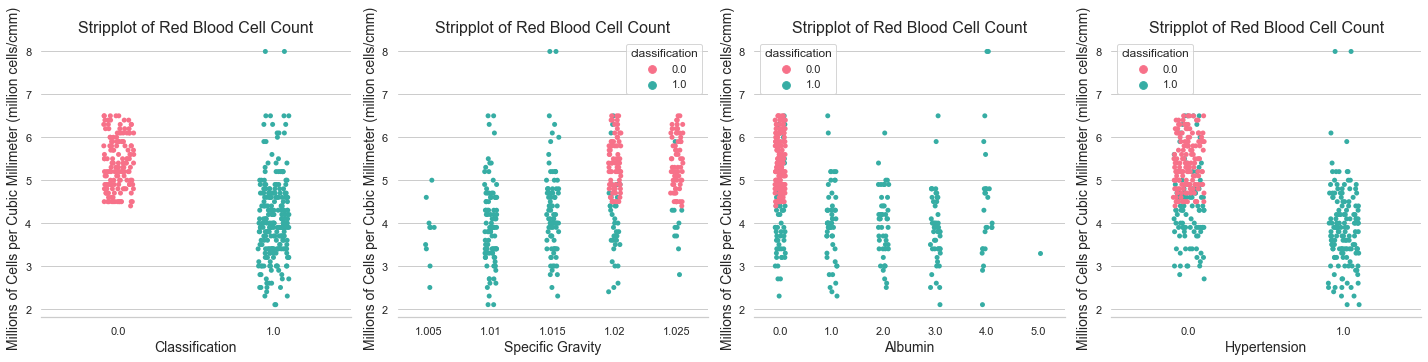

In [103]:
#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
plt.title('Stripplot of Red Blood Cell Count', fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['classification'],y=ckd_final['red_blood_cell_count'], palette='husl', ax=ax)

ax.set(ylabel='Millions of Cells per Cubic Millimeter (million cells/cmm)')
ax.set(xlabel='Classification')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax1 = plt.subplot(1,4,2)
plt.title('Stripplot of Red Blood Cell Count', fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['specific_gravity'],y=ckd_final['red_blood_cell_count'], hue=ckd_final['classification'], palette='husl', ax=ax1)

ax1.set(ylabel='Millions of Cells per Cubic Millimeter (million cells/cmm)')
ax1.set(xlabel='Specific Gravity')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax2 = plt.subplot(1,4,3)
plt.title('Stripplot of Red Blood Cell Count', fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['albumin'],y=ckd_final['red_blood_cell_count'], hue=ckd_final['classification'], palette='husl', ax=ax2)

ax2.set(ylabel='Millions of Cells per Cubic Millimeter (million cells/cmm)')
ax2.set(xlabel='Albumin')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

ax3 = plt.subplot(1,4,4)
plt.title('Stripplot of Red Blood Cell Count', fontsize=16)
plt.ylabel("Millions of Cells per Cubic Millimeter (million cells/cmm)", fontsize=14)
plt.xlabel("Index", fontsize=14)
sns.stripplot(x=ckd_final['hypertension'],y=ckd_final['red_blood_cell_count'], hue=ckd_final['classification'], palette='husl', ax=ax3)

ax3.set(ylabel='Millions of Cells per Cubic Millimeter (million cells/cmm)')
ax3.set(xlabel='Hypertension')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


fig.tight_layout()
plt.show()

#### Categorical Variables

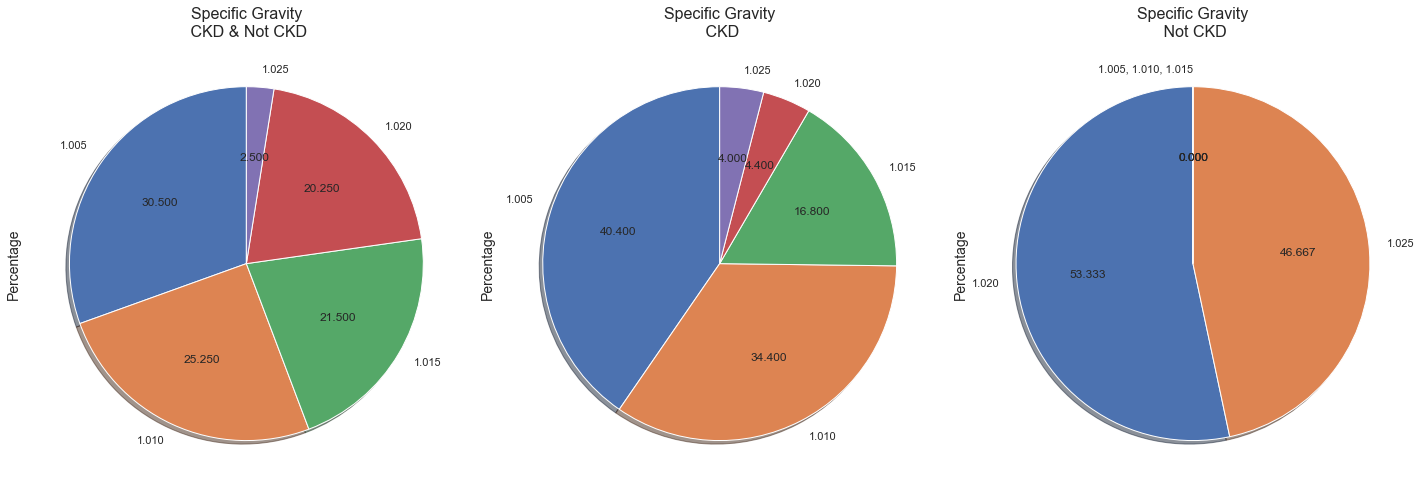

In [114]:
ckdyes = ckd_final.loc[ckd['classification'] == 1]
ckdno = ckd_final.loc[ckd['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,20))

ax = plt.subplot(1,3,1)
plt.title('Specific Gravity\n CKD & Not CKD', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
ax.pie(ckd_final['specific_gravity'].value_counts(), startangle=90, autopct='%.3f',
        labels=['1.005\n','1.010','1.015','1.020','1.025'], shadow=True)

ax1 = plt.subplot(1,3,2)
plt.title('Specific Gravity\n CKD', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
ax1.pie(ckdyes['specific_gravity'].value_counts(), startangle=90, autopct='%.3f',
        labels=['1.005\n','1.010','1.015','1.020','1.025'], shadow=True)

ax2 = plt.subplot(1,3,3)
plt.title('Specific Gravity\n Not CKD', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
ax2.pie(ckdno['specific_gravity'].value_counts(), startangle=90, autopct='%.3f',
        labels=['1.020','1.025','1.005, 1.010, 1.015','',''], shadow=True)

fig.tight_layout()
plt.show()


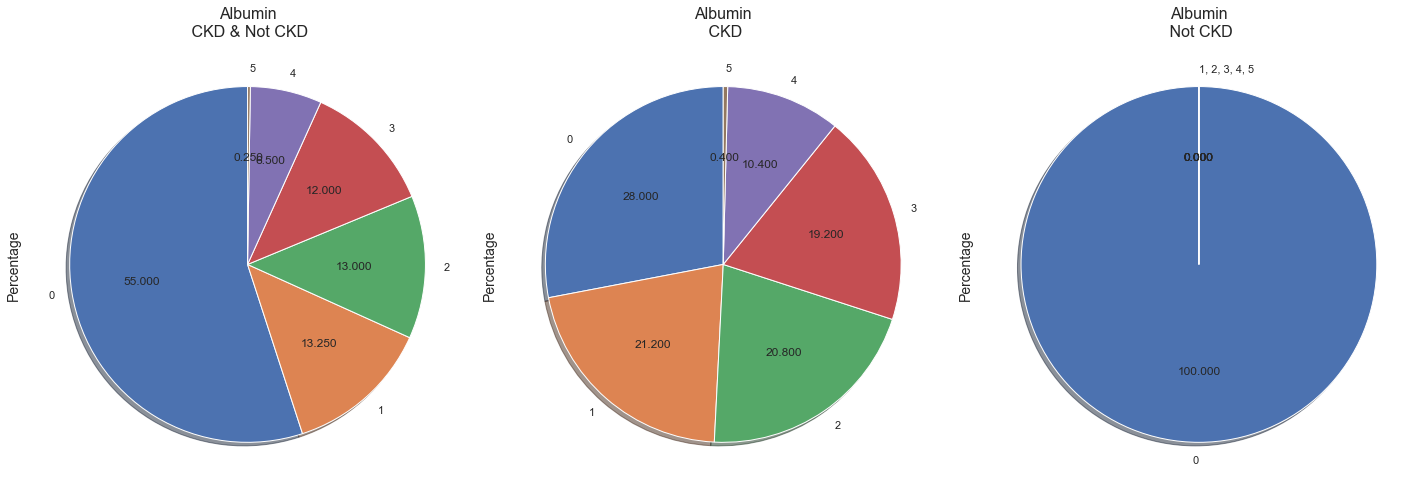

In [115]:
ckdyes = ckd_final.loc[ckd['classification'] == 1]
ckdno = ckd_final.loc[ckd['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,20))

ax = plt.subplot(1,3,1)
plt.title('Albumin\n CKD & Not CKD', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
ax.pie(ckd_final['albumin'].value_counts(), startangle=90, autopct='%.3f',
        labels=['0','1','2','3','4','5'], shadow=True)

ax1 = plt.subplot(1,3,2)
plt.title('Albumin\n CKD', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
ax1.pie(ckdyes['albumin'].value_counts(), startangle=90, autopct='%.3f',
        labels=['0','1','2','3','4','5'], shadow=True)

ax2 = plt.subplot(1,3,3)
plt.title('Albumin\n Not CKD', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
ax2.pie(ckdno['albumin'].value_counts(), startangle=90, autopct='%.3f',
        labels=['0','1, 2, 3, 4, 5','','','',''], shadow=True)

fig.tight_layout()
plt.show()


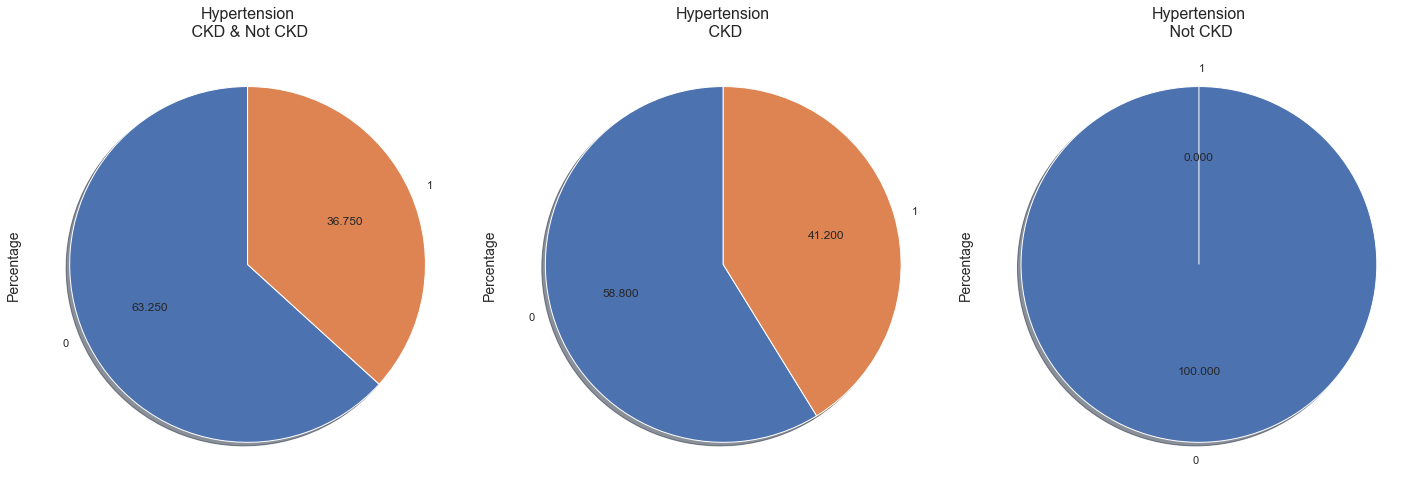

In [116]:
ckdyes = ckd_final.loc[ckd['classification'] == 1]
ckdno = ckd_final.loc[ckd['classification'] == 0]

#set style
sns.set(style='whitegrid')

fig=plt.figure(figsize=(20,20))

ax = plt.subplot(1,3,1)
plt.title('Hypertension\n CKD & Not CKD', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
ax.pie(ckd_final['hypertension'].value_counts(), startangle=90, autopct='%.3f',
        labels=['0','1'], shadow=True)

ax1 = plt.subplot(1,3,2)
plt.title('Hypertension\n CKD', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
ax1.pie(ckdyes['hypertension'].value_counts(), startangle=90, autopct='%.3f',
        labels=['0','1'], shadow=True)

ax2 = plt.subplot(1,3,3)
plt.title('Hypertension\n Not CKD', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
ax2.pie(ckdno['hypertension'].value_counts(), startangle=90, autopct='%.3f',
        labels=['0','1'], shadow=True)

fig.tight_layout()
plt.show()


In [107]:
ckd_final2 = ckd_final.copy()

In [108]:
#convert categorical values again
ckd_final2[['specific_gravity','albumin','hypertension','classification']] = ckd_final2[['specific_gravity','albumin','hypertension','classification']].astype('float')

[Text(0.5, 80.41875, 'Variable Rows'),
 Text(165.53421628407457, 0.5, 'Variable Columns')]

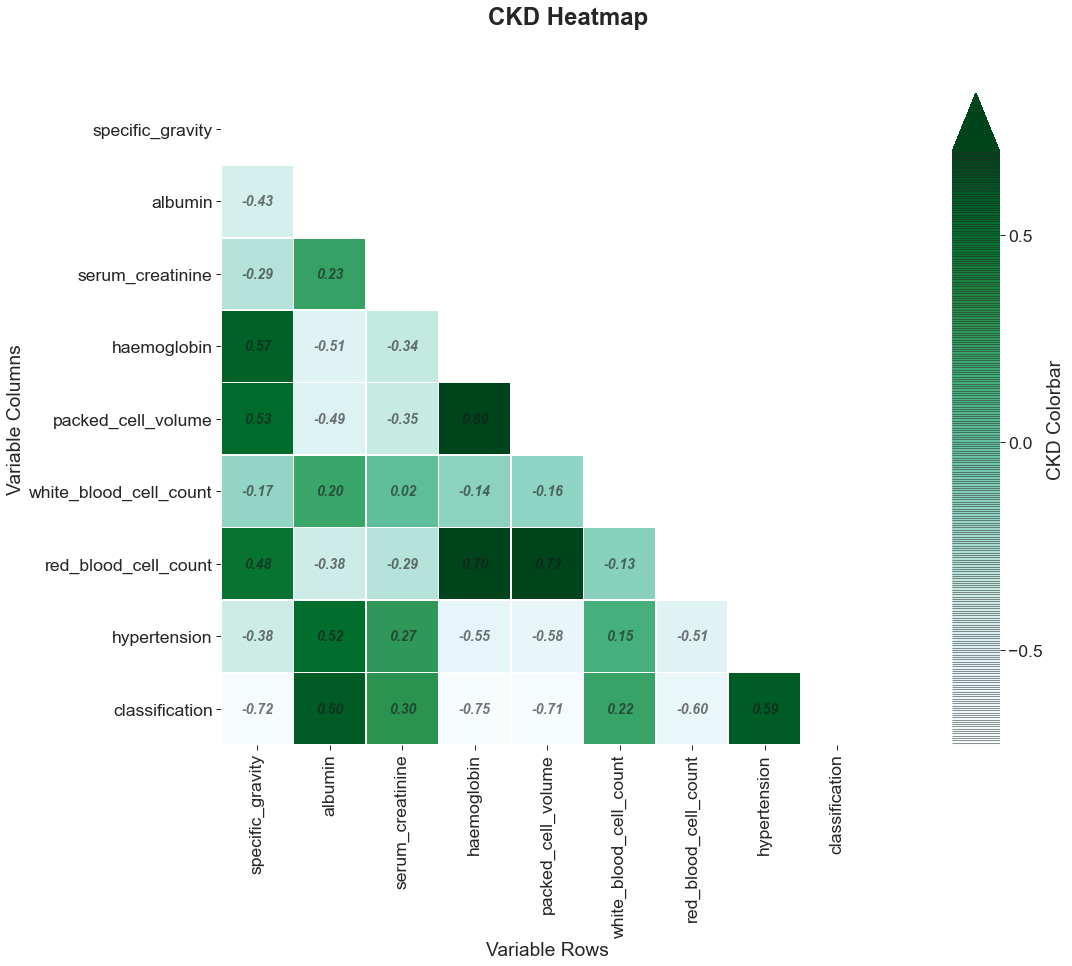

In [109]:
sns.set_theme(context='paper', style='ticks',font_scale=2)

f, (ax, cbar_ax) = plt.subplots(1,2, figsize=(15,12), gridspec_kw={'wspace':0.05, 'width_ratios':(0.8,0.05)} )

mask = np.triu(ckd_final2.corr())

annot_kws={'fontsize':14, 'fontstyle':'italic','fontweight':'bold', 'color':'k', 'alpha':0.6, 'rotation':None,'verticalalignment':'center', 'backgroundcolor':'None'}

cbar_kws={'label':'CKD Colorbar','orientation':'vertical', 'shrink':1,'extend':'max', 'ticks':[-0.8, -0.5,0, 0.5], 'extendfrac':0.1, 'drawedges':True }

sns.heatmap(ckd_final2.corr(), vmin=None, vmax=0.7, cmap='BuGn', center=None, robust=True, annot=True, fmt='.2F', annot_kws=annot_kws, linewidths=0.8, linecolor='white', cbar=True, cbar_kws=cbar_kws, cbar_ax=cbar_ax, square=True, xticklabels='auto', yticklabels='auto', mask=mask, ax=ax)

f.suptitle('CKD Heatmap', fontsize=24, fontweight='bold')

ax.set(xlabel='Variable Rows', ylabel='Variable Columns')

<Figure size 432x288 with 0 Axes>

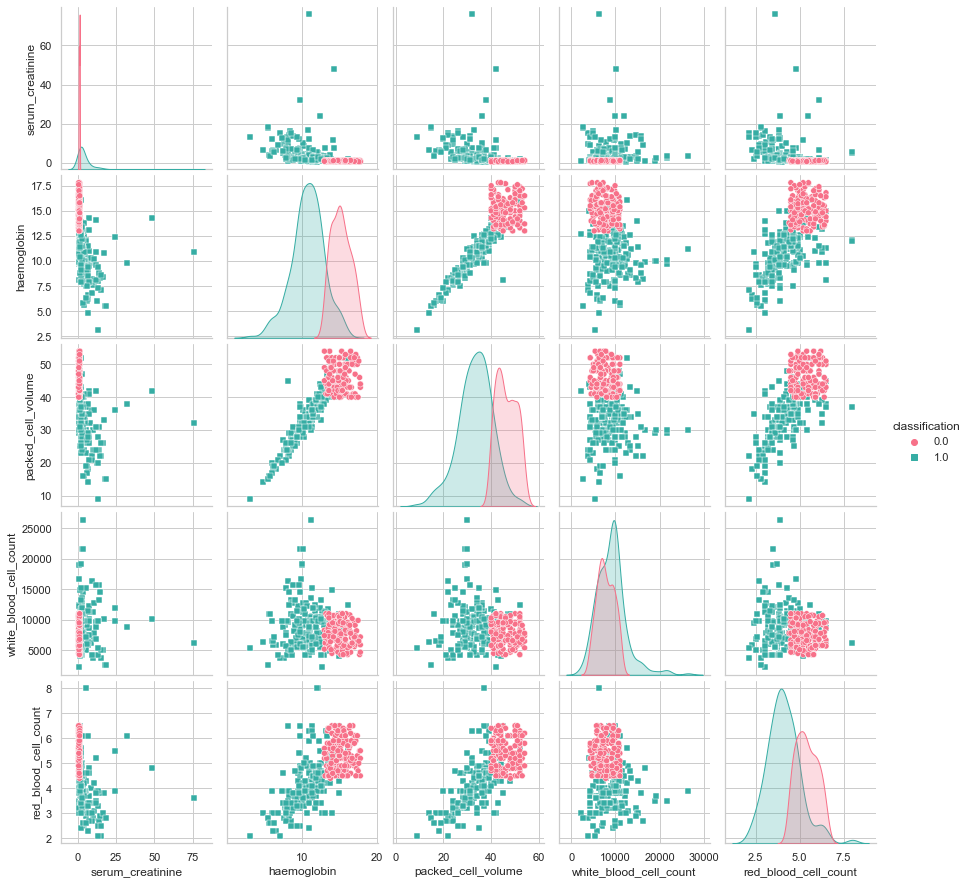

In [110]:
sns.set_theme()
sns.set(style='whitegrid')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

numerical = ckd_final2[['serum_creatinine','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']]

sns.pairplot(ckd_final2, vars=numerical, hue='classification', palette='husl', markers=["o","s"])
plt.show()

C:\Users\medma\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\medma\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

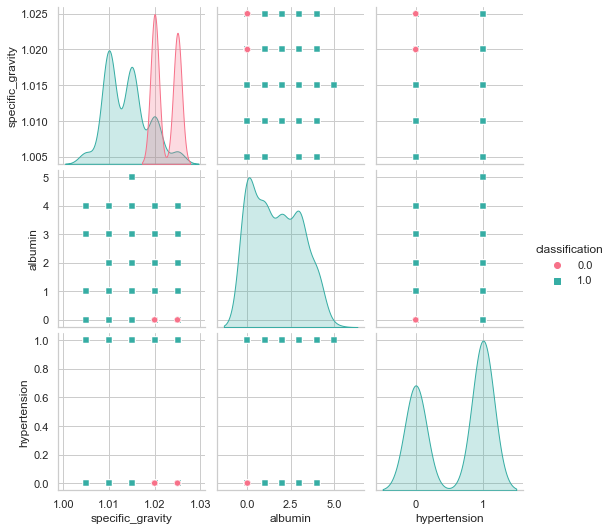

In [111]:
sns.set_theme()
sns.set(style='whitegrid')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

categorical = ckd_final2[['specific_gravity','albumin','hypertension']]

sns.pairplot(ckd_final2, vars=categorical, hue='classification', palette='husl', markers=["o","s"])
plt.show()

C:\Users\medma\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\medma\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

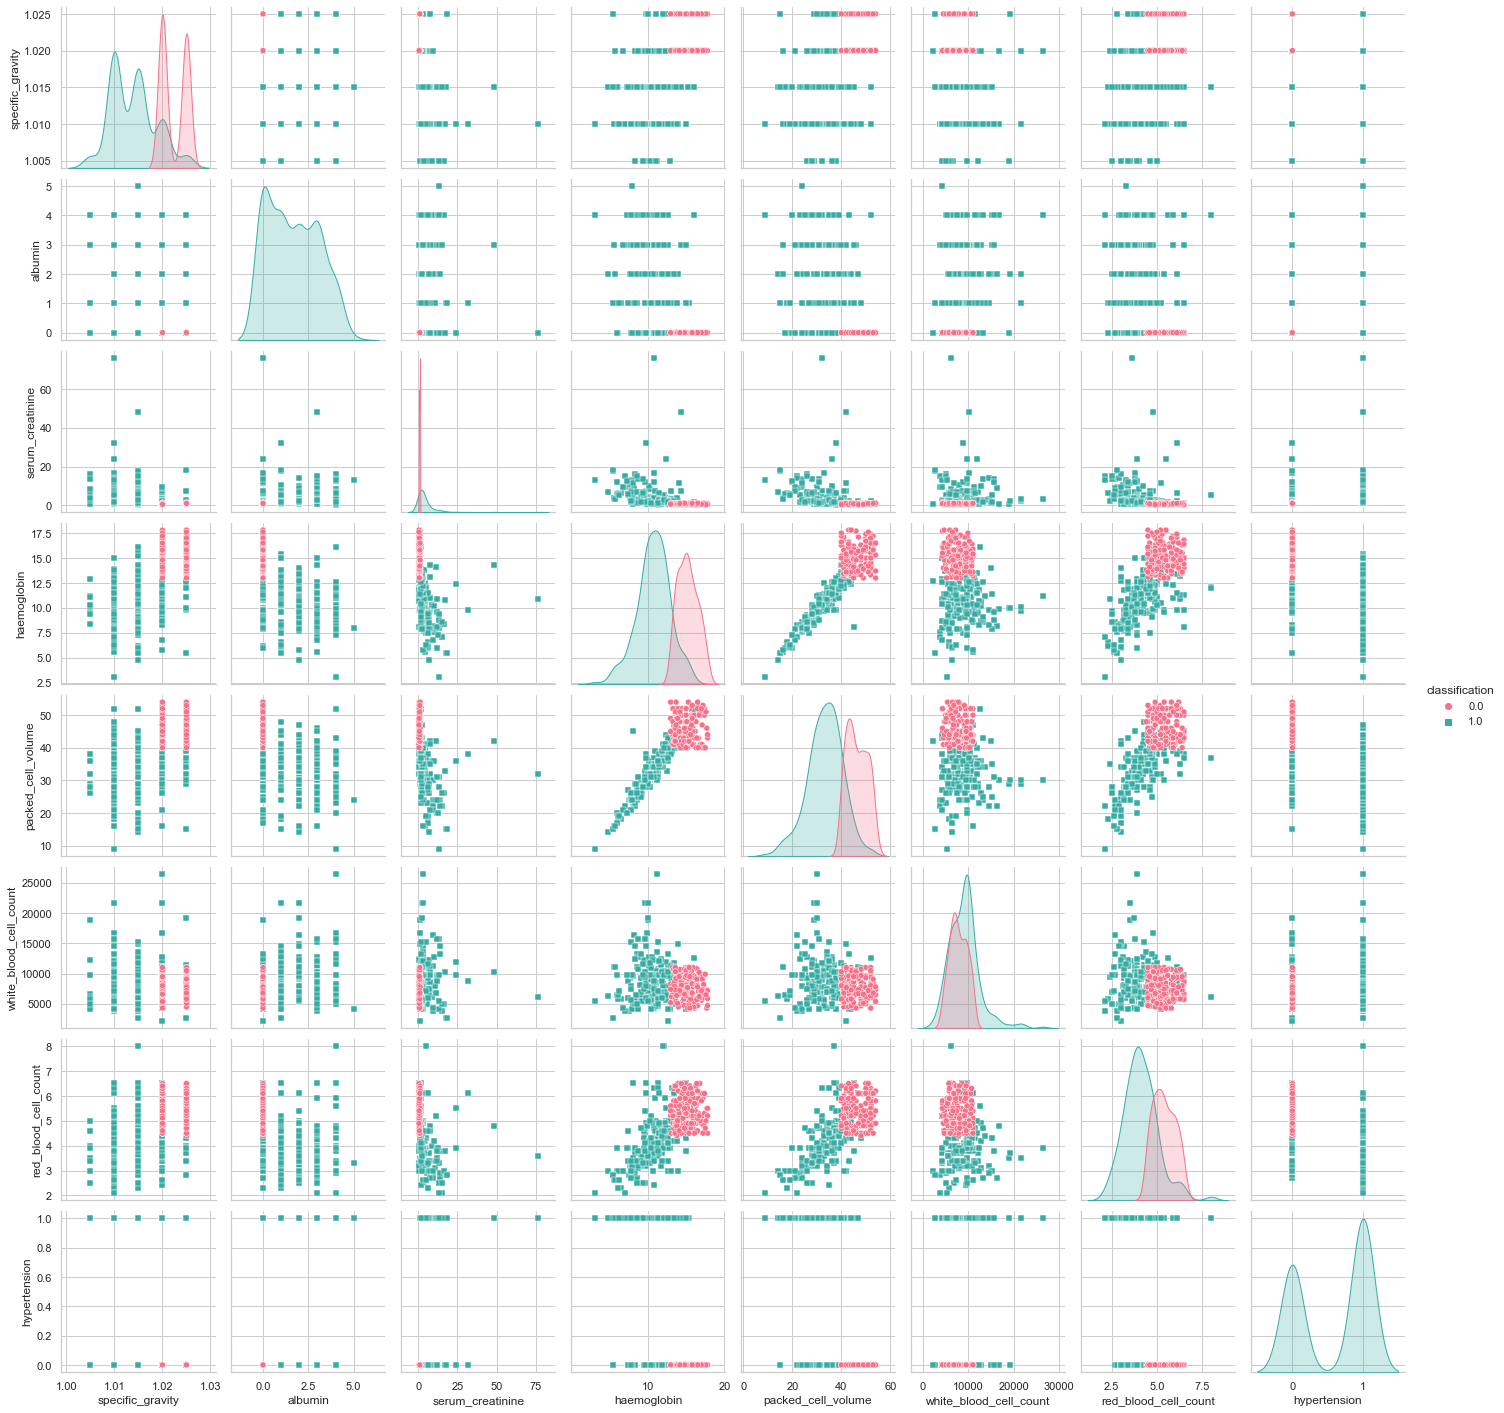

In [112]:
sns.set_theme()
sns.set(style='whitegrid')

#remove all borders except the bottom border
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)

everything = ckd_final2[['specific_gravity','albumin','serum_creatinine','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','classification']]

sns.pairplot(everything, hue='classification', palette='husl', markers=["o","s"])
plt.show()

### Export prepared csv file

In [113]:
# convert ckd_scaled to a dataframe
#ckd_final = pd.DataFrame(ckd_final)

export using to_csv#
ckd_final.to_csv('C:/Users/medma/Documents/MS/Capstone/output/ckd.csv', index=False)